In [54]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [55]:
# pip install neuralforecast

In [56]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [57]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds          y       Open       High        Low  Volume Change %  \
0    2024-03-01  18,450.00  18,300.00  18,500.00  18,150.00   9.35M    1.10%   
1    2024-02-29  18,250.00  18,150.00  18,400.00  18,050.00  13.44M    1.11%   
2    2024-02-28  18,050.00  18,300.00  18,350.00  18,000.00   6.99M   -0.82%   
3    2024-02-27  18,200.00  18,000.00  18,300.00  17,800.00  11.25M    1.96%   
4    2024-02-26  17,850.00  18,100.00  18,150.00  17,650.00   9.10M   -1.65%   
...         ...        ...        ...        ...        ...     ...      ...   
1247 2019-03-07  17,092.00  17,912.40  17,912.40  17,092.00   3.84M   -3.29%   
1248 2019-03-06  17,673.20  17,502.20  17,741.50  17,365.50   1.64M    0.98%   
1249 2019-03-05  17,502.20  17,775.70  17,912.40  17,365.50   3.49M   -1.73%   
1250 2019-03-04  17,809.90  17,228.80  17,878.30  17,092.00   5.54M    4.41%   
1251 2019-03-01  17,057.80  16,750.20  17,057.80  16,750.20   1.27M    1.84%   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [58]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [59]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [60]:
# Tiền xử lí dữ liệu

dxg_sorted = dxg_dataset.sort_values(by='ds', ascending=True)
qcg_sorted = qcg_dataset.sort_values(by='ds', ascending=True)
vhm_sorted = vhm_dataset.sort_values(by='ds', ascending=True)

dxg_sorted.set_index('ds', inplace=True)
qcg_sorted.set_index('ds', inplace=True)
vhm_sorted.set_index('ds', inplace=True)

def fillMissingDates(dataset):
  fullDateRange = pd.date_range(start=dataset.index.min(), end=dataset.index.max(), freq = 'D')
  dataset = dataset.reindex(fullDateRange, method='ffill')
  dataset = dataset.ffill()
  dataset.reset_index(inplace=True)
  dataset.rename(columns={'index': 'ds'}, inplace=True)
  return dataset

dxg_sorted = fillMissingDates(dxg_sorted)
qcg_sorted = fillMissingDates(qcg_sorted)
vhm_sorted = fillMissingDates(vhm_sorted)

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [61]:
# Apply function to DXG
dxg_sorted["Volume"] = dxg_sorted["Volume"].apply(convert_volume_to_number)
dxg_sorted["Change %"] = dxg_sorted["Change %"].apply(convert_change_to_number)
dxg_sorted['y'] = dxg_sorted['y'].apply(convert_str_to_number)
dxg_sorted['Open'] = dxg_sorted['Open'].apply(convert_str_to_number)
dxg_sorted['High'] = dxg_sorted['High'].apply(convert_str_to_number)
dxg_sorted['Low'] = dxg_sorted['Low'].apply(convert_str_to_number)

dxg_sorted.head(10)

ds        y     Open     High      Low   Volume  Change % unique_id
0 2019-03-01  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
1 2019-03-02  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
2 2019-03-03  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
3 2019-03-04  17809.9  17228.8  17878.3  17092.0  5540000    0.0441       DXG
4 2019-03-05  17502.2  17775.7  17912.4  17365.5  3490000   -0.0173       DXG
5 2019-03-06  17673.2  17502.2  17741.5  17365.5  1640000    0.0098       DXG
6 2019-03-07  17092.0  17912.4  17912.4  17092.0  3840000   -0.0329       DXG
7 2019-03-08  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG
8 2019-03-09  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG
9 2019-03-10  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG

In [62]:
# Apply function to QCG
qcg_sorted["Volume"] = qcg_sorted["Volume"].apply(convert_volume_to_number)
qcg_sorted["Change %"] = qcg_sorted["Change %"].apply(convert_change_to_number)
qcg_sorted['y'] = qcg_sorted['y'].apply(convert_str_to_number)
qcg_sorted['Open'] = qcg_sorted['Open'].apply(convert_str_to_number)
qcg_sorted['High'] = qcg_sorted['High'].apply(convert_str_to_number)
qcg_sorted['Low'] = qcg_sorted['Low'].apply(convert_str_to_number)

qcg_sorted.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
0 2019-03-01  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
1 2019-03-02  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
2 2019-03-03  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
3 2019-03-04  4790.0  4700.0  4790.0  4600.0  1200000   -0.0021       QCG
4 2019-03-05  4700.0  4700.0  4750.0  4620.0  1040000   -0.0188       QCG
5 2019-03-06  5020.0  4700.0  5020.0  4640.0  2430000    0.0681       QCG
6 2019-03-07  5370.0  5250.0  5370.0  5200.0   736850    0.0697       QCG
7 2019-03-08  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
8 2019-03-09  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
9 2019-03-10  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG

In [63]:
# Apply function to VHM
vhm_sorted["Volume"] = vhm_sorted["Volume"].apply(convert_volume_to_number)
vhm_sorted["Change %"] = vhm_sorted["Change %"].apply(convert_change_to_number)
vhm_sorted['y'] = vhm_sorted['y'].apply(convert_str_to_number)
vhm_sorted['Open'] = vhm_sorted['Open'].apply(convert_str_to_number)
vhm_sorted['High'] = vhm_sorted['High'].apply(convert_str_to_number)
vhm_sorted['Low'] = vhm_sorted['Low'].apply(convert_str_to_number)

vhm_sorted.head(10)

ds        y     Open     High      Low   Volume  Change % unique_id
0 2019-03-01  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
1 2019-03-02  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
2 2019-03-03  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
3 2019-03-04  70075.0  69173.0  70300.0  67368.0  1180000    0.0242       VHM
4 2019-03-05  68421.0  69323.0  69849.0  68045.0  1500000   -0.0236       VHM
5 2019-03-06  69022.0  68421.0  69097.0  68270.0   770130    0.0088       VHM
6 2019-03-07  69173.0  69173.0  71654.0  69097.0  1700000    0.0022       VHM
7 2019-03-08  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM
8 2019-03-09  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM
9 2019-03-10  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM

In [64]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_sorted)
dxg_train_size = int(dxg_total_size * 0.9)
dxg_test_size = int(dxg_total_size * 0.1)


vhm_total_size = len(vhm_sorted)
vhm_train_size = int(vhm_total_size * 0.9)
vhm_test_size = int(vhm_total_size * 0.1)


qcg_total_size = len(qcg_sorted)
qcg_train_size = int(qcg_total_size * 0.9)
qcg_test_size = int(qcg_total_size * 0.1)


# Split the dataset
dxg_train_data = dxg_sorted.iloc[:dxg_train_size]
dxg_test_data = dxg_sorted.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_sorted.iloc[:vhm_train_size]
vhm_test_data = vhm_sorted.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_sorted.iloc[:qcg_train_size]
qcg_test_data = qcg_sorted.iloc[qcg_train_size:qcg_train_size+qcg_test_size]

In [65]:
from neuralforecast.losses.pytorch import DistributionLoss
import torch
from torch.optim import Adam

def create_timesnet_model(h):
    model = TimesNet(
        optimizer=Adam,
        batch_size=64,
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [66]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [67]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [68]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [69]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [70]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [71]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [72]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [73]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [74]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [75]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [77]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mae = mean_absolute_error(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MAE trên tập test của DXG là:', dxg_test_score_mae)

RMSE trên tập test của DXG là: 1668.4576158505602
MAPE trên tập test của DXG là: 6.202206256599185 %
MAE trên tập test của DXG là: 1231.1916101476647


In [78]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mae = mean_absolute_error(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của VHM là:', vhm_test_score_rmse)
print('MAPE trên tập test của VHM là:', vhm_test_score_mape, '%')
print('MAE trên tập test của VHM là:', vhm_test_score_mae)

RMSE trên tập test của VHM là: 4092.9471773295145
MAPE trên tập test của VHM là: 6.3644097357867135 %
MAE trên tập test của VHM là: 2913.3531292925823


In [79]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mae = mean_absolute_error(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của QCG là:', qcg_test_score_rmse)
print('MAPE trên tập test của QCG là:', qcg_test_score_mape, '%')
print('MAE trên tập test của QCG là:', qcg_test_score_mae)

RMSE trên tập test của QCG là: 2488.242234675904
MAPE trên tập test của QCG là: 17.489548888683164 %
MAE trên tập test của QCG là: 2024.8416412688873


In [80]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [19850. 19850. 20650. 21100. 21300. 20500. 20000. 20000. 20000. 19350.
 19450. 19100. 18250. 18650. 18650. 18650. 18650. 18950. 19150. 19200.
 18750. 18750. 18750. 18950. 19100. 18900. 19050. 19350. 19350. 19350.
 19350. 19050. 19150. 19200. 19400. 19400. 19400. 19750. 19700. 19500.
 19250. 18800. 18800. 18800. 18600. 19000. 18950. 19200. 18950. 18950.
 18950. 19200. 19000. 18900. 18800. 18950. 18950. 18950. 18750. 18750.
 18500. 18600. 18550. 18550. 18550. 18450. 18450. 18400. 18400. 18400.
 18400. 18400. 18400. 18400. 18400. 18700. 18950. 18950. 18950. 18800.
 18950. 18750. 18500. 18150. 18150. 18150. 17850. 18200. 18050. 18250.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18579.447266     18574.265625    18250.562500   
DXG       2024-05-31  18503.308594     18510.498047    18196.759766   
DXG       2024-06-01  18490.316406     18494.472656    18196.708984   
DXG       2024-06-02  18312.339844     18328.039062    17660.548828   
DXG       2024-06-03  18518.150391     18518.421875    18254.556641   
...              ...           ...              ...             ...   
DXG       2024-11-23  18465.597656     18462.683594    18149.429688   
DXG       2024-11-24  18367.603516     18351.308594    17608.236328   
DXG       2024-11-25  18505.304688     18496.343750    17864.701172   
DXG       2024-11-26  18479.214844     18480.123047    18151.525391   
DXG       2024-11-27  18418.492188     18418.937500    17735.001953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18580.027344     18574.992188    18260.224609   
DXG       2024-05-31  18521.105469     18528.195312    18218.804688   
DXG       2024-06-01  18485.166016     18489.281250    18194.208984   
DXG       2024-06-02  18349.400391     18367.765625    17586.732422   
DXG       2024-06-03  18560.785156     18561.046875    18309.050781   
...              ...           ...              ...             ...   
DXG       2024-11-23  18458.732422     18455.207031    18076.302734   
DXG       2024-11-24  18361.951172     18347.187500    17673.906250   
DXG       2024-11-25  18385.408203     18378.275391    17875.591797   
DXG       2024-11-26  18449.232422     18450.859375    17864.550781   
DXG       2024-11-27  18397.845703     18398.257812    17764.783203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18574.916016     18570.082031    18268.052734   
DXG       2024-05-31  18540.367188     18547.835938    18221.906250   
DXG       2024-06-01  18497.998047     18502.023438    18213.478516   
DXG       2024-06-02  18396.195312     18412.937500    17701.013672   
DXG       2024-06-03  18603.910156     18604.173828    18346.742188   
...              ...           ...              ...             ...   
DXG       2024-11-23  18329.304688     18324.859375    17847.433594   
DXG       2024-11-24  18387.869141     18372.128906    17654.310547   
DXG       2024-11-25  18439.500000     18430.347656    17785.210938   
DXG       2024-11-26  18413.357422     18415.203125    17749.568359   
DXG       2024-11-27  18422.589844     18423.011719    17774.011719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18619.250000     18614.097656    18292.183594   
DXG       2024-05-31  18535.087891     18542.242188    18230.015625   
DXG       2024-06-01  18512.378906     18516.777344    18201.312500   
DXG       2024-06-02  18389.144531     18401.414062    17879.742188   
DXG       2024-06-03  18639.835938     18640.101562    18380.023438   
...              ...           ...              ...             ...   
DXG       2024-11-23  18396.451172     18392.519531    17969.894531   
DXG       2024-11-24  18372.539062     18357.964844    17693.398438   
DXG       2024-11-25  18401.451172     18393.113281    17805.457031   
DXG       2024-11-26  18421.925781     18423.867188    17724.568359   
DXG       2024-11-27  18468.644531     18469.023438    17887.929688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18624.697266     18619.769531    18311.873047   
DXG       2024-05-31  18552.865234     18560.753906    18216.349609   
DXG       2024-06-01  18496.117188     18500.875000    18159.699219   
DXG       2024-06-02  18429.671875     18440.851562    17965.533203   
DXG       2024-06-03  18695.898438     18696.267578    18337.705078   
...              ...           ...              ...             ...   
DXG       2024-11-23  18335.472656     18332.091797    17968.722656   
DXG       2024-11-24  18386.091797     18370.656250    17666.808594   
DXG       2024-11-25  18467.966797     18458.878906    17818.451172   
DXG       2024-11-26  18423.003906     18424.894531    17743.283203   
DXG       2024-11-27  18521.314453     18521.562500    18138.623047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18618.031250     18612.962891    18296.207031   
DXG       2024-05-31  18542.187500     18549.257812    18240.625000   
DXG       2024-06-01  18438.058594     18447.216797    17790.414062   
DXG       2024-06-02  18487.523438     18496.890625    18098.511719   
DXG       2024-06-03  18588.179688     18588.531250    18247.339844   
...              ...           ...              ...             ...   
DXG       2024-11-23  18476.628906     18472.207031    17997.445312   
DXG       2024-11-24  18391.144531     18374.488281    17615.089844   
DXG       2024-11-25  18491.095703     18484.914062    18049.251953   
DXG       2024-11-26  18435.376953     18437.261719    17756.730469   
DXG       2024-11-27  18551.130859     18551.330078    18240.882812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18640.849609     18636.125000    18340.957031   
DXG       2024-05-31  18550.839844     18557.667969    18259.474609   
DXG       2024-06-01  18462.279297     18472.687500    17726.648438   
DXG       2024-06-02  18493.552734     18501.328125    18170.617188   
DXG       2024-06-03  18629.423828     18629.789062    18272.533203   
...              ...           ...              ...             ...   
DXG       2024-11-23  18454.576172     18449.738281    17930.125000   
DXG       2024-11-24  18393.939453     18378.316406    17665.982422   
DXG       2024-11-25  18554.888672     18550.558594    18245.320312   
DXG       2024-11-26  18450.220703     18452.222656    17730.300781   
DXG       2024-11-27  18549.255859     18549.449219    18256.515625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18660.216797     18655.136719    18337.742188   
DXG       2024-05-31  18594.921875     18602.007812    18292.654297   
DXG       2024-06-01  18466.843750     18476.441406    17788.414062   
DXG       2024-06-02  18524.480469     18531.623047    18227.884766   
DXG       2024-06-03  18538.574219     18539.054688    18073.474609   
...              ...           ...              ...             ...   
DXG       2024-11-23  18370.478516     18367.359375    18032.083984   
DXG       2024-11-24  18451.718750     18436.832031    17758.011719   
DXG       2024-11-25  18586.841797     18582.628906    18285.712891   
DXG       2024-11-26  18459.671875     18461.550781    17784.091797   
DXG       2024-11-27  18566.525391     18566.712891    18279.107422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18646.615234     18641.464844    18319.644531   
DXG       2024-05-31  18562.283203     18569.896484    18237.527344   
DXG       2024-06-01  18465.904297     18475.919922    17757.835938   
DXG       2024-06-02  18550.427734     18557.541016    18255.062500   
DXG       2024-06-03  18531.050781     18531.570312    18026.164062   
...              ...           ...              ...             ...   
DXG       2024-11-23  18448.304688     18444.597656    18046.246094   
DXG       2024-11-24  18416.332031     18407.123047    17987.265625   
DXG       2024-11-25  18572.218750     18568.099609    18277.941406   
DXG       2024-11-26  18487.244141     18489.117188    17813.757812   
DXG       2024-11-27  18580.015625     18580.203125    18292.603516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18645.128906     18640.121094    18327.220703   
DXG       2024-05-31  18617.681641     18626.580078    18238.115234   
DXG       2024-06-01  18514.925781     18524.992188    17803.314453   
DXG       2024-06-02  18546.884766     18553.906250    18255.304688   
DXG       2024-06-03  18548.751953     18549.246094    18070.437500   
...              ...           ...              ...             ...   
DXG       2024-11-23  18443.382812     18437.861328    17844.566406   
DXG       2024-11-24  18469.619141     18461.572266    18094.685547   
DXG       2024-11-25  18589.751953     18585.796875    18306.976562   
DXG       2024-11-26  18501.722656     18503.394531    17900.990234   
DXG       2024-11-27  18604.265625     18604.457031    18311.236328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18630.339844     18625.226562    18305.800781   
DXG       2024-05-31  18576.343750     18586.632812    18137.513672   
DXG       2024-06-01  18608.251953     18614.617188    18158.312500   
DXG       2024-06-02  18551.804688     18559.214844    18244.087891   
DXG       2024-06-03  18581.476562     18581.900391    18171.009766   
...              ...           ...              ...             ...   
DXG       2024-11-23  18460.007812     18454.023438    17810.972656   
DXG       2024-11-24  18471.275391     18463.191406    18094.558594   
DXG       2024-11-25  18587.593750     18583.933594    18325.945312   
DXG       2024-11-26  18503.388672     18504.810547    17991.595703   
DXG       2024-11-27  18616.726562     18616.914062    18325.250000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18588.367188     18583.886719    18303.943359   
DXG       2024-05-31  18513.501953     18526.339844    17965.941406   
DXG       2024-06-01  18516.560547     18520.357422    18248.060547   
DXG       2024-06-02  18523.279297     18530.519531    18222.621094   
DXG       2024-06-03  18613.306641     18613.673828    18257.503906   
...              ...           ...              ...             ...   
DXG       2024-11-23  18426.707031     18420.949219    17802.234375   
DXG       2024-11-24  18461.003906     18453.025391    18089.177734   
DXG       2024-11-25  18593.380859     18589.599609    18323.019531   
DXG       2024-11-26  18558.812500     18559.753906    18220.162109   
DXG       2024-11-27  18598.349609     18598.531250    18320.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18660.287109     18655.152344    18334.224609   
DXG       2024-05-31  18439.285156     18452.960938    17856.013672   
DXG       2024-06-01  18521.476562     18525.835938    18213.291016   
DXG       2024-06-02  18463.503906     18471.710938    18122.705078   
DXG       2024-06-03  18565.119141     18565.533203    18165.287109   
...              ...           ...              ...             ...   
DXG       2024-11-23  18422.341797     18416.599609    17799.703125   
DXG       2024-11-24  18475.388672     18466.898438    18079.783203   
DXG       2024-11-25  18537.484375     18533.792969    18273.712891   
DXG       2024-11-26  18574.316406     18575.113281    18287.957031   
DXG       2024-11-27  18549.767578     18550.074219    18075.062500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18586.240234     18579.505859    18158.738281   
DXG       2024-05-31  18446.759766     18461.177734    17831.761719   
DXG       2024-06-01  18508.644531     18512.675781    18223.693359   
DXG       2024-06-02  18396.587891     18409.189453    17873.320312   
DXG       2024-06-03  18608.822266     18609.248047    18195.072266   
...              ...           ...              ...             ...   
DXG       2024-11-23  18412.712891     18407.263672    17821.802734   
DXG       2024-11-24  18391.027344     18384.039062    18065.335938   
DXG       2024-11-25  18542.134766     18538.261719    18265.427734   
DXG       2024-11-26  18538.099609     18538.839844    18272.865234   
DXG       2024-11-27  18485.042969     18485.386719    17951.564453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18564.437500     18556.906250    18086.275391   
DXG       2024-05-31  18421.763672     18435.105469    17852.675781   
DXG       2024-06-01  18424.939453     18430.496094    18032.101562   
DXG       2024-06-02  18394.203125     18407.964844    17822.925781   
DXG       2024-06-03  18540.853516     18541.234375    18172.386719   
...              ...           ...              ...             ...   
DXG       2024-11-23  18424.154297     18418.552734    17816.644531   
DXG       2024-11-24  18468.763672     18460.464844    18082.039062   
DXG       2024-11-25  18469.283203     18462.464844    17982.000000   
DXG       2024-11-26  18513.533203     18514.185547    18279.656250   
DXG       2024-11-27  18435.666016     18436.003906    17918.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18511.599609     18503.939453    18025.164062   
DXG       2024-05-31  18423.203125     18435.740234    17888.478516   
DXG       2024-06-01  18437.005859     18444.464844    17909.691406   
DXG       2024-06-02  18389.392578     18402.199219    17857.656250   
DXG       2024-06-03  18551.550781     18551.894531    18216.216797   
...              ...           ...              ...             ...   
DXG       2024-11-23  18391.210938     18386.792969    17912.007812   
DXG       2024-11-24  18387.244141     18380.462891    18071.179688   
DXG       2024-11-25  18435.212891     18428.390625    17947.644531   
DXG       2024-11-26  18518.212891     18518.873047    18280.205078   
DXG       2024-11-27  18452.845703     18453.195312    17915.580078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18447.789062     18440.277344    17970.814453   
DXG       2024-05-31  18423.994141     18435.847656    17918.517578   
DXG       2024-06-01  18392.273438     18399.000000    17916.644531   
DXG       2024-06-02  18369.785156     18382.906250    17824.970703   
DXG       2024-06-03  18499.599609     18499.933594    18179.562500   
...              ...           ...              ...             ...   
DXG       2024-11-23  18401.267578     18397.259766    17966.306641   
DXG       2024-11-24  18419.914062     18412.414062    18070.451172   
DXG       2024-11-25  18392.845703     18385.507812    17868.236328   
DXG       2024-11-26  18476.339844     18476.947266    18258.097656   
DXG       2024-11-27  18427.441406     18427.734375    17979.517578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18464.171875     18455.962891    17943.052734   
DXG       2024-05-31  18421.576172     18433.894531    17896.167969   
DXG       2024-06-01  18386.248047     18393.693359    17859.951172   
DXG       2024-06-02  18393.828125     18406.121094    17883.396484   
DXG       2024-06-03  18579.935547     18580.167969    18355.830078   
...              ...           ...              ...             ...   
DXG       2024-11-23  18472.376953     18470.207031    18237.341797   
DXG       2024-11-24  18386.826172     18379.257812    18034.148438   
DXG       2024-11-25  18410.847656     18404.154297    17932.300781   
DXG       2024-11-26  18497.902344     18498.527344    18273.152344   
DXG       2024-11-27  18438.689453     18438.988281    17978.474609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18478.623047     18471.132812    18002.951172   
DXG       2024-05-31  18457.572266     18469.599609    17944.509766   
DXG       2024-06-01  18407.068359     18414.277344    17897.355469   
DXG       2024-06-02  18407.414062     18419.214844    17917.404297   
DXG       2024-06-03  18559.990234     18560.167969    18385.250000   
...              ...           ...              ...             ...   
DXG       2024-11-23  18492.675781     18490.796875    18288.882812   
DXG       2024-11-24  18305.335938     18298.332031    17978.958984   
DXG       2024-11-25  18424.947266     18418.386719    17955.767578   
DXG       2024-11-26  18518.966797     18519.605469    18288.984375   
DXG       2024-11-27  18471.808594     18472.089844    18033.851562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18514.462891     18507.394531    18065.785156   
DXG       2024-05-31  18459.238281     18469.527344    18020.316406   
DXG       2024-06-01  18401.968750     18408.250000    17957.958984   
DXG       2024-06-02  18430.441406     18442.058594    17948.033203   
DXG       2024-06-03  18557.675781     18557.859375    18379.750000   
...              ...           ...              ...             ...   
DXG       2024-11-23  18500.529297     18498.541016    18284.748047   
DXG       2024-11-24  18400.287109     18391.605469    17995.730469   
DXG       2024-11-25  18440.583984     18434.558594    18009.996094   
DXG       2024-11-26  18515.867188     18516.421875    18317.365234   
DXG       2024-11-27  18485.687500     18485.902344    18159.646484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18548.755859     18542.757812    18167.880859   
DXG       2024-05-31  18559.455078     18568.658203    18166.990234   
DXG       2024-06-01  18472.445312     18478.046875    18076.382812   
DXG       2024-06-02  18446.132812     18457.111328    17990.234375   
DXG       2024-06-03  18553.060547     18553.222656    18395.914062   
...              ...           ...              ...             ...   
DXG       2024-11-23  18528.570312     18526.699219    18325.716797   
DXG       2024-11-24  18358.794922     18350.109375    17954.171875   
DXG       2024-11-25  18453.990234     18448.269531    18045.019531   
DXG       2024-11-26  18550.154297     18550.787109    18322.486328   
DXG       2024-11-27  18550.888672     18551.042969    18308.875000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18589.511719     18586.378906    18390.400391   
DXG       2024-05-31  18578.242188     18582.253906    18407.158203   
DXG       2024-06-01  18521.447266     18524.582031    18299.962891   
DXG       2024-06-02  18479.488281     18487.925781    18129.052734   
DXG       2024-06-03  18562.289062     18562.425781    18427.414062   
...              ...           ...              ...             ...   
DXG       2024-11-23  18543.666016     18542.312500    18397.085938   
DXG       2024-11-24  18453.468750     18445.160156    18066.271484   
DXG       2024-11-25  18502.628906     18498.048828    18175.277344   
DXG       2024-11-26  18572.279297     18572.832031    18374.267578   
DXG       2024-11-27  18552.376953     18552.478516    18391.515625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18626.468750     18623.730469    18452.742188   
DXG       2024-05-31  18582.927734     18586.585938    18426.964844   
DXG       2024-06-01  18558.525391     18560.632812    18409.697266   
DXG       2024-06-02  18517.119141     18524.414062    18214.222656   
DXG       2024-06-03  18597.664062     18597.789062    18476.287109   
...              ...           ...              ...             ...   
DXG       2024-11-23  18557.431641     18556.212891    18425.308594   
DXG       2024-11-24  18484.623047     18477.794922    18166.349609   
DXG       2024-11-25  18520.527344     18516.787109    18253.148438   
DXG       2024-11-26  18578.076172     18578.695312    18355.384766   
DXG       2024-11-27  18569.275391     18569.382812    18400.607422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18606.427734     18604.921875    18510.726562   
DXG       2024-05-31  18592.093750     18594.398438    18493.845703   
DXG       2024-06-01  18579.740234     18580.988281    18491.531250   
DXG       2024-06-02  18565.675781     18569.189453    18419.822266   
DXG       2024-06-03  18611.201172     18611.281250    18537.027344   
...              ...           ...              ...             ...   
DXG       2024-11-23  18580.087891     18579.136719    18477.019531   
DXG       2024-11-24  18529.388672     18525.496094    18347.947266   
DXG       2024-11-25  18543.123047     18540.949219    18387.621094   
DXG       2024-11-26  18568.312500     18568.878906    18364.144531   
DXG       2024-11-27  18563.814453     18563.919922    18399.435547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.060547     18600.054688    18537.283203   
DXG       2024-05-31  18596.765625     18598.332031    18530.025391   
DXG       2024-06-01  18590.863281     18591.695312    18532.242188   
DXG       2024-06-02  18579.945312     18581.640625    18509.548828   
DXG       2024-06-03  18616.371094     18616.425781    18563.902344   
...              ...           ...              ...             ...   
DXG       2024-11-23  18548.984375     18547.826172    18423.279297   
DXG       2024-11-24  18566.136719     18563.074219    18423.482422   
DXG       2024-11-25  18597.021484     18595.367188    18478.873047   
DXG       2024-11-26  18571.164062     18571.542969    18434.429688   
DXG       2024-11-27  18583.515625     18583.597656    18458.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18604.519531     18603.515625    18540.808594   
DXG       2024-05-31  18587.136719     18588.542969    18527.152344   
DXG       2024-06-01  18591.585938     18592.421875    18532.458984   
DXG       2024-06-02  18583.501953     18585.285156    18509.376953   
DXG       2024-06-03  18627.115234     18627.173828    18569.464844   
...              ...           ...              ...             ...   
DXG       2024-11-23  18555.632812     18554.376953    18419.468750   
DXG       2024-11-24  18563.712891     18560.802734    18428.195312   
DXG       2024-11-25  18577.839844     18576.673828    18494.429688   
DXG       2024-11-26  18571.722656     18572.107422    18433.380859   
DXG       2024-11-27  18590.123047     18590.179688    18503.611328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18606.513672     18605.552734    18545.486328   
DXG       2024-05-31  18591.396484     18592.867188    18528.673828   
DXG       2024-06-01  18586.138672     18587.144531    18514.953125   
DXG       2024-06-02  18585.189453     18586.876953    18515.158203   
DXG       2024-06-03  18625.421875     18625.500000    18549.275391   
...              ...           ...              ...             ...   
DXG       2024-11-23  18561.871094     18560.714844    18436.496094   
DXG       2024-11-24  18563.187500     18560.214844    18424.693359   
DXG       2024-11-25  18602.542969     18601.570312    18533.123047   
DXG       2024-11-26  18572.859375     18573.250000    18432.359375   
DXG       2024-11-27  18587.890625     18587.927734    18528.160156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18617.591797     18616.519531    18549.587891   
DXG       2024-05-31  18591.064453     18592.484375    18530.421875   
DXG       2024-06-01  18585.427734     18587.308594    18452.273438   
DXG       2024-06-02  18583.140625     18584.740234    18516.640625   
DXG       2024-06-03  18591.654297     18591.746094    18501.179688   
...              ...           ...              ...             ...   
DXG       2024-11-23  18563.412109     18562.226562    18434.845703   
DXG       2024-11-24  18569.744141     18566.488281    18417.990234   
DXG       2024-11-25  18592.052734     18591.250000    18534.734375   
DXG       2024-11-26  18574.716797     18575.105469    18433.945312   
DXG       2024-11-27  18596.900391     18596.937500    18538.619141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18609.882812     18608.882812    18546.449219   
DXG       2024-05-31  18592.156250     18593.507812    18534.435547   
DXG       2024-06-01  18577.312500     18579.376953    18431.169922   
DXG       2024-06-02  18587.689453     18589.195312    18525.093750   
DXG       2024-06-03  18590.306641     18590.417969    18480.609375   
...              ...           ...              ...             ...   
DXG       2024-11-23  18560.259766     18559.160156    18441.177734   
DXG       2024-11-24  18564.224609     18561.267578    18426.427734   
DXG       2024-11-25  18597.363281     18596.574219    18540.939453   
DXG       2024-11-26  18573.335938     18573.718750    18435.640625   
DXG       2024-11-27  18594.212891     18594.250000    18538.216797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18610.632812     18609.656250    18548.546875   
DXG       2024-05-31  18595.019531     18596.746094    18521.398438   
DXG       2024-06-01  18567.542969     18569.462891    18431.634766   
DXG       2024-06-02  18587.908203     18589.292969    18530.468750   
DXG       2024-06-03  18576.257812     18576.365234    18472.750000   
...              ...           ...              ...             ...   
DXG       2024-11-23  18563.355469     18562.587891    18480.169922   
DXG       2024-11-24  18582.908203     18580.968750    18492.585938   
DXG       2024-11-25  18599.904297     18599.060547    18539.578125   
DXG       2024-11-26  18574.558594     18574.910156    18447.906250   
DXG       2024-11-27  18596.599609     18596.636719    18540.611328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18604.640625     18603.675781    18543.414062   
DXG       2024-05-31  18596.347656     18598.673828    18497.105469   
DXG       2024-06-01  18580.015625     18581.890625    18447.304688   
DXG       2024-06-02  18587.962891     18589.394531    18528.429688   
DXG       2024-06-03  18587.335938     18587.445312    18481.279297   
...              ...           ...              ...             ...   
DXG       2024-11-23  18572.328125     18571.535156    18486.312500   
DXG       2024-11-24  18572.500000     18571.167969    18510.382812   
DXG       2024-11-25  18597.240234     18596.488281    18543.566406   
DXG       2024-11-26  18584.308594     18584.648438    18461.339844   
DXG       2024-11-27  18598.431641     18598.470703    18540.292969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18603.951172     18603.046875    18546.476562   
DXG       2024-05-31  18580.240234     18582.908203    18466.490234   
DXG       2024-06-01  18575.054688     18576.378906    18481.330078   
DXG       2024-06-02  18585.816406     18587.230469    18527.025391   
DXG       2024-06-03  18592.966797     18593.048828    18513.109375   
...              ...           ...              ...             ...   
DXG       2024-11-23  18572.935547     18571.910156    18461.585938   
DXG       2024-11-24  18580.859375     18579.451172    18515.244141   
DXG       2024-11-25  18595.998047     18595.263672    18543.562500   
DXG       2024-11-26  18579.888672     18580.082031    18510.208984   
DXG       2024-11-27  18598.240234     18598.277344    18544.441406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18606.162109     18605.183594    18543.998047   
DXG       2024-05-31  18578.998047     18581.859375    18456.916016   
DXG       2024-06-01  18591.015625     18591.869141    18530.724609   
DXG       2024-06-02  18579.787109     18581.271484    18518.232422   
DXG       2024-06-03  18600.548828     18600.601562    18548.343750   
...              ...           ...              ...             ...   
DXG       2024-11-23  18566.009766     18564.882812    18443.919922   
DXG       2024-11-24  18578.687500     18577.291016    18513.720703   
DXG       2024-11-25  18592.056641     18591.371094    18543.119141   
DXG       2024-11-26  18592.095703     18592.246094    18538.140625   
DXG       2024-11-27  18608.714844     18608.753906    18549.384766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18594.962891     18593.972656    18532.158203   
DXG       2024-05-31  18573.251953     18575.978516    18456.953125   
DXG       2024-06-01  18583.683594     18584.472656    18527.896484   
DXG       2024-06-02  18567.382812     18569.300781    18487.660156   
DXG       2024-06-03  18612.931641     18612.984375    18561.898438   
...              ...           ...              ...             ...   
DXG       2024-11-23  18562.871094     18561.738281    18439.732422   
DXG       2024-11-24  18561.724609     18560.240234    18492.507812   
DXG       2024-11-25  18587.296875     18586.576172    18535.875000   
DXG       2024-11-26  18592.572266     18592.722656    18538.123047   
DXG       2024-11-27  18594.335938     18594.386719    18513.087891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18606.763672     18605.523438    18528.076172   
DXG       2024-05-31  18565.896484     18568.519531    18453.882812   
DXG       2024-06-01  18575.820312     18576.542969    18524.705078   
DXG       2024-06-02  18555.519531     18558.273438    18441.212891   
DXG       2024-06-03  18602.724609     18602.794922    18532.662109   
...              ...           ...              ...             ...   
DXG       2024-11-23  18562.783203     18561.644531    18439.345703   
DXG       2024-11-24  18572.195312     18570.394531    18488.238281   
DXG       2024-11-25  18583.781250     18583.015625    18528.939453   
DXG       2024-11-26  18585.119141     18585.253906    18536.052734   
DXG       2024-11-27  18570.246094     18570.312500    18469.248047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18591.884766     18590.257812    18488.621094   
DXG       2024-05-31  18569.189453     18572.103516    18444.873047   
DXG       2024-06-01  18584.283203     18585.203125    18519.359375   
DXG       2024-06-02  18556.998047     18559.871094    18437.705078   
DXG       2024-06-03  18589.960938     18590.042969    18509.345703   
...              ...           ...              ...             ...   
DXG       2024-11-23  18562.320312     18561.257812    18447.419922   
DXG       2024-11-24  18544.287109     18542.707031    18470.638672   
DXG       2024-11-25  18573.722656     18572.328125    18474.361328   
DXG       2024-11-26  18586.884766     18587.029297    18534.718750   
DXG       2024-11-27  18568.640625     18568.712891    18455.042969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18584.652344     18582.939453    18475.902344   
DXG       2024-05-31  18566.494141     18569.197266    18451.283203   
DXG       2024-06-01  18563.416016     18564.925781    18456.777344   
DXG       2024-06-02  18560.472656     18563.390625    18439.406250   
DXG       2024-06-03  18590.896484     18590.988281    18500.695312   
...              ...           ...              ...             ...   
DXG       2024-11-23  18559.896484     18558.791016    18440.052734   
DXG       2024-11-24  18568.027344     18566.173828    18481.599609   
DXG       2024-11-25  18565.240234     18563.492188    18440.134766   
DXG       2024-11-26  18582.488281     18582.625000    18532.593750   
DXG       2024-11-27  18568.662109     18568.736328    18453.277344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18575.744141     18574.027344    18466.683594   
DXG       2024-05-31  18566.675781     18569.371094    18451.746094   
DXG       2024-06-01  18563.519531     18565.123047    18450.296875   
DXG       2024-06-02  18556.179688     18559.041016    18437.384766   
DXG       2024-06-03  18585.923828     18585.998047    18515.527344   
...              ...           ...              ...             ...   
DXG       2024-11-23  18563.408203     18562.669922    18483.542969   
DXG       2024-11-24  18560.591797     18559.015625    18487.162109   
DXG       2024-11-25  18558.664062     18557.132812    18449.150391   
DXG       2024-11-26  18579.666016     18579.800781    18531.789062   
DXG       2024-11-27  18571.984375     18572.054688    18461.826172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18574.046875     18572.455078    18473.019531   
DXG       2024-05-31  18565.732422     18568.316406    18455.535156   
DXG       2024-06-01  18556.433594     18558.041016    18442.816406   
DXG       2024-06-02  18559.812500     18562.482422    18448.935547   
DXG       2024-06-03  18596.814453     18596.865234    18548.369141   
...              ...           ...              ...             ...   
DXG       2024-11-23  18575.326172     18574.867188    18525.537109   
DXG       2024-11-24  18552.353516     18550.660156    18473.404297   
DXG       2024-11-25  18562.654297     18561.156250    18455.673828   
DXG       2024-11-26  18582.156250     18582.289062    18533.910156   
DXG       2024-11-27  18568.400391     18568.460938    18473.884766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18578.609375     18576.955078    18473.597656   
DXG       2024-05-31  18568.724609     18571.300781    18458.718750   
DXG       2024-06-01  18555.894531     18557.460938    18445.044922   
DXG       2024-06-02  18560.484375     18563.158203    18449.437500   
DXG       2024-06-03  18592.826172     18592.863281    18553.970703   
...              ...           ...              ...             ...   
DXG       2024-11-23  18578.414062     18577.974609    18530.671875   
DXG       2024-11-24  18551.390625     18549.441406    18460.630859   
DXG       2024-11-25  18564.480469     18562.998047    18458.673828   
DXG       2024-11-26  18583.558594     18583.695312    18534.376953   
DXG       2024-11-27  18575.224609     18575.277344    18491.541016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18584.455078     18582.847656    18482.304688   
DXG       2024-05-31  18578.806641     18581.265625    18473.867188   
DXG       2024-06-01  18565.939453     18567.414062    18461.746094   
DXG       2024-06-02  18563.601562     18566.238281    18454.128906   
DXG       2024-06-03  18591.632812     18591.671875    18553.066406   
...              ...           ...              ...             ...   
DXG       2024-11-23  18583.574219     18583.132812    18535.822266   
DXG       2024-11-24  18538.501953     18536.515625    18445.923828   
DXG       2024-11-25  18565.767578     18564.402344    18468.074219   
DXG       2024-11-26  18588.611328     18588.757812    18536.597656   
DXG       2024-11-27  18587.201172     18587.246094    18519.787109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18591.841797     18590.683594    18518.402344   
DXG       2024-05-31  18596.525391     18598.085938    18530.050781   
DXG       2024-06-01  18575.056641     18576.070312    18503.318359   
DXG       2024-06-02  18571.068359     18573.312500    18477.810547   
DXG       2024-06-03  18593.705078     18593.738281    18560.427734   
...              ...           ...              ...             ...   
DXG       2024-11-23  18588.660156     18588.273438    18546.853516   
DXG       2024-11-24  18556.816406     18554.648438    18455.794922   
DXG       2024-11-25  18575.056641     18573.896484    18492.070312   
DXG       2024-11-26  18592.644531     18592.765625    18548.970703   
DXG       2024-11-27  18589.527344     18589.556641    18545.021484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.400391     18601.703125    18558.121094   
DXG       2024-05-31  18599.406250     18600.304688    18560.966797   
DXG       2024-06-01  18590.312500     18590.902344    18548.724609   
DXG       2024-06-02  18579.847656     18581.644531    18505.255859   
DXG       2024-06-03  18595.738281     18595.765625    18569.527344   
...              ...           ...              ...             ...   
DXG       2024-11-23  18592.089844     18591.792969    18560.109375   
DXG       2024-11-24  18573.259766     18571.683594    18499.890625   
DXG       2024-11-25  18580.679688     18579.785156    18516.734375   
DXG       2024-11-26  18596.962891     18597.101562    18546.720703   
DXG       2024-11-27  18595.392578     18595.414062    18563.173828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.513672     18600.128906    18576.056641   
DXG       2024-05-31  18599.064453     18599.660156    18573.541016   
DXG       2024-06-01  18597.302734     18597.640625    18573.273438   
DXG       2024-06-02  18589.943359     18591.064453    18543.335938   
DXG       2024-06-03  18599.835938     18599.857422    18576.914062   
...              ...           ...              ...             ...   
DXG       2024-11-23  18595.146484     18594.933594    18572.400391   
DXG       2024-11-24  18584.408203     18583.347656    18534.994141   
DXG       2024-11-25  18589.691406     18588.992188    18539.644531   
DXG       2024-11-26  18594.328125     18594.468750    18543.441406   
DXG       2024-11-27  18596.949219     18596.964844    18571.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18603.939453     18603.648438    18585.449219   
DXG       2024-05-31  18600.363281     18600.789062    18582.304688   
DXG       2024-06-01  18598.365234     18598.599609    18581.958984   
DXG       2024-06-02  18596.765625     18597.261719    18576.101562   
DXG       2024-06-03  18607.582031     18607.595703    18593.845703   
...              ...           ...              ...             ...   
DXG       2024-11-23  18596.542969     18596.378906    18579.109375   
DXG       2024-11-24  18591.978516     18591.183594    18554.976562   
DXG       2024-11-25  18594.851562     18594.472656    18567.714844   
DXG       2024-11-26  18593.820312     18593.917969    18559.062500   
DXG       2024-11-27  18597.816406     18597.832031    18569.833984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.017578     18601.804688    18588.544922   
DXG       2024-05-31  18601.558594     18601.882812    18587.546875   
DXG       2024-06-01  18600.876953     18601.058594    18588.115234   
DXG       2024-06-02  18599.523438     18599.847656    18585.988281   
DXG       2024-06-03  18606.185547     18606.199219    18594.287109   
...              ...           ...              ...             ...   
DXG       2024-11-23  18596.035156     18595.806641    18571.083984   
DXG       2024-11-24  18593.947266     18593.375000    18567.234375   
DXG       2024-11-25  18600.339844     18600.164062    18587.750000   
DXG       2024-11-26  18596.687500     18596.769531    18567.613281   
DXG       2024-11-27  18598.878906     18598.898438    18570.447266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.539062     18602.332031    18589.412109   
DXG       2024-05-31  18601.777344     18602.078125    18588.906250   
DXG       2024-06-01  18600.949219     18601.119141    18588.945312   
DXG       2024-06-02  18599.085938     18599.390625    18586.455078   
DXG       2024-06-03  18606.228516     18606.238281    18596.136719   
...              ...           ...              ...             ...   
DXG       2024-11-23  18594.517578     18594.269531    18567.496094   
DXG       2024-11-24  18595.871094     18595.164062    18562.830078   
DXG       2024-11-25  18602.341797     18602.171875    18590.218750   
DXG       2024-11-26  18596.427734     18596.503906    18569.232422   
DXG       2024-11-27  18600.087891     18600.101562    18581.535156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.716797     18602.531250    18590.927734   
DXG       2024-05-31  18598.716797     18598.980469    18587.408203   
DXG       2024-06-01  18600.191406     18600.390625    18586.013672   
DXG       2024-06-02  18598.216797     18598.539062    18584.820312   
DXG       2024-06-03  18603.228516     18603.242188    18591.013672   
...              ...           ...              ...             ...   
DXG       2024-11-23  18594.494141     18594.263672    18569.449219   
DXG       2024-11-24  18594.841797     18594.269531    18568.121094   
DXG       2024-11-25  18600.552734     18600.408203    18590.087891   
DXG       2024-11-26  18596.080078     18596.152344    18569.515625   
DXG       2024-11-27  18599.937500     18599.945312    18587.679688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.718750     18602.535156    18591.167969   
DXG       2024-05-31  18599.697266     18599.960938    18588.490234   
DXG       2024-06-01  18596.689453     18596.996094    18574.927734   
DXG       2024-06-02  18598.224609     18598.509766    18586.390625   
DXG       2024-06-03  18600.748047     18600.765625    18582.404297   
...              ...           ...              ...             ...   
DXG       2024-11-23  18593.148438     18592.939453    18570.492188   
DXG       2024-11-24  18594.091797     18593.527344    18567.794922   
DXG       2024-11-25  18601.074219     18600.910156    18589.369141   
DXG       2024-11-26  18596.173828     18596.248047    18569.847656   
DXG       2024-11-27  18599.347656     18599.355469    18588.847656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18604.144531     18603.945312    18591.529297   
DXG       2024-05-31  18599.306641     18599.580078    18587.628906   
DXG       2024-06-01  18596.257812     18596.632812    18569.634766   
DXG       2024-06-02  18598.683594     18598.958984    18587.287109   
DXG       2024-06-03  18597.423828     18597.445312    18577.310547   
...              ...           ...              ...             ...   
DXG       2024-11-23  18594.123047     18593.906250    18570.533203   
DXG       2024-11-24  18596.447266     18595.929688    18572.173828   
DXG       2024-11-25  18600.275391     18600.121094    18589.253906   
DXG       2024-11-26  18596.169922     18596.238281    18571.017578   
DXG       2024-11-27  18600.535156     18600.542969    18589.947266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.251953     18602.060547    18590.214844   
DXG       2024-05-31  18600.597656     18600.898438    18587.818359   
DXG       2024-06-01  18596.613281     18596.988281    18570.091797   
DXG       2024-06-02  18598.775391     18599.044922    18587.597656   
DXG       2024-06-03  18597.552734     18597.570312    18577.392578   
...              ...           ...              ...             ...   
DXG       2024-11-23  18592.873047     18592.675781    18571.142578   
DXG       2024-11-24  18593.507812     18593.199219    18579.072266   
DXG       2024-11-25  18600.142578     18599.998047    18589.685547   
DXG       2024-11-26  18597.187500     18597.255859    18572.449219   
DXG       2024-11-27  18600.556641     18600.564453    18589.785156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.160156     18600.982422    18590.005859   
DXG       2024-05-31  18597.880859     18598.304688    18579.726562   
DXG       2024-06-01  18595.371094     18595.691406    18572.781250   
DXG       2024-06-02  18598.357422     18598.625000    18587.335938   
DXG       2024-06-03  18597.611328     18597.630859    18578.882812   
...              ...           ...              ...             ...   
DXG       2024-11-23  18596.621094     18596.421875    18574.898438   
DXG       2024-11-24  18597.767578     18597.455078    18583.167969   
DXG       2024-11-25  18600.714844     18600.570312    18590.437500   
DXG       2024-11-26  18596.007812     18596.062500    18575.636719   
DXG       2024-11-27  18600.195312     18600.203125    18589.857422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.046875     18601.875000    18591.242188   
DXG       2024-05-31  18597.589844     18598.121094    18574.984375   
DXG       2024-06-01  18597.724609     18598.015625    18577.193359   
DXG       2024-06-02  18597.857422     18598.115234    18587.246094   
DXG       2024-06-03  18599.224609     18599.240234    18583.498047   
...              ...           ...              ...             ...   
DXG       2024-11-23  18594.347656     18594.183594    18576.437500   
DXG       2024-11-24  18596.515625     18596.292969    18586.044922   
DXG       2024-11-25  18600.009766     18599.878906    18590.673828   
DXG       2024-11-26  18599.785156     18599.822266    18586.583984   
DXG       2024-11-27  18600.863281     18600.873047    18590.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.777344     18600.609375    18590.078125   
DXG       2024-05-31  18595.716797     18596.183594    18575.699219   
DXG       2024-06-01  18596.435547     18596.593750    18585.529297   
DXG       2024-06-02  18596.888672     18597.169922    18585.216797   
DXG       2024-06-03  18599.929688     18599.941406    18589.433594   
...              ...           ...              ...             ...   
DXG       2024-11-23  18594.691406     18594.496094    18573.451172   
DXG       2024-11-24  18596.521484     18596.281250    18585.240234   
DXG       2024-11-25  18599.232422     18599.107422    18590.449219   
DXG       2024-11-26  18598.126953     18598.152344    18588.767578   
DXG       2024-11-27  18600.955078     18600.964844    18591.050781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.048828     18601.851562    18589.492188   
DXG       2024-05-31  18596.058594     18596.582031    18573.626953   
DXG       2024-06-01  18596.925781     18597.060547    18587.343750   
DXG       2024-06-02  18592.787109     18593.175781    18576.623047   
DXG       2024-06-03  18602.412109     18602.421875    18593.583984   
...              ...           ...              ...             ...   
DXG       2024-11-23  18593.900391     18593.699219    18572.214844   
DXG       2024-11-24  18595.931641     18595.664062    18583.402344   
DXG       2024-11-25  18597.699219     18597.578125    18588.947266   
DXG       2024-11-26  18598.921875     18598.947266    18589.867188   
DXG       2024-11-27  18599.480469     18599.488281    18584.117188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18599.333984     18599.111328    18585.171875   
DXG       2024-05-31  18595.181641     18595.683594    18573.785156   
DXG       2024-06-01  18597.800781     18597.941406    18587.902344   
DXG       2024-06-02  18593.082031     18593.585938    18572.189453   
DXG       2024-06-03  18600.587891     18600.597656    18589.095703   
...              ...           ...              ...             ...   
DXG       2024-11-23  18594.001953     18593.804688    18572.378906   
DXG       2024-11-24  18591.841797     18591.550781    18578.253906   
DXG       2024-11-25  18598.189453     18598.035156    18587.037109   
DXG       2024-11-26  18598.568359     18598.593750    18589.251953   
DXG       2024-11-27  18595.917969     18595.929688    18578.041016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18599.482422     18599.203125    18581.640625   
DXG       2024-05-31  18594.101562     18594.582031    18573.613281   
DXG       2024-06-01  18595.746094     18595.900391    18584.921875   
DXG       2024-06-02  18593.056641     18593.570312    18571.669922   
DXG       2024-06-03  18599.642578     18599.658203    18584.365234   
...              ...           ...              ...             ...   
DXG       2024-11-23  18593.570312     18593.371094    18572.169922   
DXG       2024-11-24  18595.402344     18595.062500    18579.564453   
DXG       2024-11-25  18595.787109     18595.498047    18575.007812   
DXG       2024-11-26  18597.751953     18597.777344    18588.982422   
DXG       2024-11-27  18594.626953     18594.638672    18575.191406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18597.332031     18597.007812    18576.757812   
DXG       2024-05-31  18595.023438     18595.535156    18573.160156   
DXG       2024-06-01  18595.212891     18595.480469    18576.125000   
DXG       2024-06-02  18592.833984     18593.365234    18570.744141   
DXG       2024-06-03  18598.138672     18598.152344    18583.457031   
...              ...           ...              ...             ...   
DXG       2024-11-23  18593.810547     18593.621094    18573.300781   
DXG       2024-11-24  18591.361328     18591.095703    18578.980469   
DXG       2024-11-25  18593.472656     18593.179688    18572.738281   
DXG       2024-11-26  18597.531250     18597.554688    18588.253906   
DXG       2024-11-27  18595.517578     18595.533203    18573.916016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18596.316406     18596.017578    18577.414062   
DXG       2024-05-31  18595.156250     18595.648438    18574.103516   
DXG       2024-06-01  18594.039062     18594.339844    18572.996094   
DXG       2024-06-02  18593.107422     18593.632812    18571.291016   
DXG       2024-06-03  18599.085938     18599.097656    18587.017578   
...              ...           ...              ...             ...   
DXG       2024-11-23  18593.599609     18593.453125    18577.837891   
DXG       2024-11-24  18594.447266     18594.125000    18579.289062   
DXG       2024-11-25  18593.898438     18593.603516    18572.787109   
DXG       2024-11-26  18597.179688     18597.205078    18588.414062   
DXG       2024-11-27  18595.228516     18595.242188    18575.820312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18596.103516     18595.794922    18576.525391   
DXG       2024-05-31  18594.562500     18595.039062    18574.203125   
DXG       2024-06-01  18592.933594     18593.234375    18571.744141   
DXG       2024-06-02  18593.398438     18593.882812    18573.279297   
DXG       2024-06-03  18600.228516     18600.238281    18590.890625   
...              ...           ...              ...             ...   
DXG       2024-11-23  18596.466797     18596.382812    18587.498047   
DXG       2024-11-24  18593.027344     18592.703125    18577.939453   
DXG       2024-11-25  18593.916016     18593.640625    18574.322266   
DXG       2024-11-26  18597.369141     18597.394531    18588.486328   
DXG       2024-11-27  18595.240234     18595.250000    18576.357422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18597.072266     18596.773438    18578.087891   
DXG       2024-05-31  18595.152344     18595.617188    18575.312500   
DXG       2024-06-01  18593.164062     18593.453125    18572.771484   
DXG       2024-06-02  18593.691406     18594.179688    18573.425781   
DXG       2024-06-03  18599.615234     18599.625000    18592.373047   
...              ...           ...              ...             ...   
DXG       2024-11-23  18596.884766     18596.804688    18588.332031   
DXG       2024-11-24  18589.195312     18588.851562    18573.150391   
DXG       2024-11-25  18594.072266     18593.808594    18575.298828   
DXG       2024-11-26  18597.992188     18598.017578    18588.916016   
DXG       2024-11-27  18596.095703     18596.105469    18580.816406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18597.865234     18597.593750    18580.458984   
DXG       2024-05-31  18597.099609     18597.539062    18578.408203   
DXG       2024-06-01  18593.912109     18594.171875    18575.494141   
DXG       2024-06-02  18594.166016     18594.644531    18574.351562   
DXG       2024-06-03  18598.974609     18598.980469    18591.958984   
...              ...           ...              ...             ...   
DXG       2024-11-23  18597.804688     18597.722656    18588.839844   
DXG       2024-11-24  18590.242188     18589.804688    18569.853516   
DXG       2024-11-25  18594.783203     18594.531250    18576.605469   
DXG       2024-11-26  18598.466797     18598.492188    18589.486328   
DXG       2024-11-27  18597.792969     18597.798828    18586.378906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.472656     18600.251953    18586.548828   
DXG       2024-05-31  18600.212891     18600.496094    18588.169922   
DXG       2024-06-01  18597.076172     18597.273438    18583.160156   
DXG       2024-06-02  18595.328125     18595.753906    18577.703125   
DXG       2024-06-03  18599.585938     18599.593750    18593.402344   
...              ...           ...              ...             ...   
DXG       2024-11-23  18598.671875     18598.599609    18591.154297   
DXG       2024-11-24  18592.951172     18592.566406    18574.960938   
DXG       2024-11-25  18595.876953     18595.660156    18580.371094   
DXG       2024-11-26  18599.792969     18599.816406    18590.359375   
DXG       2024-11-27  18599.646484     18599.652344    18591.625000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.263672     18600.136719    18592.193359   
DXG       2024-05-31  18600.804688     18600.968750    18593.714844   
DXG       2024-06-01  18599.003906     18599.107422    18591.642578   
DXG       2024-06-02  18597.191406     18597.527344    18583.130859   
DXG       2024-06-03  18600.363281     18600.369141    18595.132812   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.353516     18599.296875    18593.417969   
DXG       2024-11-24  18596.000000     18595.714844    18582.718750   
DXG       2024-11-25  18597.546875     18597.369141    18584.904297   
DXG       2024-11-26  18600.259766     18600.285156    18590.324219   
DXG       2024-11-27  18599.632812     18599.636719    18593.435547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.402344     18601.322266    18596.314453   
DXG       2024-05-31  18600.644531     18600.755859    18595.814453   
DXG       2024-06-01  18600.193359     18600.257812    18595.828125   
DXG       2024-06-02  18598.982422     18599.175781    18590.896484   
DXG       2024-06-03  18601.101562     18601.105469    18597.347656   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.939453     18599.900391    18595.722656   
DXG       2024-11-24  18598.023438     18597.820312    18588.468750   
DXG       2024-11-25  18598.583984     18598.480469    18591.117188   
DXG       2024-11-26  18599.281250     18599.308594    18590.011719   
DXG       2024-11-27  18600.666016     18600.667969    18595.550781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.250000     18601.203125    18598.312500   
DXG       2024-05-31  18600.947266     18601.023438    18597.738281   
DXG       2024-06-01  18600.589844     18600.632812    18597.685547   
DXG       2024-06-02  18600.353516     18600.437500    18596.894531   
DXG       2024-06-03  18602.023438     18602.023438    18599.468750   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.142578     18600.109375    18596.621094   
DXG       2024-11-24  18599.197266     18599.078125    18593.673828   
DXG       2024-11-25  18599.919922     18599.851562    18595.056641   
DXG       2024-11-26  18600.023438     18600.042969    18593.386719   
DXG       2024-11-27  18601.087891     18601.089844    18596.337891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.261719     18601.224609    18598.839844   
DXG       2024-05-31  18601.083984     18601.138672    18598.730469   
DXG       2024-06-01  18600.904297     18600.933594    18598.746094   
DXG       2024-06-02  18600.748047     18600.804688    18598.365234   
DXG       2024-06-03  18602.033203     18602.035156    18600.208984   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.505859     18599.464844    18595.199219   
DXG       2024-11-24  18600.101562     18599.972656    18594.113281   
DXG       2024-11-25  18601.228516     18601.195312    18598.890625   
DXG       2024-11-26  18600.167969     18600.181641    18595.373047   
DXG       2024-11-27  18600.652344     18600.656250    18596.990234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.244141     18601.207031    18598.886719   
DXG       2024-05-31  18600.761719     18600.814453    18598.484375   
DXG       2024-06-01  18600.962891     18600.996094    18598.646484   
DXG       2024-06-02  18600.654297     18600.714844    18598.074219   
DXG       2024-06-03  18602.376953     18602.375000    18600.013672   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.722656     18599.679688    18594.978516   
DXG       2024-11-24  18599.835938     18599.734375    18595.052734   
DXG       2024-11-25  18600.867188     18600.837891    18598.873047   
DXG       2024-11-26  18600.214844     18600.230469    18594.962891   
DXG       2024-11-27  18601.423828     18601.425781    18598.521484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.355469     18601.320312    18599.123047   
DXG       2024-05-31  18600.871094     18600.925781    18598.669922   
DXG       2024-06-01  18600.679688     18600.718750    18597.912109   
DXG       2024-06-02  18600.597656     18600.652344    18598.316406   
DXG       2024-06-03  18601.542969     18601.546875    18598.953125   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.839844     18599.796875    18595.123047   
DXG       2024-11-24  18600.007812     18599.888672    18594.470703   
DXG       2024-11-25  18601.042969     18601.013672    18598.957031   
DXG       2024-11-26  18600.154297     18600.167969    18595.187500   
DXG       2024-11-27  18600.851562     18600.851562    18598.576172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.328125     18601.294922    18599.099609   
DXG       2024-05-31  18600.736328     18600.785156    18598.617188   
DXG       2024-06-01  18600.472656     18600.535156    18596.019531   
DXG       2024-06-02  18600.496094     18600.550781    18598.250000   
DXG       2024-06-03  18600.769531     18600.773438    18597.490234   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.900391     18599.859375    18595.361328   
DXG       2024-11-24  18599.847656     18599.732422    18594.416016   
DXG       2024-11-25  18600.916016     18600.888672    18598.972656   
DXG       2024-11-26  18600.091797     18600.105469    18595.183594   
DXG       2024-11-27  18600.880859     18600.878906    18598.890625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.367188     18601.332031    18599.207031   
DXG       2024-05-31  18600.789062     18600.837891    18598.732422   
DXG       2024-06-01  18600.183594     18600.253906    18595.048828   
DXG       2024-06-02  18600.580078     18600.632812    18598.439453   
DXG       2024-06-03  18600.509766     18600.513672    18596.656250   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.421875     18599.390625    18595.921875   
DXG       2024-11-24  18599.666016     18599.574219    18595.343750   
DXG       2024-11-25  18600.916016     18600.886719    18598.882812   
DXG       2024-11-26  18600.099609     18600.115234    18595.304688   
DXG       2024-11-27  18600.857422     18600.859375    18598.923828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.207031     18601.173828    18599.025391   
DXG       2024-05-31  18600.521484     18600.585938    18597.857422   
DXG       2024-06-01  18599.851562     18599.917969    18595.253906   
DXG       2024-06-02  18600.519531     18600.570312    18598.466797   
DXG       2024-06-03  18600.187500     18600.191406    18596.400391   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.160156     18600.121094    18596.050781   
DXG       2024-11-24  18600.214844     18600.150391    18597.310547   
DXG       2024-11-25  18600.857422     18600.830078    18598.839844   
DXG       2024-11-26  18600.083984     18600.095703    18595.935547   
DXG       2024-11-27  18600.859375     18600.863281    18598.890625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.083984     18601.048828    18598.962891   
DXG       2024-05-31  18600.804688     18600.898438    18596.796875   
DXG       2024-06-01  18600.224609     18600.289062    18595.765625   
DXG       2024-06-02  18600.472656     18600.519531    18598.451172   
DXG       2024-06-03  18600.498047     18600.501953    18597.074219   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.847656     18599.816406    18596.246094   
DXG       2024-11-24  18600.050781     18600.003906    18597.966797   
DXG       2024-11-25  18600.796875     18600.773438    18598.996094   
DXG       2024-11-26  18600.445312     18600.457031    18596.707031   
DXG       2024-11-27  18600.916016     18600.917969    18598.925781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.886719     18600.857422    18598.962891   
DXG       2024-05-31  18599.996094     18600.082031    18596.294922   
DXG       2024-06-01  18599.951172     18600.000000    18596.695312   
DXG       2024-06-02  18600.310547     18600.359375    18598.267578   
DXG       2024-06-03  18600.580078     18600.582031    18598.181641   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.984375     18599.945312    18595.873047   
DXG       2024-11-24  18600.263672     18600.216797    18598.037109   
DXG       2024-11-25  18600.742188     18600.716797    18598.992188   
DXG       2024-11-26  18600.304688     18600.308594    18598.187500   
DXG       2024-11-27  18600.853516     18600.855469    18599.033203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.171875     18601.138672    18599.105469   
DXG       2024-05-31  18600.089844     18600.183594    18596.083984   
DXG       2024-06-01  18600.433594     18600.460938    18598.513672   
DXG       2024-06-02  18599.937500     18599.988281    18597.832031   
DXG       2024-06-03  18600.988281     18600.988281    18599.255859   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.523438     18599.490234    18595.830078   
DXG       2024-11-24  18600.169922     18600.128906    18598.148438   
DXG       2024-11-25  18600.556641     18600.535156    18598.974609   
DXG       2024-11-26  18600.503906     18600.511719    18598.753906   
DXG       2024-11-27  18601.109375     18601.113281    18599.208984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.687500     18600.648438    18598.199219   
DXG       2024-05-31  18599.904297     18599.992188    18596.056641   
DXG       2024-06-01  18600.228516     18600.253906    18598.435547   
DXG       2024-06-02  18599.576172     18599.658203    18596.146484   
DXG       2024-06-03  18600.939453     18600.941406    18598.839844   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.691406     18599.652344    18595.591797   
DXG       2024-11-24  18599.576172     18599.531250    18597.441406   
DXG       2024-11-25  18600.396484     18600.373047    18598.728516   
DXG       2024-11-26  18600.470703     18600.472656    18598.785156   
DXG       2024-11-27  18600.292969     18600.292969    18597.380859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.904297     18600.859375    18598.062500   
DXG       2024-05-31  18599.740234     18599.832031    18595.843750   
DXG       2024-06-01  18600.054688     18600.078125    18598.271484   
DXG       2024-06-02  18599.421875     18599.515625    18595.484375   
DXG       2024-06-03  18601.044922     18601.046875    18598.623047   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.593750     18599.558594    18595.638672   
DXG       2024-11-24  18599.904297     18599.845703    18597.189453   
DXG       2024-11-25  18600.367188     18600.339844    18598.345703   
DXG       2024-11-26  18600.408203     18600.414062    18598.789062   
DXG       2024-11-27  18599.863281     18599.865234    18596.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.462891     18600.406250    18597.044922   
DXG       2024-05-31  18599.779297     18599.875000    18595.816406   
DXG       2024-06-01  18600.132812     18600.169922    18597.488281   
DXG       2024-06-02  18599.488281     18599.582031    18595.599609   
DXG       2024-06-03  18600.460938     18600.460938    18598.046875   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.640625     18599.603516    18595.738281   
DXG       2024-11-24  18599.107422     18599.054688    18596.648438   
DXG       2024-11-25  18599.808594     18599.761719    18596.363281   
DXG       2024-11-26  18600.386719     18600.390625    18598.685547   
DXG       2024-11-27  18599.822266     18599.824219    18595.990234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.244141     18600.187500    18596.648438   
DXG       2024-05-31  18599.755859     18599.843750    18595.984375   
DXG       2024-06-01  18599.570312     18599.617188    18596.119141   
DXG       2024-06-02  18599.480469     18599.578125    18595.439453   
DXG       2024-06-03  18600.744141     18600.746094    18598.109375   
...              ...           ...              ...             ...   
DXG       2024-11-23  18599.396484     18599.361328    18595.898438   
DXG       2024-11-24  18599.769531     18599.712891    18597.046875   
DXG       2024-11-25  18599.623047     18599.570312    18595.679688   
DXG       2024-11-26  18600.259766     18600.265625    18598.628906   
DXG       2024-11-27  18599.867188     18599.871094    18596.240234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18599.890625     18599.833984    18596.255859   
DXG       2024-05-31  18599.804688     18599.894531    18595.882812   
DXG       2024-06-01  18599.595703     18599.648438    18595.804688   
DXG       2024-06-02  18599.435547     18599.527344    18595.576172   
DXG       2024-06-03  18600.341797     18600.343750    18598.136719   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.078125     18600.058594    18598.009766   
DXG       2024-11-24  18599.365234     18599.312500    18596.779297   
DXG       2024-11-25  18599.595703     18599.542969    18595.884766   
DXG       2024-11-26  18600.158203     18600.164062    18598.558594   
DXG       2024-11-27  18599.867188     18599.867188    18596.199219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.121094     18600.066406    18596.533203   
DXG       2024-05-31  18599.775391     18599.859375    18596.130859   
DXG       2024-06-01  18599.513672     18599.566406    18595.640625   
DXG       2024-06-02  18599.562500     18599.650391    18595.871094   
DXG       2024-06-03  18600.980469     18600.984375    18599.429688   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.052734     18600.039062    18598.539062   
DXG       2024-11-24  18599.287109     18599.232422    18596.685547   
DXG       2024-11-25  18599.644531     18599.595703    18596.146484   
DXG       2024-11-26  18600.337891     18600.343750    18598.712891   
DXG       2024-11-27  18599.908203     18599.910156    18596.617188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.164062     18600.113281    18596.812500   
DXG       2024-05-31  18599.919922     18600.007812    18596.281250   
DXG       2024-06-01  18599.439453     18599.490234    18595.832031   
DXG       2024-06-02  18599.613281     18599.703125    18595.900391   
DXG       2024-06-03  18600.572266     18600.570312    18599.257812   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.203125     18600.187500    18598.521484   
DXG       2024-11-24  18598.917969     18598.847656    18595.568359   
DXG       2024-11-25  18599.707031     18599.660156    18596.236328   
DXG       2024-11-26  18600.343750     18600.347656    18598.736328   
DXG       2024-11-27  18600.056641     18600.058594    18597.421875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.605469     18600.554688    18597.431641   
DXG       2024-05-31  18600.345703     18600.421875    18597.103516   
DXG       2024-06-01  18599.820312     18599.871094    18596.353516   
DXG       2024-06-02  18599.720703     18599.806641    18596.179688   
DXG       2024-06-03  18600.587891     18600.589844    18599.337891   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.376953     18600.361328    18598.851562   
DXG       2024-11-24  18599.027344     18598.945312    18595.201172   
DXG       2024-11-25  18599.800781     18599.753906    18596.623047   
DXG       2024-11-26  18600.572266     18600.578125    18598.814453   
DXG       2024-11-27  18600.478516     18600.480469    18598.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.666016     18600.630859    18598.421875   
DXG       2024-05-31  18600.865234     18600.910156    18599.037109   
DXG       2024-06-01  18600.259766     18600.291016    18598.044922   
DXG       2024-06-02  18599.943359     18600.019531    18596.806641   
DXG       2024-06-03  18600.748047     18600.750000    18599.615234   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.556641     18600.544922    18599.193359   
DXG       2024-11-24  18599.576172     18599.509766    18596.474609   
DXG       2024-11-25  18600.103516     18600.064453    18597.226562   
DXG       2024-11-26  18600.759766     18600.761719    18598.994141   
DXG       2024-11-27  18600.695312     18600.695312    18599.253906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.072266     18601.048828    18599.656250   
DXG       2024-05-31  18600.873047     18600.902344    18599.630859   
DXG       2024-06-01  18600.599609     18600.615234    18599.425781   
DXG       2024-06-02  18600.310547     18600.367188    18597.929688   
DXG       2024-06-03  18600.839844     18600.839844    18599.921875   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.630859     18600.621094    18599.619141   
DXG       2024-11-24  18600.101562     18600.050781    18597.683594   
DXG       2024-11-25  18600.308594     18600.281250    18598.332031   
DXG       2024-11-26  18600.703125     18600.707031    18598.968750   
DXG       2024-11-27  18600.710938     18600.710938    18599.607422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.933594     18600.921875    18600.132812   
DXG       2024-05-31  18600.902344     18600.921875    18600.017578   
DXG       2024-06-01  18600.839844     18600.851562    18600.058594   
DXG       2024-06-02  18600.640625     18600.669922    18599.376953   
DXG       2024-06-03  18600.988281     18600.988281    18600.316406   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.783203     18600.777344    18600.001953   
DXG       2024-11-24  18600.382812     18600.351562    18598.935547   
DXG       2024-11-25  18600.585938     18600.566406    18599.066406   
DXG       2024-11-26  18600.734375     18600.738281    18599.027344   
DXG       2024-11-27  18600.968750     18600.968750    18600.066406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.968750     18600.962891    18600.478516   
DXG       2024-05-31  18600.916016     18600.925781    18600.445312   
DXG       2024-06-01  18600.880859     18600.886719    18600.439453   
DXG       2024-06-02  18600.847656     18600.859375    18600.333984   
DXG       2024-06-03  18601.068359     18601.068359    18600.677734   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.636719     18600.628906    18600.021484   
DXG       2024-11-24  18600.718750     18600.695312    18599.603516   
DXG       2024-11-25  18600.853516     18600.843750    18600.287109   
DXG       2024-11-26  18600.726562     18600.730469    18599.744141   
DXG       2024-11-27  18600.873047     18600.873047    18600.179688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.966797     18600.958984    18600.503906   
DXG       2024-05-31  18600.908203     18600.921875    18600.449219   
DXG       2024-06-01  18600.919922     18600.925781    18600.482422   
DXG       2024-06-02  18600.871094     18600.884766    18600.361328   
DXG       2024-06-03  18601.185547     18601.187500    18600.746094   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.720703     18600.710938    18599.830078   
DXG       2024-11-24  18600.695312     18600.675781    18599.751953   
DXG       2024-11-25  18600.906250     18600.902344    18600.494141   
DXG       2024-11-26  18600.779297     18600.781250    18599.742188   
DXG       2024-11-27  18601.015625     18601.017578    18600.291016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.996094     18600.988281    18600.554688   
DXG       2024-05-31  18600.937500     18600.949219    18600.498047   
DXG       2024-06-01  18600.927734     18600.933594    18600.480469   
DXG       2024-06-02  18600.884766     18600.894531    18600.447266   
DXG       2024-06-03  18601.142578     18601.142578    18600.750000   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.716797     18600.707031    18599.863281   
DXG       2024-11-24  18600.746094     18600.722656    18599.705078   
DXG       2024-11-25  18600.980469     18600.974609    18600.582031   
DXG       2024-11-26  18600.792969     18600.796875    18599.832031   
DXG       2024-11-27  18600.939453     18600.941406    18600.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18600.996094     18600.988281    18600.580078   
DXG       2024-05-31  18600.900391     18600.910156    18600.490234   
DXG       2024-06-01  18600.914062     18600.921875    18600.302734   
DXG       2024-06-02  18600.851562     18600.865234    18600.392578   
DXG       2024-06-03  18601.019531     18601.021484    18600.468750   
...              ...           ...              ...             ...   
DXG       2024-11-23  18600.757812     18600.750000    18599.867188   
DXG       2024-11-24  18600.720703     18600.699219    18599.699219   
DXG       2024-11-25  18600.960938     18600.955078    18600.572266   
DXG       2024-11-26  18600.777344     18600.781250    18599.816406   
DXG       2024-11-27  18600.939453     18600.939453    18600.521484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [81]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [40900. 40900. 41300. 40500. 40450. 39700. 39650. 39650. 39650. 41000.
 41050. 40750. 40300. 39900. 39900. 39900. 39900. 39500. 39950. 40200.
 40300. 40300. 40300. 41200. 41900. 41900. 43700. 43200. 43200. 43200.
 43200. 43000. 43400. 43450. 43100. 43100. 43100. 43350. 43000. 42700.
 42000. 41300. 41300. 41300. 41600. 42650. 41900. 43200. 43050. 43050.
 43050. 43000. 42350. 42500. 42100. 42000. 42000. 42000. 41800. 42000.
 41500. 41200. 41200. 41200. 41200. 41250. 41000. 41800. 41800. 41800.
 41800. 41800. 41800. 41800. 41800. 41950. 42700. 42700. 42700. 45550.
 46150. 45000. 44800. 43450. 43450. 43450. 43350. 44200. 44400. 43400.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43422.218750     43387.164062    41196.468750   
VHM       2024-05-31  42850.375000     42922.164062    39788.375000   
VHM       2024-06-01  42945.503906     42972.750000    41019.273438   
VHM       2024-06-02  42727.464844     42802.042969    39630.812500   
VHM       2024-06-03  43581.871094     43583.507812    41992.980469   
...              ...           ...              ...             ...   
VHM       2024-11-23  42861.457031     42838.812500    40406.023438   
VHM       2024-11-24  42683.804688     42651.671875    41186.531250   
VHM       2024-11-25  42818.058594     42781.859375    40230.300781   
VHM       2024-11-26  43232.605469     43236.183594    41946.398438   
VHM       2024-11-27  42997.593750     42999.343750    40305.101562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43353.253906     43316.855469    41042.433594   
VHM       2024-05-31  43033.707031     43105.726562    39961.886719   
VHM       2024-06-01  43261.937500     43282.062500    41839.031250   
VHM       2024-06-02  42693.050781     42762.414062    39812.835938   
VHM       2024-06-03  43574.710938     43575.910156    42408.585938   
...              ...           ...              ...             ...   
VHM       2024-11-23  42757.785156     42728.531250    39585.078125   
VHM       2024-11-24  42507.355469     42472.164062    40867.324219   
VHM       2024-11-25  42945.015625     42910.601562    40484.816406   
VHM       2024-11-26  43336.652344     43340.226562    42051.683594   
VHM       2024-11-27  42974.265625     42976.070312    40196.562500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43210.609375     43165.421875    40341.703125   
VHM       2024-05-31  43196.730469     43264.453125    40308.257812   
VHM       2024-06-01  43326.441406     43345.273438    41995.058594   
VHM       2024-06-02  42838.855469     42908.109375    39963.460938   
VHM       2024-06-03  43590.113281     43591.164062    42569.343750   
...              ...           ...              ...             ...   
VHM       2024-11-23  42758.097656     42729.210938    39625.214844   
VHM       2024-11-24  42420.156250     42365.789062    39886.582031   
VHM       2024-11-25  42982.718750     42948.078125    40506.625000   
VHM       2024-11-26  43326.941406     43330.328125    42109.089844   
VHM       2024-11-27  43049.191406     43050.902344    40417.761719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43099.234375     43056.488281    40385.367188   
VHM       2024-05-31  43188.406250     43250.203125    40552.531250   
VHM       2024-06-01  43101.191406     43122.324219    41607.636719   
VHM       2024-06-02  42883.503906     42951.882812    40044.109375   
VHM       2024-06-03  43754.382812     43755.625000    42547.847656   
...              ...           ...              ...             ...   
VHM       2024-11-23  43113.988281     43086.925781    40179.011719   
VHM       2024-11-24  42463.632812     42394.679688    39250.304688   
VHM       2024-11-25  43112.921875     43076.218750    40490.050781   
VHM       2024-11-26  43375.683594     43378.859375    42232.785156   
VHM       2024-11-27  43076.664062     43078.281250    40592.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43347.570312     43304.441406    40609.097656   
VHM       2024-05-31  43535.726562     43591.492188    41157.085938   
VHM       2024-06-01  43057.015625     43093.625000    40468.843750   
VHM       2024-06-02  42937.414062     43002.781250    40223.460938   
VHM       2024-06-03  43918.761719     43920.250000    42470.800781   
...              ...           ...              ...             ...   
VHM       2024-11-23  43236.996094     43223.890625    41815.742188   
VHM       2024-11-24  42680.035156     42614.437500    39623.210938   
VHM       2024-11-25  43046.511719     43011.218750    40523.636719   
VHM       2024-11-26  43548.660156     43552.175781    42284.625000   
VHM       2024-11-27  43332.718750     43334.269531    40948.253906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43442.367188     43410.085938    41392.890625   
VHM       2024-05-31  43512.843750     43554.843750    41721.335938   
VHM       2024-06-01  43129.414062     43167.347656    40447.976562   
VHM       2024-06-02  43086.214844     43150.929688    40399.320312   
VHM       2024-06-03  44126.046875     44127.226562    42978.355469   
...              ...           ...              ...             ...   
VHM       2024-11-23  43403.671875     43392.835938    42228.164062   
VHM       2024-11-24  42782.953125     42724.570312    40062.320312   
VHM       2024-11-25  43089.031250     43056.804688    40785.808594   
VHM       2024-11-26  43607.500000     43610.757812    42437.523438   
VHM       2024-11-27  43455.382812     43456.406250    41885.175781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43754.503906     43729.988281    42198.382812   
VHM       2024-05-31  43612.812500     43655.570312    41789.171875   
VHM       2024-06-01  43137.714844     43171.851562    40724.500000   
VHM       2024-06-02  43127.609375     43186.421875    40685.457031   
VHM       2024-06-03  43879.144531     43880.070312    42977.761719   
...              ...           ...              ...             ...   
VHM       2024-11-23  43506.308594     43496.507812    42443.449219   
VHM       2024-11-24  42940.585938     42877.140625    39983.925781   
VHM       2024-11-25  43222.316406     43190.031250    40914.523438   
VHM       2024-11-26  43586.832031     43591.085938    42057.941406   
VHM       2024-11-27  43486.937500     43487.671875    42347.929688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44222.078125     44196.968750    42627.625000   
VHM       2024-05-31  43754.191406     43802.070312    41711.972656   
VHM       2024-06-01  43409.816406     43445.914062    40857.855469   
VHM       2024-06-02  43204.843750     43263.742188    40759.250000   
VHM       2024-06-03  44194.929688     44195.976562    43174.941406   
...              ...           ...              ...             ...   
VHM       2024-11-23  43618.843750     43610.175781    42679.015625   
VHM       2024-11-24  42981.519531     42929.843750    40573.242188   
VHM       2024-11-25  43375.519531     43343.789062    41107.789062   
VHM       2024-11-26  43808.117188     43813.734375    41788.738281   
VHM       2024-11-27  44060.609375     44061.437500    42785.835938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44025.257812     44004.882812    42731.867188   
VHM       2024-05-31  43898.523438     43933.343750    42413.453125   
VHM       2024-06-01  43465.886719     43490.074219    41756.035156   
VHM       2024-06-02  43422.832031     43479.234375    41080.867188   
VHM       2024-06-03  43958.488281     43959.523438    42957.488281   
...              ...           ...              ...             ...   
VHM       2024-11-23  43683.074219     43673.468750    42640.957031   
VHM       2024-11-24  42866.765625     42820.703125    40720.328125   
VHM       2024-11-25  43575.945312     43551.585938    41835.230469   
VHM       2024-11-26  43593.312500     43598.433594    41751.246094   
VHM       2024-11-27  43702.136719     43702.960938    42433.914062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44018.839844     44002.992188    43012.656250   
VHM       2024-05-31  44052.710938     44079.546875    42908.050781   
VHM       2024-06-01  43729.656250     43743.460938    42753.851562   
VHM       2024-06-02  43631.332031     43665.226562    42223.957031   
VHM       2024-06-03  43916.058594     43916.851562    43145.394531   
...              ...           ...              ...             ...   
VHM       2024-11-23  43797.273438     43783.339844    42286.007812   
VHM       2024-11-24  43219.523438     43172.085938    41008.632812   
VHM       2024-11-25  43648.535156     43635.140625    42691.148438   
VHM       2024-11-26  43579.464844     43585.101562    41553.289062   
VHM       2024-11-27  43884.210938     43884.820312    42937.027344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44044.613281     44030.796875    43167.117188   
VHM       2024-05-31  44011.199219     44032.128906    43118.421875   
VHM       2024-06-01  43905.679688     43918.257812    43016.566406   
VHM       2024-06-02  43745.996094     43767.500000    42853.082031   
VHM       2024-06-03  44010.035156     44010.781250    43289.183594   
...              ...           ...              ...             ...   
VHM       2024-11-23  43466.222656     43449.656250    41669.582031   
VHM       2024-11-24  43458.742188     43416.644531    41496.847656   
VHM       2024-11-25  43976.792969     43964.750000    43116.507812   
VHM       2024-11-26  43750.902344     43756.734375    41656.878906   
VHM       2024-11-27  43944.328125     43944.882812    43093.718750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44110.718750     44097.851562    43293.734375   
VHM       2024-05-31  43961.738281     43979.625000    43198.816406   
VHM       2024-06-01  43901.171875     43911.585938    43164.921875   
VHM       2024-06-02  43895.847656     43916.640625    43032.449219   
VHM       2024-06-03  44141.410156     44142.355469    43224.976562   
...              ...           ...              ...             ...   
VHM       2024-11-23  43612.871094     43595.437500    41721.472656   
VHM       2024-11-24  43578.054688     43533.914062    41520.703125   
VHM       2024-11-25  44017.910156     44007.335938    43261.988281   
VHM       2024-11-26  43686.050781     43690.851562    41959.730469   
VHM       2024-11-27  43929.664062     43930.125000    43217.683594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44252.234375     44237.906250    43342.187500   
VHM       2024-05-31  44061.886719     44081.687500    43217.308594   
VHM       2024-06-01  43964.570312     43976.507812    43120.378906   
VHM       2024-06-02  43875.640625     43894.843750    43078.332031   
VHM       2024-06-03  44085.921875     44087.160156    42879.781250   
...              ...           ...              ...             ...   
VHM       2024-11-23  43664.691406     43648.304688    41887.582031   
VHM       2024-11-24  43601.070312     43564.546875    41899.003906   
VHM       2024-11-25  44001.921875     43992.304688    43314.914062   
VHM       2024-11-26  43830.164062     43835.242188    42003.957031   
VHM       2024-11-27  44132.328125     44132.925781    43211.609375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44239.332031     44226.863281    43447.542969   
VHM       2024-05-31  44138.132812     44155.421875    43400.476562   
VHM       2024-06-01  43995.160156     44012.765625    42750.722656   
VHM       2024-06-02  43924.554688     43942.449219    43181.402344   
VHM       2024-06-03  44025.496094     44026.843750    42717.371094   
...              ...           ...              ...             ...   
VHM       2024-11-23  43754.761719     43739.726562    42124.292969   
VHM       2024-11-24  43559.078125     43524.921875    41967.152344   
VHM       2024-11-25  44078.937500     44069.679688    43417.089844   
VHM       2024-11-26  43868.996094     43873.539062    42236.648438   
VHM       2024-11-27  44244.761719     44245.414062    43234.300781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44182.273438     44170.417969    43429.898438   
VHM       2024-05-31  43867.570312     43890.523438    42888.726562   
VHM       2024-06-01  43747.117188     43766.460938    42379.250000   
VHM       2024-06-02  43830.730469     43850.191406    43022.890625   
VHM       2024-06-03  43934.367188     43935.625000    42714.292969   
...              ...           ...              ...             ...   
VHM       2024-11-23  43718.343750     43704.929688    42264.046875   
VHM       2024-11-24  43879.574219     43855.296875    42748.253906   
VHM       2024-11-25  44119.855469     44110.039062    43418.203125   
VHM       2024-11-26  43759.472656     43762.863281    42540.398438   
VHM       2024-11-27  44001.386719     44001.859375    43272.492188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44050.992188     44040.085938    43358.546875   
VHM       2024-05-31  43817.894531     43843.351562    42732.015625   
VHM       2024-06-01  43747.121094     43763.777344    42569.843750   
VHM       2024-06-02  43635.289062     43657.617188    42708.050781   
VHM       2024-06-03  43762.683594     43763.648438    42825.710938   
...              ...           ...              ...             ...   
VHM       2024-11-23  43731.496094     43723.167969    42828.378906   
VHM       2024-11-24  43786.925781     43775.109375    43236.527344   
VHM       2024-11-25  43943.792969     43935.238281    43332.355469   
VHM       2024-11-26  43976.902344     43978.562500    43379.757812   
VHM       2024-11-27  44001.695312     44002.039062    43470.386719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43940.902344     43931.195312    43324.832031   
VHM       2024-05-31  43726.992188     43749.152344    42781.753906   
VHM       2024-06-01  43690.785156     43704.601562    42714.011719   
VHM       2024-06-02  43605.687500     43630.929688    42557.480469   
VHM       2024-06-03  43847.847656     43848.585938    43130.710938   
...              ...           ...              ...             ...   
VHM       2024-11-23  43702.492188     43695.257812    42917.625000   
VHM       2024-11-24  43801.144531     43790.460938    43303.230469   
VHM       2024-11-25  43881.703125     43875.308594    43424.644531   
VHM       2024-11-26  43827.125000     43828.234375    43427.035156   
VHM       2024-11-27  43909.265625     43909.546875    43463.937500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43906.054688     43896.781250    43317.328125   
VHM       2024-05-31  43709.945312     43730.691406    42825.039062   
VHM       2024-06-01  43663.054688     43674.437500    42858.644531   
VHM       2024-06-02  43627.105469     43650.132812    42670.921875   
VHM       2024-06-03  43785.601562     43786.046875    43350.824219   
...              ...           ...              ...             ...   
VHM       2024-11-23  43712.160156     43704.046875    42832.636719   
VHM       2024-11-24  43739.687500     43729.726562    43275.734375   
VHM       2024-11-25  43798.312500     43793.839844    43478.804688   
VHM       2024-11-26  43792.476562     43793.445312    43443.730469   
VHM       2024-11-27  43846.703125     43846.941406    43482.421875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43904.843750     43895.695312    43324.113281   
VHM       2024-05-31  43736.132812     43756.835938    42852.750000   
VHM       2024-06-01  43793.832031     43803.828125    43087.140625   
VHM       2024-06-02  43637.328125     43659.398438    42720.937500   
VHM       2024-06-03  43899.519531     43899.882812    43548.914062   
...              ...           ...              ...             ...   
VHM       2024-11-23  43667.542969     43660.703125    42924.933594   
VHM       2024-11-24  43673.675781     43664.492188    43245.625000   
VHM       2024-11-25  43910.332031     43904.585938    43499.558594   
VHM       2024-11-26  43875.359375     43876.554688    43446.160156   
VHM       2024-11-27  43880.574219     43880.816406    43511.007812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43860.015625     43847.453125    43062.164062   
VHM       2024-05-31  43752.476562     43771.664062    42934.054688   
VHM       2024-06-01  43792.277344     43798.242188    43370.332031   
VHM       2024-06-02  43662.671875     43684.234375    42767.203125   
VHM       2024-06-03  43902.152344     43902.726562    43347.199219   
...              ...           ...              ...             ...   
VHM       2024-11-23  43612.703125     43605.828125    42866.832031   
VHM       2024-11-24  43744.312500     43734.726562    43297.605469   
VHM       2024-11-25  44052.761719     44045.664062    43545.246094   
VHM       2024-11-26  43875.953125     43877.054688    43481.101562   
VHM       2024-11-27  43902.207031     43902.578125    43329.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43887.351562     43873.988281    43038.777344   
VHM       2024-05-31  43766.148438     43786.539062    42896.359375   
VHM       2024-06-01  43772.968750     43778.242188    43400.148438   
VHM       2024-06-02  43685.722656     43707.789062    42769.664062   
VHM       2024-06-03  43952.414062     43953.003906    43382.003906   
...              ...           ...              ...             ...   
VHM       2024-11-23  43776.375000     43768.742188    42948.546875   
VHM       2024-11-24  43702.234375     43693.226562    43282.398438   
VHM       2024-11-25  43800.351562     43793.226562    43291.179688   
VHM       2024-11-26  43877.953125     43878.914062    43530.531250   
VHM       2024-11-27  43781.429688     43781.929688    43015.062500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43881.273438     43870.550781    43200.695312   
VHM       2024-05-31  43798.398438     43818.562500    42938.281250   
VHM       2024-06-01  43790.812500     43801.238281    43054.050781   
VHM       2024-06-02  43721.167969     43740.816406    42905.261719   
VHM       2024-06-03  43997.335938     43997.746094    43600.183594   
...              ...           ...              ...             ...   
VHM       2024-11-23  43743.832031     43736.765625    42977.421875   
VHM       2024-11-24  43743.503906     43732.882812    43248.453125   
VHM       2024-11-25  43846.320312     43836.148438    43119.132812   
VHM       2024-11-26  43897.382812     43898.351562    43549.230469   
VHM       2024-11-27  43793.566406     43794.058594    43037.628906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43910.617188     43900.843750    43290.078125   
VHM       2024-05-31  43755.664062     43773.339844    43001.773438   
VHM       2024-06-01  43764.117188     43776.289062    42903.574219   
VHM       2024-06-02  43729.742188     43749.093750    42926.109375   
VHM       2024-06-03  44009.070312     44009.398438    43691.332031   
...              ...           ...              ...             ...   
VHM       2024-11-23  43633.601562     43627.500000    42972.296875   
VHM       2024-11-24  43788.488281     43774.210938    43123.371094   
VHM       2024-11-25  43784.585938     43774.351562    43053.308594   
VHM       2024-11-26  43867.015625     43867.953125    43527.382812   
VHM       2024-11-27  43795.718750     43796.210938    43033.789062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43791.359375     43781.117188    43140.683594   
VHM       2024-05-31  43785.007812     43803.468750    42997.519531   
VHM       2024-06-01  43734.910156     43746.406250    42922.566406   
VHM       2024-06-02  43725.289062     43743.500000    42969.078125   
VHM       2024-06-03  43992.226562     43992.558594    43674.910156   
...              ...           ...              ...             ...   
VHM       2024-11-23  43817.890625     43814.507812    43450.613281   
VHM       2024-11-24  43544.097656     43527.464844    42769.164062   
VHM       2024-11-25  43763.894531     43754.164062    43068.476562   
VHM       2024-11-26  43847.113281     43848.015625    43523.117188   
VHM       2024-11-27  43770.476562     43770.921875    43084.273438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43872.597656     43861.234375    43151.242188   
VHM       2024-05-31  43794.230469     43811.808594    43044.589844   
VHM       2024-06-01  43735.863281     43747.503906    42913.304688   
VHM       2024-06-02  43740.558594     43757.898438    43020.492188   
VHM       2024-06-03  44001.796875     44002.062500    43738.824219   
...              ...           ...              ...             ...   
VHM       2024-11-23  43820.816406     43817.949219    43509.867188   
VHM       2024-11-24  43653.617188     43638.558594    42951.773438   
VHM       2024-11-25  43762.425781     43752.929688    43083.632812   
VHM       2024-11-26  43875.304688     43876.195312    43556.277344   
VHM       2024-11-27  43788.656250     43789.093750    43116.558594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43882.429688     43872.007812    43220.781250   
VHM       2024-05-31  43836.640625     43852.367188    43165.511719   
VHM       2024-06-01  43800.875000     43811.199219    43071.000000   
VHM       2024-06-02  43762.628906     43779.875000    43046.558594   
VHM       2024-06-03  43978.152344     43978.425781    43708.351562   
...              ...           ...              ...             ...   
VHM       2024-11-23  43841.687500     43838.960938    43546.191406   
VHM       2024-11-24  43637.519531     43623.757812    42996.082031   
VHM       2024-11-25  43779.046875     43769.867188    43122.621094   
VHM       2024-11-26  43913.847656     43914.765625    43583.656250   
VHM       2024-11-27  43836.457031     43836.859375    43215.375000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43953.667969     43944.574219    43376.332031   
VHM       2024-05-31  43910.136719     43920.617188    43462.980469   
VHM       2024-06-01  43736.031250     43743.554688    43204.429688   
VHM       2024-06-02  43792.929688     43809.523438    43103.789062   
VHM       2024-06-03  43933.734375     43933.984375    43694.769531   
...              ...           ...              ...             ...   
VHM       2024-11-23  43884.773438     43881.796875    43562.167969   
VHM       2024-11-24  43718.562500     43702.218750    42956.898438   
VHM       2024-11-25  43807.445312     43799.062500    43208.308594   
VHM       2024-11-26  43911.574219     43912.406250    43613.554688   
VHM       2024-11-27  43859.566406     43859.851562    43428.136719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43978.207031     43971.484375    43551.437500   
VHM       2024-05-31  43981.472656     43989.531250    43637.667969   
VHM       2024-06-01  43910.480469     43917.093750    43443.054688   
VHM       2024-06-02  43827.035156     43842.093750    43201.679688   
VHM       2024-06-03  43952.910156     43953.156250    43717.261719   
...              ...           ...              ...             ...   
VHM       2024-11-23  43913.906250     43911.203125    43620.210938   
VHM       2024-11-24  43792.585938     43779.398438    43178.277344   
VHM       2024-11-25  43830.179688     43822.390625    43272.972656   
VHM       2024-11-26  43938.921875     43940.234375    43467.265625   
VHM       2024-11-27  43952.523438     43952.718750    43651.339844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43998.960938     43995.171875    43758.546875   
VHM       2024-05-31  43986.093750     43991.226562    43767.160156   
VHM       2024-06-01  43960.664062     43964.867188    43663.289062   
VHM       2024-06-02  43886.933594     43898.222656    43418.230469   
VHM       2024-06-03  43996.144531     43996.359375    43785.250000   
...              ...           ...              ...             ...   
VHM       2024-11-23  43933.773438     43931.804688    43720.867188   
VHM       2024-11-24  43860.050781     43849.882812    43386.011719   
VHM       2024-11-25  43887.339844     43881.085938    43440.253906   
VHM       2024-11-26  43913.449219     43914.800781    43427.386719   
VHM       2024-11-27  43971.687500     43971.824219    43766.527344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44026.632812     44023.742188    43843.464844   
VHM       2024-05-31  43995.875000     44000.234375    43810.160156   
VHM       2024-06-01  43987.867188     43990.710938    43786.644531   
VHM       2024-06-02  43956.851562     43963.062500    43698.972656   
VHM       2024-06-03  44054.058594     44054.281250    43832.832031   
...              ...           ...              ...             ...   
VHM       2024-11-23  43973.625000     43972.007812    43798.359375   
VHM       2024-11-24  43900.574219     43892.441406    43521.664062   
VHM       2024-11-25  43939.769531     43935.226562    43614.898438   
VHM       2024-11-26  43933.820312     43934.925781    43536.183594   
VHM       2024-11-27  43999.277344     43999.382812    43826.093750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44030.832031     44028.617188    43889.566406   
VHM       2024-05-31  44019.382812     44022.789062    43874.394531   
VHM       2024-06-01  44014.781250     44017.492188    43823.152344   
VHM       2024-06-02  43992.574219     43995.937500    43853.000000   
VHM       2024-06-03  44050.230469     44050.367188    43918.644531   
...              ...           ...              ...             ...   
VHM       2024-11-23  43991.542969     43990.414062    43869.289062   
VHM       2024-11-24  43924.136719     43918.703125    43670.988281   
VHM       2024-11-25  43997.664062     43995.527344    43844.796875   
VHM       2024-11-26  43967.679688     43968.562500    43650.023438   
VHM       2024-11-27  44030.851562     44030.937500    43896.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44027.136719     44025.226562    43905.882812   
VHM       2024-05-31  44015.808594     44018.507812    43900.515625   
VHM       2024-06-01  44001.542969     44003.820312    43840.652344   
VHM       2024-06-02  44004.402344     44007.363281    43881.519531   
VHM       2024-06-03  44070.023438     44070.132812    43965.511719   
...              ...           ...              ...             ...   
VHM       2024-11-23  43982.140625     43980.316406    43784.472656   
VHM       2024-11-24  43956.808594     43949.835938    43632.035156   
VHM       2024-11-25  44029.421875     44027.710938    43907.332031   
VHM       2024-11-26  43977.304688     43978.050781    43710.664062   
VHM       2024-11-27  44018.328125     44018.406250    43891.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44025.210938     44023.382812    43908.949219   
VHM       2024-05-31  44007.187500     44009.882812    43892.503906   
VHM       2024-06-01  44002.550781     44004.210938    43885.542969   
VHM       2024-06-02  43995.273438     43998.027344    43880.902344   
VHM       2024-06-03  44039.734375     44039.828125    43953.667969   
...              ...           ...              ...             ...   
VHM       2024-11-23  43956.000000     43953.890625    43727.226562   
VHM       2024-11-24  43939.519531     43933.207031    43645.570312   
VHM       2024-11-25  44007.359375     44005.917969    43904.476562   
VHM       2024-11-26  43972.617188     43973.335938    43712.757812   
VHM       2024-11-27  44009.101562     44009.171875    43897.398438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44024.347656     44022.601562    43913.597656   
VHM       2024-05-31  44005.660156     44008.226562    43896.230469   
VHM       2024-06-01  44005.605469     44007.234375    43890.582031   
VHM       2024-06-02  43996.136719     43998.867188    43882.832031   
VHM       2024-06-03  44044.070312     44044.179688    43941.656250   
...              ...           ...              ...             ...   
VHM       2024-11-23  43956.585938     43954.187500    43696.203125   
VHM       2024-11-24  43935.324219     43929.753906    43675.843750   
VHM       2024-11-25  44000.691406     43999.261719    43898.429688   
VHM       2024-11-26  43970.937500     43971.648438    43714.296875   
VHM       2024-11-27  44010.703125     44010.773438    43903.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44024.816406     44023.007812    43910.179688   
VHM       2024-05-31  44017.468750     44020.109375    43904.890625   
VHM       2024-06-01  44016.996094     44018.503906    43910.449219   
VHM       2024-06-02  43996.441406     43999.148438    43883.847656   
VHM       2024-06-03  44000.058594     44000.246094    43822.707031   
...              ...           ...              ...             ...   
VHM       2024-11-23  43957.800781     43955.648438    43724.304688   
VHM       2024-11-24  43931.734375     43926.117188    43670.066406   
VHM       2024-11-25  44012.714844     44011.289062    43910.660156   
VHM       2024-11-26  43969.949219     43970.632812    43724.070312   
VHM       2024-11-27  44011.312500     44011.382812    43905.824219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44025.675781     44023.789062    43906.171875   
VHM       2024-05-31  44008.710938     44011.304688    43898.003906   
VHM       2024-06-01  44012.519531     44014.480469    43873.839844   
VHM       2024-06-02  43994.703125     43997.531250    43877.316406   
VHM       2024-06-03  43986.820312     43987.039062    43772.230469   
...              ...           ...              ...             ...   
VHM       2024-11-23  43966.804688     43964.570312    43724.402344   
VHM       2024-11-24  43914.855469     43910.957031    43733.179688   
VHM       2024-11-25  44011.113281     44009.718750    43911.621094   
VHM       2024-11-26  43974.695312     43975.355469    43737.855469   
VHM       2024-11-27  44017.847656     44017.914062    43908.789062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44024.609375     44022.609375    43897.859375   
VHM       2024-05-31  43986.828125     43991.804688    43774.593750   
VHM       2024-06-01  43964.613281     43967.812500    43738.453125   
VHM       2024-06-02  43976.324219     43979.300781    43852.519531   
VHM       2024-06-03  43984.425781     43984.640625    43772.546875   
...              ...           ...              ...             ...   
VHM       2024-11-23  43952.726562     43950.562500    43717.593750   
VHM       2024-11-24  43974.476562     43970.960938    43810.792969   
VHM       2024-11-25  44008.488281     44006.921875    43896.468750   
VHM       2024-11-26  43987.070312     43987.593750    43797.765625   
VHM       2024-11-27  44036.347656     44036.429688    43911.957031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44027.929688     44025.976562    43904.062500   
VHM       2024-05-31  43957.835938     43962.828125    43744.714844   
VHM       2024-06-01  43943.054688     43946.523438    43697.847656   
VHM       2024-06-02  43955.734375     43958.957031    43821.910156   
VHM       2024-06-03  43972.976562     43973.156250    43803.402344   
...              ...           ...              ...             ...   
VHM       2024-11-23  43955.093750     43953.031250    43731.796875   
VHM       2024-11-24  43964.937500     43962.148438    43835.117188   
VHM       2024-11-25  43986.191406     43984.851562    43890.277344   
VHM       2024-11-26  43988.296875     43988.589844    43883.554688   
VHM       2024-11-27  44015.058594     44015.144531    43880.964844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43995.726562     43993.789062    43872.671875   
VHM       2024-05-31  43953.160156     43957.699219    43759.683594   
VHM       2024-06-01  43940.441406     43943.156250    43748.464844   
VHM       2024-06-02  43934.558594     43938.585938    43767.593750   
VHM       2024-06-03  43981.261719     43981.398438    43844.550781   
...              ...           ...              ...             ...   
VHM       2024-11-23  43940.800781     43939.234375    43771.039062   
VHM       2024-11-24  43958.792969     43956.625000    43857.792969   
VHM       2024-11-25  43988.507812     43987.046875    43884.113281   
VHM       2024-11-26  43983.367188     43983.593750    43903.000000   
VHM       2024-11-27  43973.152344     43973.234375    43848.121094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43981.839844     43979.375000    43825.359375   
VHM       2024-05-31  43945.601562     43949.312500    43787.312500   
VHM       2024-06-01  43930.964844     43933.296875    43765.820312   
VHM       2024-06-02  43936.792969     43940.503906    43782.867188   
VHM       2024-06-03  43960.605469     43960.710938    43853.839844   
...              ...           ...              ...             ...   
VHM       2024-11-23  43948.039062     43946.496094    43780.578125   
VHM       2024-11-24  43959.359375     43957.523438    43873.718750   
VHM       2024-11-25  43961.640625     43959.535156    43811.617188   
VHM       2024-11-26  43969.921875     43970.105469    43904.117188   
VHM       2024-11-27  43960.722656     43960.816406    43818.171875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43960.261719     43957.914062    43811.417969   
VHM       2024-05-31  43946.425781     43950.046875    43791.910156   
VHM       2024-06-01  43932.199219     43934.542969    43766.515625   
VHM       2024-06-02  43939.144531     43942.921875    43782.152344   
VHM       2024-06-03  43993.136719     43993.218750    43906.273438   
...              ...           ...              ...             ...   
VHM       2024-11-23  43937.410156     43936.082031    43792.964844   
VHM       2024-11-24  43945.375000     43943.796875    43871.941406   
VHM       2024-11-25  43950.140625     43948.324219    43820.332031   
VHM       2024-11-26  43970.054688     43970.234375    43905.804688   
VHM       2024-11-27  43957.511719     43957.601562    43817.476562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43955.621094     43953.273438    43806.808594   
VHM       2024-05-31  43948.382812     43952.019531    43793.167969   
VHM       2024-06-01  43927.035156     43928.984375    43789.335938   
VHM       2024-06-02  43935.929688     43939.648438    43781.527344   
VHM       2024-06-03  43971.226562     43971.296875    43905.589844   
...              ...           ...              ...             ...   
VHM       2024-11-23  43945.328125     43943.906250    43791.027344   
VHM       2024-11-24  43944.761719     43942.789062    43852.925781   
VHM       2024-11-25  43943.523438     43941.589844    43804.945312   
VHM       2024-11-26  43965.136719     43965.312500    43900.914062   
VHM       2024-11-27  43954.097656     43954.179688    43824.773438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43959.894531     43957.398438    43800.964844   
VHM       2024-05-31  43948.769531     43952.414062    43793.175781   
VHM       2024-06-01  43949.457031     43951.800781    43783.500000   
VHM       2024-06-02  43939.230469     43942.875000    43787.898438   
VHM       2024-06-03  43995.113281     43995.191406    43923.027344   
...              ...           ...              ...             ...   
VHM       2024-11-23  43944.714844     43943.894531    43855.265625   
VHM       2024-11-24  43929.437500     43927.136719    43822.335938   
VHM       2024-11-25  43949.121094     43947.101562    43805.250000   
VHM       2024-11-26  43971.441406     43971.621094    43904.121094   
VHM       2024-11-27  43960.964844     43961.054688    43820.269531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43957.605469     43955.242188    43807.542969   
VHM       2024-05-31  43956.824219     43960.476562    43801.234375   
VHM       2024-06-01  43938.242188     43940.375000    43787.703125   
VHM       2024-06-02  43944.125000     43947.757812    43793.261719   
VHM       2024-06-03  43990.960938     43991.035156    43917.171875   
...              ...           ...              ...             ...   
VHM       2024-11-23  43965.984375     43965.375000    43899.734375   
VHM       2024-11-24  43912.988281     43910.820312    43812.128906   
VHM       2024-11-25  43953.109375     43951.117188    43810.796875   
VHM       2024-11-26  43972.054688     43972.234375    43908.812500   
VHM       2024-11-27  43956.753906     43956.835938    43822.304688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43973.656250     43971.367188    43828.457031   
VHM       2024-05-31  43959.023438     43962.328125    43818.320312   
VHM       2024-06-01  43948.734375     43950.894531    43796.121094   
VHM       2024-06-02  43951.453125     43954.875000    43809.183594   
VHM       2024-06-03  44002.640625     44002.703125    43941.613281   
...              ...           ...              ...             ...   
VHM       2024-11-23  43969.343750     43968.792969    43909.656250   
VHM       2024-11-24  43940.281250     43938.070312    43837.394531   
VHM       2024-11-25  43953.589844     43951.812500    43826.949219   
VHM       2024-11-26  43976.367188     43976.539062    43915.625000   
VHM       2024-11-27  43961.585938     43961.667969    43832.886719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43976.906250     43975.093750    43861.679688   
VHM       2024-05-31  43971.632812     43974.820312    43835.601562   
VHM       2024-06-01  43957.140625     43959.226562    43809.390625   
VHM       2024-06-02  43954.921875     43958.156250    43820.250000   
VHM       2024-06-03  43994.640625     43994.691406    43946.425781   
...              ...           ...              ...             ...   
VHM       2024-11-23  43972.238281     43971.710938    43914.820312   
VHM       2024-11-24  43934.980469     43932.515625    43820.050781   
VHM       2024-11-25  43956.613281     43954.835938    43829.726562   
VHM       2024-11-26  43981.144531     43981.308594    43920.382812   
VHM       2024-11-27  43969.281250     43969.355469    43857.542969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43999.941406     43998.511719    43909.281250   
VHM       2024-05-31  43968.015625     43970.468750    43863.648438   
VHM       2024-06-01  43960.105469     43961.800781    43840.085938   
VHM       2024-06-02  43959.519531     43962.710938    43827.117188   
VHM       2024-06-03  43995.132812     43995.179688    43947.226562   
...              ...           ...              ...             ...   
VHM       2024-11-23  43975.375000     43974.859375    43919.472656   
VHM       2024-11-24  43954.253906     43950.917969    43798.964844   
VHM       2024-11-25  43962.214844     43960.503906    43840.066406   
VHM       2024-11-26  43982.070312     43982.238281    43924.593750   
VHM       2024-11-27  43970.593750     43970.648438    43879.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44008.871094     44007.511719    43922.394531   
VHM       2024-05-31  43995.511719     43997.414062    43914.269531   
VHM       2024-06-01  43980.664062     43981.796875    43900.761719   
VHM       2024-06-02  43966.312500     43969.382812    43838.761719   
VHM       2024-06-03  43998.015625     43998.062500    43951.304688   
...              ...           ...              ...             ...   
VHM       2024-11-23  43980.316406     43979.808594    43925.503906   
VHM       2024-11-24  43949.761719     43947.000000    43820.875000   
VHM       2024-11-25  43966.167969     43964.507812    43847.589844   
VHM       2024-11-26  43994.554688     43994.773438    43915.386719   
VHM       2024-11-27  43985.375000     43985.437500    43889.121094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44007.496094     44006.695312    43956.625000   
VHM       2024-05-31  43998.992188     44000.085938    43952.261719   
VHM       2024-06-01  43991.007812     43991.613281    43947.738281   
VHM       2024-06-02  43979.960938     43982.351562    43880.792969   
VHM       2024-06-03  44000.601562     44000.640625    43963.546875   
...              ...           ...              ...             ...   
VHM       2024-11-23  43988.199219     43987.761719    43940.957031   
VHM       2024-11-24  43969.609375     43967.476562    43870.066406   
VHM       2024-11-25  43975.718750     43974.531250    43890.769531   
VHM       2024-11-26  43983.632812     43983.898438    43886.789062   
VHM       2024-11-27  43987.433594     43987.476562    43920.402344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44009.121094     44008.503906    43969.937500   
VHM       2024-05-31  44000.976562     44001.921875    43960.503906   
VHM       2024-06-01  43996.429688     43996.921875    43961.308594   
VHM       2024-06-02  43988.710938     43990.156250    43928.878906   
VHM       2024-06-03  44010.160156     44010.195312    43979.898438   
...              ...           ...              ...             ...   
VHM       2024-11-23  43989.074219     43988.609375    43938.062500   
VHM       2024-11-24  43979.296875     43977.628906    43901.722656   
VHM       2024-11-25  43984.222656     43983.218750    43912.226562   
VHM       2024-11-26  43988.574219     43988.804688    43906.242188   
VHM       2024-11-27  44004.199219     44004.230469    43957.105469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44007.851562     44007.410156    43979.789062   
VHM       2024-05-31  44000.164062     44000.820312    43972.164062   
VHM       2024-06-01  44000.152344     44000.539062    43972.597656   
VHM       2024-06-02  43997.003906     43997.828125    43962.808594   
VHM       2024-06-03  44014.414062     44014.437500    43989.046875   
...              ...           ...              ...             ...   
VHM       2024-11-23  43982.121094     43981.476562    43913.156250   
VHM       2024-11-24  43989.066406     43987.773438    43928.707031   
VHM       2024-11-25  43989.597656     43988.921875    43941.402344   
VHM       2024-11-26  43993.542969     43993.726562    43929.773438   
VHM       2024-11-27  44001.328125     44001.347656    43974.039062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44008.593750     44008.167969    43981.765625   
VHM       2024-05-31  44001.886719     44002.527344    43974.828125   
VHM       2024-06-01  44001.828125     44002.277344    43970.175781   
VHM       2024-06-02  43999.503906     44000.214844    43969.917969   
VHM       2024-06-03  44015.050781     44015.085938    43981.703125   
...              ...           ...              ...             ...   
VHM       2024-11-23  43985.625000     43985.015625    43919.425781   
VHM       2024-11-24  43991.914062     43990.605469    43930.761719   
VHM       2024-11-25  44004.765625     44004.289062    43970.738281   
VHM       2024-11-26  43996.125000     43996.292969    43935.609375   
VHM       2024-11-27  44000.847656     44000.867188    43976.582031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44010.136719     44009.734375    43984.824219   
VHM       2024-05-31  44004.871094     44005.429688    43981.003906   
VHM       2024-06-01  44001.175781     44001.929688    43947.792969   
VHM       2024-06-02  44001.902344     44002.515625    43976.445312   
VHM       2024-06-03  44003.183594     44003.222656    43963.410156   
...              ...           ...              ...             ...   
VHM       2024-11-23  43995.312500     43994.835938    43943.445312   
VHM       2024-11-24  43992.039062     43990.781250    43933.433594   
VHM       2024-11-25  44004.742188     44004.414062    43981.140625   
VHM       2024-11-26  43997.257812     43997.417969    43939.664062   
VHM       2024-11-27  44005.355469     44005.371094    43981.277344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44010.214844     44009.835938    43985.843750   
VHM       2024-05-31  44005.285156     44005.851562    43980.902344   
VHM       2024-06-01  43997.253906     43998.066406    43939.812500   
VHM       2024-06-02  44001.824219     44002.414062    43977.371094   
VHM       2024-06-03  44004.144531     44004.187500    43961.843750   
...              ...           ...              ...             ...   
VHM       2024-11-23  43990.886719     43990.441406    43942.476562   
VHM       2024-11-24  43991.664062     43990.445312    43934.828125   
VHM       2024-11-25  44005.980469     44005.636719    43981.429688   
VHM       2024-11-26  43997.566406     43997.726562    43941.644531   
VHM       2024-11-27  44005.472656     44005.488281    43981.820312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44010.648438     44010.242188    43984.867188   
VHM       2024-05-31  44005.234375     44005.855469    43978.886719   
VHM       2024-06-01  43995.437500     43996.250000    43937.972656   
VHM       2024-06-02  44001.339844     44001.906250    43977.871094   
VHM       2024-06-03  43999.414062     43999.457031    43960.046875   
...              ...           ...              ...             ...   
VHM       2024-11-23  43990.585938     43990.210938    43950.062500   
VHM       2024-11-24  43997.820312     43997.062500    43962.589844   
VHM       2024-11-25  44005.160156     44004.828125    43981.410156   
VHM       2024-11-26  43997.230469     43997.378906    43944.953125   
VHM       2024-11-27  44005.304688     44005.316406    43981.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44006.542969     44006.160156    43982.277344   
VHM       2024-05-31  44005.449219     44006.093750    43977.871094   
VHM       2024-06-01  43997.964844     43998.664062    43948.246094   
VHM       2024-06-02  44001.109375     44001.671875    43977.683594   
VHM       2024-06-03  44004.429688     44004.464844    43965.328125   
...              ...           ...              ...             ...   
VHM       2024-11-23  43996.871094     43996.460938    43952.503906   
VHM       2024-11-24  43994.402344     43993.859375    43969.031250   
VHM       2024-11-25  44004.023438     44003.722656    43982.621094   
VHM       2024-11-26  43998.238281     43998.375000    43951.035156   
VHM       2024-11-27  44004.476562     44004.492188    43982.101562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44007.089844     44006.714844    43983.265625   
VHM       2024-05-31  44004.503906     44005.468750    43963.132812   
VHM       2024-06-01  43998.453125     43998.937500    43963.949219   
VHM       2024-06-02  44000.421875     44000.980469    43977.234375   
VHM       2024-06-03  44003.105469     44003.136719    43972.261719   
...              ...           ...              ...             ...   
VHM       2024-11-23  43993.800781     43993.367188    43946.718750   
VHM       2024-11-24  43998.015625     43997.414062    43970.070312   
VHM       2024-11-25  44004.175781     44003.890625    43983.867188   
VHM       2024-11-26  43997.687500     43997.769531    43967.125000   
VHM       2024-11-27  44004.632812     44004.644531    43983.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44006.128906     44005.750000    43982.191406   
VHM       2024-05-31  43997.656250     43998.710938    43952.746094   
VHM       2024-06-01  44001.503906     44001.851562    43976.695312   
VHM       2024-06-02  43998.363281     43998.968750    43973.289062   
VHM       2024-06-03  44007.550781     44007.582031    43982.160156   
...              ...           ...              ...             ...   
VHM       2024-11-23  43992.527344     43992.070312    43942.792969   
VHM       2024-11-24  43995.289062     43994.726562    43969.156250   
VHM       2024-11-25  44002.253906     44001.976562    43982.492188   
VHM       2024-11-26  44004.210938     44004.277344    43981.109375   
VHM       2024-11-27  44006.804688     44006.816406    43984.394531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.449219     44005.070312    43981.445312   
VHM       2024-05-31  43994.019531     43995.179688    43944.496094   
VHM       2024-06-01  43997.765625     43998.078125    43975.863281   
VHM       2024-06-02  43994.679688     43995.355469    43966.718750   
VHM       2024-06-03  44006.503906     44006.539062    43975.988281   
...              ...           ...              ...             ...   
VHM       2024-11-23  43991.695312     43991.234375    43942.003906   
VHM       2024-11-24  43993.437500     43992.773438    43962.546875   
VHM       2024-11-25  44000.968750     44000.656250    43978.867188   
VHM       2024-11-26  44002.449219     44002.507812    43980.187500   
VHM       2024-11-27  43999.101562     43999.125000    43965.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44010.753906     44010.210938    43976.570312   
VHM       2024-05-31  43992.535156     43993.648438    43945.031250   
VHM       2024-06-01  43996.824219     43997.156250    43973.347656   
VHM       2024-06-02  43988.996094     43990.015625    43946.734375   
VHM       2024-06-03  44004.625000     44004.656250    43972.496094   
...              ...           ...              ...             ...   
VHM       2024-11-23  43991.617188     43991.164062    43942.648438   
VHM       2024-11-24  43993.484375     43992.843750    43963.582031   
VHM       2024-11-25  43999.664062     43999.367188    43978.371094   
VHM       2024-11-26  44000.234375     44000.292969    43979.347656   
VHM       2024-11-27  43995.390625     43995.421875    43949.472656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44001.347656     44000.718750    43961.304688   
VHM       2024-05-31  43992.960938     43994.093750    43944.710938   
VHM       2024-06-01  43997.957031     43998.386719    43967.441406   
VHM       2024-06-02  43989.726562     43990.855469    43943.105469   
VHM       2024-06-03  44003.988281     44004.015625    43971.800781   
...              ...           ...              ...             ...   
VHM       2024-11-23  43991.558594     43991.140625    43946.417969   
VHM       2024-11-24  43988.703125     43988.125000    43961.796875   
VHM       2024-11-25  43999.195312     43998.664062    43961.386719   
VHM       2024-11-26  43999.679688     43999.734375    43979.546875   
VHM       2024-11-27  43993.054688     43993.085938    43948.546875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43999.394531     43998.730469    43956.882812   
VHM       2024-05-31  43991.632812     43992.695312    43946.207031   
VHM       2024-06-01  43990.191406     43990.792969    43948.128906   
VHM       2024-06-02  43989.367188     43990.488281    43942.878906   
VHM       2024-06-03  43999.800781     43999.832031    43969.425781   
...              ...           ...              ...             ...   
VHM       2024-11-23  43991.226562     43990.804688    43945.500000   
VHM       2024-11-24  43993.695312     43993.039062    43963.171875   
VHM       2024-11-25  43991.722656     43991.097656    43947.101562   
VHM       2024-11-26  43997.531250     43997.585938    43978.738281   
VHM       2024-11-27  43992.656250     43992.683594    43948.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43994.437500     43993.804688    43954.472656   
VHM       2024-05-31  43991.890625     43992.929688    43947.460938   
VHM       2024-06-01  43991.230469     43991.875000    43945.820312   
VHM       2024-06-02  43988.269531     43989.359375    43943.027344   
VHM       2024-06-03  44001.117188     44001.140625    43976.425781   
...              ...           ...              ...             ...   
VHM       2024-11-23  43989.042969     43988.726562    43954.863281   
VHM       2024-11-24  43986.050781     43985.445312    43957.769531   
VHM       2024-11-25  43990.125000     43989.550781    43949.128906   
VHM       2024-11-26  43996.671875     43996.718750    43978.363281   
VHM       2024-11-27  43994.238281     43994.265625    43954.417969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43994.359375     43993.726562    43954.250000   
VHM       2024-05-31  43991.839844     43992.835938    43949.417969   
VHM       2024-06-01  43987.496094     43988.089844    43945.500000   
VHM       2024-06-02  43989.800781     43990.812500    43947.632812   
VHM       2024-06-03  44001.421875     44001.437500    43983.289062   
...              ...           ...              ...             ...   
VHM       2024-11-23  43995.449219     43995.265625    43976.183594   
VHM       2024-11-24  43986.691406     43985.984375    43953.894531   
VHM       2024-11-25  43991.312500     43990.753906    43951.363281   
VHM       2024-11-26  43997.035156     43997.085938    43979.230469   
VHM       2024-11-27  43992.375000     43992.390625    43957.699219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43996.722656     43996.070312    43955.058594   
VHM       2024-05-31  43993.804688     43994.808594    43950.960938   
VHM       2024-06-01  43989.390625     43990.003906    43946.062500   
VHM       2024-06-02  43990.527344     43991.531250    43948.843750   
VHM       2024-06-03  44003.027344     44003.039062    43987.621094   
...              ...           ...              ...             ...   
VHM       2024-11-23  43996.429688     43996.269531    43978.828125   
VHM       2024-11-24  43982.902344     43982.171875    43948.703125   
VHM       2024-11-25  43991.609375     43991.070312    43952.976562   
VHM       2024-11-26  43998.605469     43998.656250    43979.718750   
VHM       2024-11-27  43996.312500     43996.328125    43960.882812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43998.832031     43998.257812    43962.113281   
VHM       2024-05-31  43996.855469     43997.765625    43958.316406   
VHM       2024-06-01  43991.832031     43992.367188    43954.417969   
VHM       2024-06-02  43992.398438     43993.328125    43953.839844   
VHM       2024-06-03  44001.691406     44001.707031    43988.179688   
...              ...           ...              ...             ...   
VHM       2024-11-23  43997.894531     43997.742188    43981.281250   
VHM       2024-11-24  43982.351562     43981.664062    43950.390625   
VHM       2024-11-25  43993.210938     43992.718750    43957.988281   
VHM       2024-11-26  44000.121094     44000.171875    43982.417969   
VHM       2024-11-27  43998.125000     43998.136719    43972.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44002.527344     44002.074219    43973.757812   
VHM       2024-05-31  44002.125000     44002.796875    43973.488281   
VHM       2024-06-01  43994.542969     43994.960938    43965.015625   
VHM       2024-06-02  43994.367188     43995.203125    43959.492188   
VHM       2024-06-03  44002.007812     44002.023438    43989.625000   
...              ...           ...              ...             ...   
VHM       2024-11-23  43999.902344     43999.765625    43984.765625   
VHM       2024-11-24  43988.851562     43988.023438    43950.136719   
VHM       2024-11-25  43995.828125     43995.390625    43964.593750   
VHM       2024-11-26  44001.441406     44001.476562    43986.148438   
VHM       2024-11-27  44000.886719     44000.898438    43983.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44004.964844     44004.671875    43986.652344   
VHM       2024-05-31  44004.972656     44005.355469    43988.636719   
VHM       2024-06-01  44000.675781     44000.937500    43982.023438   
VHM       2024-06-02  43996.757812     43997.476562    43966.953125   
VHM       2024-06-03  44003.128906     44003.140625    43993.011719   
...              ...           ...              ...             ...   
VHM       2024-11-23  44001.593750     44001.476562    43988.875000   
VHM       2024-11-24  43993.648438     43993.054688    43965.925781   
VHM       2024-11-25  43997.570312     43997.203125    43971.167969   
VHM       2024-11-26  44003.929688     44003.972656    43987.128906   
VHM       2024-11-27  44003.128906     44003.132812    43990.382812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.375000     44005.214844    43995.144531   
VHM       2024-05-31  44004.910156     44005.171875    43993.921875   
VHM       2024-06-01  44003.074219     44003.218750    43992.851562   
VHM       2024-06-02  44000.257812     44000.769531    43978.898438   
VHM       2024-06-03  44004.480469     44004.488281    43995.089844   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.445312     44002.359375    43992.601562   
VHM       2024-11-24  43998.703125     43998.218750    43976.003906   
VHM       2024-11-25  44000.328125     44000.046875    43980.070312   
VHM       2024-11-26  44002.398438     44002.449219    43984.246094   
VHM       2024-11-27  44003.191406     44003.199219    43992.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44006.308594     44006.175781    43998.203125   
VHM       2024-05-31  44005.328125     44005.523438    43997.097656   
VHM       2024-06-01  44004.281250     44004.390625    43996.871094   
VHM       2024-06-02  44003.136719     44003.390625    43992.531250   
VHM       2024-06-03  44006.812500     44006.820312    44000.820312   
...              ...           ...              ...             ...   
VHM       2024-11-23  44003.761719     44003.687500    43995.960938   
VHM       2024-11-24  44000.632812     44000.281250    43984.378906   
VHM       2024-11-25  44001.910156     44001.734375    43988.878906   
VHM       2024-11-26  44002.976562     44003.023438    43986.023438   
VHM       2024-11-27  44004.441406     44004.445312    43991.359375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.609375     44005.527344    44000.562500   
VHM       2024-05-31  44005.464844     44005.585938    44000.296875   
VHM       2024-06-01  44005.207031     44005.273438    44000.382812   
VHM       2024-06-02  44004.878906     44005.015625    43999.191406   
VHM       2024-06-03  44007.214844     44007.218750    44002.828125   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.933594     44002.835938    43992.441406   
VHM       2024-11-24  44003.000000     44002.757812    43991.839844   
VHM       2024-11-25  44005.007812     44004.937500    43999.863281   
VHM       2024-11-26  44004.000000     44004.031250    43992.796875   
VHM       2024-11-27  44004.355469     44004.359375    43993.980469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44006.300781     44006.214844    44001.070312   
VHM       2024-05-31  44005.394531     44005.511719    44000.414062   
VHM       2024-06-01  44005.300781     44005.367188    44000.546875   
VHM       2024-06-02  44004.644531     44004.773438    43999.335938   
VHM       2024-06-03  44007.648438     44007.648438    44003.664062   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.703125     44002.613281    43992.695312   
VHM       2024-11-24  44003.617188     44003.351562    43991.363281   
VHM       2024-11-25  44006.070312     44006.003906    44001.160156   
VHM       2024-11-26  44004.078125     44004.109375    43993.019531   
VHM       2024-11-27  44005.351562     44005.359375    43996.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44006.539062     44006.457031    44001.468750   
VHM       2024-05-31  44004.703125     44004.816406    43999.882812   
VHM       2024-06-01  44005.339844     44005.414062    44000.058594   
VHM       2024-06-02  44004.628906     44004.765625    43998.906250   
VHM       2024-06-03  44007.410156     44007.421875    44002.074219   
...              ...           ...              ...             ...   
VHM       2024-11-23  44003.054688     44002.953125    43992.023438   
VHM       2024-11-24  44003.117188     44002.882812    43992.347656   
VHM       2024-11-25  44005.214844     44005.148438    44000.566406   
VHM       2024-11-26  44003.898438     44003.929688    43992.636719   
VHM       2024-11-27  44005.183594     44005.187500    43999.714844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44006.476562     44006.398438    44001.500000   
VHM       2024-05-31  44005.203125     44005.316406    44000.332031   
VHM       2024-06-01  44004.125000     44004.242188    43995.710938   
VHM       2024-06-02  44004.398438     44004.523438    43999.367188   
VHM       2024-06-03  44005.816406     44005.824219    43998.542969   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.777344     44002.683594    43992.367188   
VHM       2024-11-24  44003.503906     44003.242188    43991.304688   
VHM       2024-11-25  44005.609375     44005.542969    44000.585938   
VHM       2024-11-26  44003.902344     44003.929688    43992.937500   
VHM       2024-11-27  44005.000000     44005.000000    44000.578125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44006.523438     44006.441406    44001.406250   
VHM       2024-05-31  44004.949219     44005.054688    44000.343750   
VHM       2024-06-01  44004.449219     44004.609375    43992.917969   
VHM       2024-06-02  44004.523438     44004.644531    43999.628906   
VHM       2024-06-03  44004.593750     44004.593750    43996.660156   
...              ...           ...              ...             ...   
VHM       2024-11-23  44003.050781     44002.957031    43992.941406   
VHM       2024-11-24  44003.414062     44003.175781    43992.214844   
VHM       2024-11-25  44005.039062     44004.976562    44000.699219   
VHM       2024-11-26  44003.847656     44003.882812    43992.988281   
VHM       2024-11-27  44005.406250     44005.410156    44001.050781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.785156     44005.714844    44001.136719   
VHM       2024-05-31  44005.167969     44005.289062    44000.019531   
VHM       2024-06-01  44003.652344     44003.804688    43992.949219   
VHM       2024-06-02  44004.601562     44004.718750    43999.914062   
VHM       2024-06-03  44004.484375     44004.492188    43995.906250   
...              ...           ...              ...             ...   
VHM       2024-11-23  44001.871094     44001.800781    43993.804688   
VHM       2024-11-24  44002.730469     44002.574219    43995.402344   
VHM       2024-11-25  44005.398438     44005.335938    44000.726562   
VHM       2024-11-26  44003.878906     44003.906250    43993.792969   
VHM       2024-11-27  44005.242188     44005.246094    44000.902344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.699219     44005.625000    44000.921875   
VHM       2024-05-31  44004.695312     44004.882812    43996.812500   
VHM       2024-06-01  44003.191406     44003.335938    43993.292969   
VHM       2024-06-02  44004.457031     44004.562500    43999.984375   
VHM       2024-06-03  44004.046875     44004.058594    43995.925781   
...              ...           ...              ...             ...   
VHM       2024-11-23  44004.062500     44004.007812    43997.726562   
VHM       2024-11-24  44004.085938     44003.960938    43998.261719   
VHM       2024-11-25  44005.414062     44005.363281    44001.218750   
VHM       2024-11-26  44003.812500     44003.839844    43994.757812   
VHM       2024-11-27  44005.234375     44005.242188    44000.910156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.976562     44005.902344    44001.242188   
VHM       2024-05-31  44004.382812     44004.605469    43994.960938   
VHM       2024-06-01  44004.363281     44004.484375    43995.792969   
VHM       2024-06-02  44004.355469     44004.468750    43999.773438   
VHM       2024-06-03  44005.566406     44005.574219    43999.097656   
...              ...           ...              ...             ...   
VHM       2024-11-23  44003.207031     44003.136719    43995.808594   
VHM       2024-11-24  44003.554688     44003.460938    43999.222656   
VHM       2024-11-25  44005.195312     44005.140625    44001.214844   
VHM       2024-11-26  44004.976562     44004.992188    43998.832031   
VHM       2024-11-27  44005.730469     44005.738281    44001.277344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.640625     44005.566406    44001.050781   
VHM       2024-05-31  44003.621094     44003.816406    43995.335938   
VHM       2024-06-01  44003.601562     44003.660156    43999.019531   
VHM       2024-06-02  44003.921875     44004.039062    43999.156250   
VHM       2024-06-03  44005.070312     44005.070312    44001.136719   
...              ...           ...              ...             ...   
VHM       2024-11-23  44003.238281     44003.156250    43994.167969   
VHM       2024-11-24  44004.023438     44003.914062    43998.882812   
VHM       2024-11-25  44004.839844     44004.789062    44001.136719   
VHM       2024-11-26  44004.085938     44004.097656    44000.250000   
VHM       2024-11-27  44005.343750     44005.343750    44001.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.425781     44005.343750    44000.238281   
VHM       2024-05-31  44004.039062     44004.257812    43994.925781   
VHM       2024-06-01  44004.222656     44004.289062    43999.894531   
VHM       2024-06-02  44002.683594     44002.820312    43997.195312   
VHM       2024-06-03  44006.203125     44006.203125    44002.703125   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.687500     44002.601562    43993.671875   
VHM       2024-11-24  44003.179688     44003.078125    43998.222656   
VHM       2024-11-25  44004.214844     44004.164062    44000.628906   
VHM       2024-11-26  44004.851562     44004.863281    44000.902344   
VHM       2024-11-27  44006.246094     44006.250000    44001.875000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44004.781250     44004.691406    43999.355469   
VHM       2024-05-31  44003.140625     44003.343750    43994.542969   
VHM       2024-06-01  44003.968750     44004.023438    44000.000000   
VHM       2024-06-02  44002.398438     44002.597656    43994.222656   
VHM       2024-06-03  44005.230469     44005.242188    43999.828125   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.710938     44002.628906    43993.605469   
VHM       2024-11-24  44002.078125     44001.949219    43996.003906   
VHM       2024-11-25  44004.644531     44004.578125    44000.183594   
VHM       2024-11-26  44004.496094     44004.507812    44000.628906   
VHM       2024-11-27  44003.601562     44003.605469    43996.894531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.687500     44005.566406    43997.968750   
VHM       2024-05-31  44002.855469     44003.062500    43994.035156   
VHM       2024-06-01  44003.558594     44003.625000    43998.945312   
VHM       2024-06-02  44002.300781     44002.519531    43993.082031   
VHM       2024-06-03  44004.824219     44004.828125    43998.039062   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.761719     44002.671875    43993.828125   
VHM       2024-11-24  44003.054688     44002.917969    43996.507812   
VHM       2024-11-25  44003.550781     44003.453125    43996.449219   
VHM       2024-11-26  44004.207031     44004.218750    44000.472656   
VHM       2024-11-27  44003.093750     44003.101562    43994.609375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44004.289062     44004.148438    43995.734375   
VHM       2024-05-31  44003.343750     44003.570312    43993.597656   
VHM       2024-06-01  44003.511719     44003.648438    43994.207031   
VHM       2024-06-02  44002.460938     44002.695312    43992.957031   
VHM       2024-06-03  44004.644531     44004.648438    43998.191406   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.679688     44002.593750    43993.937500   
VHM       2024-11-24  44001.351562     44001.238281    43995.835938   
VHM       2024-11-25  44002.968750     44002.843750    43994.230469   
VHM       2024-11-26  44004.277344     44004.285156    44000.214844   
VHM       2024-11-27  44003.406250     44003.417969    43994.214844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44003.875000     44003.750000    43995.898438   
VHM       2024-05-31  44003.113281     44003.320312    43994.179688   
VHM       2024-06-01  44002.707031     44002.843750    43993.414062   
VHM       2024-06-02  44002.488281     44002.714844    43993.125000   
VHM       2024-06-03  44004.617188     44004.617188    43999.273438   
...              ...           ...              ...             ...   
VHM       2024-11-23  44002.203125     44002.125000    43993.214844   
VHM       2024-11-24  44003.210938     44003.070312    43996.632812   
VHM       2024-11-25  44002.964844     44002.835938    43994.035156   
VHM       2024-11-26  44003.914062     44003.925781    44000.238281   
VHM       2024-11-27  44003.289062     44003.289062    43994.941406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44003.519531     44003.390625    43995.339844   
VHM       2024-05-31  44002.960938     44003.160156    43994.437500   
VHM       2024-06-01  44002.312500     44002.445312    43993.316406   
VHM       2024-06-02  44002.480469     44002.675781    43994.214844   
VHM       2024-06-03  44005.234375     44005.242188    44001.265625   
...              ...           ...              ...             ...   
VHM       2024-11-23  44003.480469     44003.445312    43999.796875   
VHM       2024-11-24  44001.781250     44001.664062    43996.242188   
VHM       2024-11-25  44002.679688     44002.570312    43994.769531   
VHM       2024-11-26  44004.015625     44004.023438    44000.363281   
VHM       2024-11-27  44003.312500     44003.312500    43995.738281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44003.957031     44003.835938    43996.328125   
VHM       2024-05-31  44003.167969     44003.359375    43995.136719   
VHM       2024-06-01  44002.238281     44002.359375    43994.105469   
VHM       2024-06-02  44002.632812     44002.832031    43994.332031   
VHM       2024-06-03  44004.656250     44004.664062    44001.757812   
...              ...           ...              ...             ...   
VHM       2024-11-23  44003.730469     44003.695312    44000.222656   
VHM       2024-11-24  44001.242188     44001.101562    43994.656250   
VHM       2024-11-25  44002.843750     44002.734375    43995.195312   
VHM       2024-11-26  44004.156250     44004.164062    44000.609375   
VHM       2024-11-27  44003.472656     44003.476562    43997.785156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44004.343750     44004.230469    43997.093750   
VHM       2024-05-31  44004.015625     44004.195312    43996.292969   
VHM       2024-06-01  44002.710938     44002.820312    43994.800781   
VHM       2024-06-02  44002.796875     44002.992188    43994.628906   
VHM       2024-06-03  44004.632812     44004.636719    44001.800781   
...              ...           ...              ...             ...   
VHM       2024-11-23  44004.117188     44004.085938    44000.515625   
VHM       2024-11-24  44001.144531     44000.957031    43992.347656   
VHM       2024-11-25  44003.039062     44002.937500    43995.605469   
VHM       2024-11-26  44004.480469     44004.492188    44000.761719   
VHM       2024-11-27  44004.531250     44004.539062    44000.183594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.132812     44005.039062    43999.484375   
VHM       2024-05-31  44005.218750     44005.335938    44000.296875   
VHM       2024-06-01  44003.890625     44003.976562    43998.062500   
VHM       2024-06-02  44003.304688     44003.468750    43996.296875   
VHM       2024-06-03  44004.941406     44004.941406    44002.511719   
...              ...           ...              ...             ...   
VHM       2024-11-23  44004.531250     44004.503906    44001.511719   
VHM       2024-11-24  44002.441406     44002.289062    43995.414062   
VHM       2024-11-25  44003.535156     44003.449219    43997.296875   
VHM       2024-11-26  44005.023438     44005.031250    44001.363281   
VHM       2024-11-27  44004.929688     44004.933594    44001.691406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.398438     44005.351562    44002.183594   
VHM       2024-05-31  44005.433594     44005.496094    44002.691406   
VHM       2024-06-01  44004.496094     44004.539062    44001.320312   
VHM       2024-06-02  44003.996094     44004.128906    43998.597656   
VHM       2024-06-03  44005.277344     44005.273438    44003.285156   
...              ...           ...              ...             ...   
VHM       2024-11-23  44004.820312     44004.800781    44002.476562   
VHM       2024-11-24  44003.578125     44003.460938    43998.175781   
VHM       2024-11-25  44004.199219     44004.128906    43999.339844   
VHM       2024-11-26  44005.230469     44005.242188    44001.722656   
VHM       2024-11-27  44004.996094     44004.996094    44002.660156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44005.644531     44005.613281    44003.687500   
VHM       2024-05-31  44005.382812     44005.429688    44003.496094   
VHM       2024-06-01  44005.199219     44005.226562    44003.441406   
VHM       2024-06-02  44004.644531     44004.726562    44001.425781   
VHM       2024-06-03  44005.476562     44005.480469    44004.121094   
...              ...           ...              ...             ...   
VHM       2024-11-23  44005.042969     44005.031250    44003.417969   
VHM       2024-11-24  44004.273438     44004.199219    44000.863281   
VHM       2024-11-25  44004.554688     44004.515625    44001.542969   
VHM       2024-11-26  44005.054688     44005.070312    44001.582031   
VHM       2024-11-27  44005.394531     44005.398438    44003.656250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [82]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [10800. 10800. 11050. 10850. 11000. 11750. 11500. 11500. 11500. 11000.
 11150. 10900. 10950. 10850. 10850. 10850. 11050. 11000. 10950. 10900.
 10800. 10800. 10800. 10800. 10850. 10800. 10750. 10050. 10050. 10050.
 10050. 10150. 10150. 10100.  9990.  9990.  9990. 10050.  9990.  9650.
  9800.  9510.  9510.  9510.  9500.  9500.  9560.  9310.  9500.  9500.
  9500.  9500.  9450.  9290.  9200.  9050.  9050.  9050.  8500.  8810.
  8700.  8700.  8390.  8390.  8390.  8310.  8360.  8400.  8400.  8400.
  8400.  8400.  8400.  8400.  8400.  8800.  8810.  8810.  8810.  8710.
  8780.  8760.  9180.  8990.  8990.  8990.  8960.  9200.  9200.  9130.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8759.556641      8749.529297     8122.886230   
QCG       2024-05-31  8676.441406      8692.193359     8004.525391   
QCG       2024-06-01  8643.776367      8653.175781     7979.280273   
QCG       2024-06-02  8650.597656      8666.651367     7984.057129   
QCG       2024-06-03  8706.579102      8707.132812     8168.561523   
...              ...          ...              ...             ...   
QCG       2024-11-23  8645.668945      8639.658203     7993.900391   
QCG       2024-11-24  8672.086914      8665.339844     8357.678711   
QCG       2024-11-25  8668.794922      8660.712891     8091.147461   
QCG       2024-11-26  8790.906250      8791.697266     8506.189453   
QCG       2024-11-27  8860.379883      8860.582031     8551.514648   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8745.207031      8735.560547     8132.708008   
QCG       2024-05-31  8705.806641      8720.949219     8059.952148   
QCG       2024-06-01  8652.409180      8661.246094     8027.658203   
QCG       2024-06-02  8667.438477      8682.880859     8026.225586   
QCG       2024-06-03  8763.810547      8764.376953     8214.415039   
...              ...          ...              ...             ...   
QCG       2024-11-23  8680.508789      8675.203125     8105.118652   
QCG       2024-11-24  8668.976562      8662.406250     8362.734375   
QCG       2024-11-25  8680.546875      8672.072266     8074.757324   
QCG       2024-11-26  8777.298828      8778.068359     8500.659180   
QCG       2024-11-27  8812.242188      8812.435547     8514.814453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8785.168945      8775.848633     8193.424805   
QCG       2024-05-31  8733.601562      8749.230469     8066.964844   
QCG       2024-06-01  8677.320312      8685.867188     8073.079590   
QCG       2024-06-02  8688.573242      8703.615234     8063.951172   
QCG       2024-06-03  8764.490234      8764.954102     8314.255859   
...              ...          ...              ...             ...   
QCG       2024-11-23  8741.309570      8738.103516     8393.740234   
QCG       2024-11-24  8708.834961      8701.224609     8354.156250   
QCG       2024-11-25  8707.061523      8698.733398     8111.727051   
QCG       2024-11-26  8784.791992      8785.560547     8508.534180   
QCG       2024-11-27  8829.085938      8829.370117     8392.603516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8782.849609      8773.251953     8173.450195   
QCG       2024-05-31  8727.857422      8741.630859     8140.345215   
QCG       2024-06-01  8709.963867      8718.377930     8115.127930   
QCG       2024-06-02  8721.356445      8735.744141     8123.931152   
QCG       2024-06-03  8861.186523      8861.482422     8574.666992   
...              ...          ...              ...             ...   
QCG       2024-11-23  8817.400391      8814.943359     8550.930664   
QCG       2024-11-24  8687.166016      8680.705078     8386.026367   
QCG       2024-11-25  8721.298828      8714.202148     8214.053711   
QCG       2024-11-26  8834.651367      8835.412109     8560.944336   
QCG       2024-11-27  8797.670898      8798.001953     8287.916016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8787.094727      8778.335938     8231.038086   
QCG       2024-05-31  8783.287109      8797.025391     8197.331055   
QCG       2024-06-01  8723.761719      8731.313477     8189.927734   
QCG       2024-06-02  8728.339844      8741.361328     8187.658203   
QCG       2024-06-03  8900.679688      8900.900391     8685.875000   
...              ...          ...              ...             ...   
QCG       2024-11-23  8815.721680      8813.513672     8576.278320   
QCG       2024-11-24  8762.373047      8756.142578     8472.040039   
QCG       2024-11-25  8780.750977      8773.215820     8242.177734   
QCG       2024-11-26  8844.789062      8845.460938     8603.424805   
QCG       2024-11-27  8833.228516      8833.508789     8402.757812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8847.234375      8839.161133     8334.697266   
QCG       2024-05-31  8795.692383      8807.604492     8287.601562   
QCG       2024-06-01  8752.221680      8758.867188     8282.391602   
QCG       2024-06-02  8753.539062      8766.326172     8222.594727   
QCG       2024-06-03  8888.123047      8888.304688     8712.164062   
...              ...          ...              ...             ...   
QCG       2024-11-23  8842.984375      8840.825195     8608.881836   
QCG       2024-11-24  8745.095703      8739.469727     8482.908203   
QCG       2024-11-25  8766.914062      8760.761719     8327.170898   
QCG       2024-11-26  8859.631836      8860.250000     8637.632812   
QCG       2024-11-27  8847.458984      8847.638672     8571.101562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8848.826172      8843.413086     8505.161133   
QCG       2024-05-31  8882.408203      8893.772461     8397.646484   
QCG       2024-06-01  8790.389648      8794.992188     8465.034180   
QCG       2024-06-02  8767.317383      8779.752930     8250.970703   
QCG       2024-06-03  8903.534180      8903.734375     8709.250977   
...              ...          ...              ...             ...   
QCG       2024-11-23  8845.752930      8843.878906     8642.546875   
QCG       2024-11-24  8724.987305      8717.219727     8363.022461   
QCG       2024-11-25  8829.153320      8822.278320     8337.794922   
QCG       2024-11-26  8877.610352      8878.214844     8660.369141   
QCG       2024-11-27  8847.966797      8848.113281     8623.208984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.055664      8979.763672     8711.555664   
QCG       2024-05-31  8852.578125      8861.368164     8477.632812   
QCG       2024-06-01  8884.905273      8888.135742     8656.590820   
QCG       2024-06-02  8800.174805      8811.355469     8335.995117   
QCG       2024-06-03  8914.782227      8914.935547     8764.232422   
...              ...          ...              ...             ...   
QCG       2024-11-23  8868.257812      8866.371094     8663.693359   
QCG       2024-11-24  8777.817383      8766.710938     8260.261719   
QCG       2024-11-25  8799.591797      8794.537109     8438.273438   
QCG       2024-11-26  8884.454102      8884.990234     8691.396484   
QCG       2024-11-27  8854.916016      8855.144531     8501.514648   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8950.156250      8947.164062     8760.146484   
QCG       2024-05-31  8936.586914      8943.458984     8643.507812   
QCG       2024-06-01  8909.933594      8912.722656     8712.783203   
QCG       2024-06-02  8825.204102      8835.494141     8397.952148   
QCG       2024-06-03  8947.483398      8947.662109     8772.949219   
...              ...          ...              ...             ...   
QCG       2024-11-23  8883.912109      8882.204102     8698.753906   
QCG       2024-11-24  8800.976562      8792.937500     8426.341797   
QCG       2024-11-25  8836.757812      8831.863281     8486.925781   
QCG       2024-11-26  8923.060547      8923.666016     8705.027344   
QCG       2024-11-27  8849.830078      8850.078125     8468.047852   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8961.482422      8958.830078     8793.031250   
QCG       2024-05-31  8963.188477      8968.326172     8744.037109   
QCG       2024-06-01  8906.726562      8908.878906     8754.583984   
QCG       2024-06-02  8848.936523      8857.456055     8495.213867   
QCG       2024-06-03  8959.768555      8959.892578     8839.091797   
...              ...          ...              ...             ...   
QCG       2024-11-23  8876.646484      8874.421875     8635.402344   
QCG       2024-11-24  8846.180664      8838.033203     8466.458008   
QCG       2024-11-25  8887.572266      8883.137695     8570.608398   
QCG       2024-11-26  8855.888672      8856.703125     8563.555664   
QCG       2024-11-27  8876.667969      8876.880859     8548.598633   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8972.946289      8968.655273     8700.546875   
QCG       2024-05-31  8951.351562      8955.015625     8795.055664   
QCG       2024-06-01  8915.590820      8917.861328     8755.104492   
QCG       2024-06-02  8865.819336      8874.843750     8491.125000   
QCG       2024-06-03  8959.192383      8959.345703     8810.952148   
...              ...          ...              ...             ...   
QCG       2024-11-23  8895.091797      8892.558594     8620.417969   
QCG       2024-11-24  8822.378906      8816.246094     8536.589844   
QCG       2024-11-25  8870.262695      8865.926758     8560.261719   
QCG       2024-11-26  8914.576172      8915.500977     8582.289062   
QCG       2024-11-27  8895.240234      8895.446289     8579.599609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8952.618164      8948.600586     8697.507812   
QCG       2024-05-31  8946.425781      8950.375000     8778.010742   
QCG       2024-06-01  8881.524414      8883.654297     8730.876953   
QCG       2024-06-02  8854.546875      8863.791992     8470.677734   
QCG       2024-06-03  8992.629883      8992.753906     8871.811523   
...              ...          ...              ...             ...   
QCG       2024-11-23  8884.864258      8881.751953     8547.275391   
QCG       2024-11-24  8857.081055      8849.884766     8521.707031   
QCG       2024-11-25  8880.811523      8876.322266     8559.922852   
QCG       2024-11-26  8884.385742      8885.144531     8611.352539   
QCG       2024-11-27  8898.692383      8898.833008     8681.646484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8982.330078      8979.317383     8791.085938   
QCG       2024-05-31  8944.832031      8948.220703     8800.262695   
QCG       2024-06-01  8909.525391      8913.783203     8608.491211   
QCG       2024-06-02  8880.502930      8889.331055     8513.925781   
QCG       2024-06-03  8983.061523      8983.215820     8833.551758   
...              ...          ...              ...             ...   
QCG       2024-11-23  8909.954102      8907.396484     8632.611328   
QCG       2024-11-24  8874.368164      8866.371094     8501.695312   
QCG       2024-11-25  8891.102539      8887.046875     8601.136719   
QCG       2024-11-26  8896.133789      8896.985352     8590.291992   
QCG       2024-11-27  8945.353516      8945.446289     8802.044922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8962.526367      8960.185547     8813.939453   
QCG       2024-05-31  8963.129883      8966.506836     8819.079102   
QCG       2024-06-01  8911.376953      8916.164062     8573.005859   
QCG       2024-06-02  8901.805664      8907.224609     8676.846680   
QCG       2024-06-03  8960.222656      8960.447266     8743.501953   
...              ...          ...              ...             ...   
QCG       2024-11-23  8910.742188      8909.270508     8751.065430   
QCG       2024-11-24  8869.045898      8862.128906     8546.709961   
QCG       2024-11-25  8934.278320      8929.806641     8614.643555   
QCG       2024-11-26  8913.246094      8914.205078     8568.335938   
QCG       2024-11-27  8948.409180      8948.498047     8813.844727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.699219      8988.360352     8842.160156   
QCG       2024-05-31  8953.565430      8956.943359     8809.485352   
QCG       2024-06-01  8905.750977      8909.804688     8619.172852   
QCG       2024-06-02  8935.929688      8939.662109     8780.925781   
QCG       2024-06-03  8948.876953      8949.112305     8720.301758   
...              ...          ...              ...             ...   
QCG       2024-11-23  8950.935547      8949.679688     8814.686523   
QCG       2024-11-24  8903.914062      8897.625977     8610.908203   
QCG       2024-11-25  8950.619141      8947.583984     8733.682617   
QCG       2024-11-26  8913.177734      8914.021484     8609.743164   
QCG       2024-11-27  8962.034180      8962.117188     8834.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9008.827148      9006.519531     8862.314453   
QCG       2024-05-31  8990.480469      8994.869141     8803.287109   
QCG       2024-06-01  8933.269531      8937.642578     8624.239258   
QCG       2024-06-02  8953.607422      8956.944336     8815.030273   
QCG       2024-06-03  8968.916992      8969.136719     8756.597656   
...              ...          ...              ...             ...   
QCG       2024-11-23  8944.675781      8943.638672     8832.161133   
QCG       2024-11-24  8893.969727      8890.536133     8733.968750   
QCG       2024-11-25  8981.232422      8979.003906     8821.935547   
QCG       2024-11-26  8939.911133      8940.732422     8644.724609   
QCG       2024-11-27  8981.088867      8981.171875     8853.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9003.217773      9000.966797     8860.221680   
QCG       2024-05-31  8944.830078      8948.707031     8779.420898   
QCG       2024-06-01  8925.374023      8929.021484     8667.547852   
QCG       2024-06-02  8954.083984      8957.433594     8815.052734   
QCG       2024-06-03  8990.833984      8991.007812     8821.885742   
...              ...          ...              ...             ...   
QCG       2024-11-23  8955.386719      8953.570312     8758.328125   
QCG       2024-11-24  8942.607422      8939.009766     8774.984375   
QCG       2024-11-25  8975.554688      8973.808594     8850.734375   
QCG       2024-11-26  8926.310547      8926.939453     8699.910156   
QCG       2024-11-27  8985.067383      8985.146484     8864.010742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8986.542969      8984.393555     8850.108398   
QCG       2024-05-31  8990.838867      8995.222656     8803.804688   
QCG       2024-06-01  8967.051758      8969.251953     8811.536133   
QCG       2024-06-02  8954.350586      8957.472656     8824.719727   
QCG       2024-06-03  9011.732422      9011.841797     8905.154297   
...              ...          ...              ...             ...   
QCG       2024-11-23  8918.407227      8916.166016     8675.371094   
QCG       2024-11-24  8925.523438      8922.117188     8766.824219   
QCG       2024-11-25  8962.299805      8960.804688     8855.349609   
QCG       2024-11-26  8958.830078      8959.337891     8776.081055   
QCG       2024-11-27  8980.402344      8980.481445     8860.226562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8971.299805      8969.380859     8849.492188   
QCG       2024-05-31  8952.247070      8955.760742     8802.397461   
QCG       2024-06-01  8958.163086      8959.855469     8838.457031   
QCG       2024-06-02  8953.057617      8956.220703     8821.741211   
QCG       2024-06-03  9010.217773      9010.314453     8916.179688   
...              ...          ...              ...             ...   
QCG       2024-11-23  8920.755859      8918.167969     8640.051758   
QCG       2024-11-24  8911.733398      8906.875000     8685.362305   
QCG       2024-11-25  8962.019531      8960.546875     8856.693359   
QCG       2024-11-26  8945.190430      8945.785156     8731.356445   
QCG       2024-11-27  8971.669922      8971.742188     8860.352539   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.355469      8987.158203     8849.860352   
QCG       2024-05-31  8955.773438      8959.771484     8785.228516   
QCG       2024-06-01  8964.385742      8966.134766     8840.804688   
QCG       2024-06-02  8945.037109      8948.337891     8807.939453   
QCG       2024-06-03  8979.316406      8979.484375     8815.313477   
...              ...          ...              ...             ...   
QCG       2024-11-23  8905.177734      8902.918945     8660.166992   
QCG       2024-11-24  8923.621094      8918.369141     8678.842773   
QCG       2024-11-25  8971.722656      8969.945312     8844.729492   
QCG       2024-11-26  8969.267578      8969.875977     8750.454102   
QCG       2024-11-27  8972.063477      8972.163086     8817.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9014.545898      9011.796875     8840.010742   
QCG       2024-05-31  8933.453125      8938.961914     8698.465820   
QCG       2024-06-01  8969.037109      8970.796875     8844.573242   
QCG       2024-06-02  8925.453125      8929.610352     8752.847656   
QCG       2024-06-03  8958.877930      8959.109375     8734.745117   
...              ...          ...              ...             ...   
QCG       2024-11-23  8913.669922      8911.224609     8648.502930   
QCG       2024-11-24  8876.994141      8873.318359     8705.705078   
QCG       2024-11-25  8977.353516      8975.697266     8858.945312   
QCG       2024-11-26  8964.541016      8964.945312     8819.355469   
QCG       2024-11-27  8940.298828      8940.468750     8679.273438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9015.696289      9012.290039     8799.455078   
QCG       2024-05-31  8928.025391      8934.373047     8657.258789   
QCG       2024-06-01  8936.508789      8939.101562     8753.238281   
QCG       2024-06-02  8907.079102      8913.569336     8637.603516   
QCG       2024-06-03  8990.897461      8991.114258     8779.026367   
...              ...          ...              ...             ...   
QCG       2024-11-23  8918.990234      8916.468750     8645.595703   
QCG       2024-11-24  8922.641602      8918.517578     8730.469727   
QCG       2024-11-25  8981.095703      8979.296875     8852.515625   
QCG       2024-11-26  8965.831055      8966.156250     8848.756836   
QCG       2024-11-27  8930.959961      8931.130859     8667.666016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.013672      8977.782227     8775.810547   
QCG       2024-05-31  8929.024414      8935.107422     8669.550781   
QCG       2024-06-01  8922.413086      8926.108398     8661.183594   
QCG       2024-06-02  8903.598633      8909.554688     8656.359375   
QCG       2024-06-03  8952.612305      8952.777344     8792.333008   
...              ...          ...              ...             ...   
QCG       2024-11-23  8918.051758      8915.828125     8676.855469   
QCG       2024-11-24  8909.011719      8905.375977     8739.629883   
QCG       2024-11-25  8927.624023      8924.593750     8710.978516   
QCG       2024-11-26  8957.499023      8957.806641     8847.337891   
QCG       2024-11-27  8933.814453      8933.964844     8701.588867   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8934.332031      8931.734375     8769.349609   
QCG       2024-05-31  8912.560547      8917.287109     8710.989258   
QCG       2024-06-01  8900.910156      8904.013672     8681.442383   
QCG       2024-06-02  8904.021484      8909.273438     8685.901367   
QCG       2024-06-03  8967.267578      8967.406250     8833.494141   
...              ...          ...              ...             ...   
QCG       2024-11-23  8900.094727      8898.345703     8710.375977   
QCG       2024-11-24  8923.977539      8920.776367     8774.739258   
QCG       2024-11-25  8919.859375      8916.916016     8709.504883   
QCG       2024-11-26  8946.888672      8947.137695     8857.520508   
QCG       2024-11-27  8929.523438      8929.622070     8777.319336   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8923.694336      8920.690430     8733.039062   
QCG       2024-05-31  8914.665039      8919.519531     8707.618164   
QCG       2024-06-01  8888.291016      8891.016602     8695.592773   
QCG       2024-06-02  8902.251953      8906.953125     8707.035156   
QCG       2024-06-03  8937.350586      8937.466797     8824.639648   
...              ...          ...              ...             ...   
QCG       2024-11-23  8933.272461      8932.428711     8841.847656   
QCG       2024-11-24  8898.935547      8896.408203     8781.108398   
QCG       2024-11-25  8911.112305      8908.511719     8725.214844   
QCG       2024-11-26  8939.879883      8940.109375     8857.526367   
QCG       2024-11-27  8932.367188      8932.451172     8802.494141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8937.326172      8934.380859     8750.345703   
QCG       2024-05-31  8925.921875      8930.349609     8737.074219   
QCG       2024-06-01  8910.059570      8912.769531     8718.505859   
QCG       2024-06-02  8911.772461      8916.144531     8730.263672   
QCG       2024-06-03  8968.085938      8968.162109     8893.180664   
...              ...          ...              ...             ...   
QCG       2024-11-23  8940.674805      8939.985352     8865.850586   
QCG       2024-11-24  8885.734375      8883.418945     8777.900391   
QCG       2024-11-25  8914.915039      8912.646484     8752.764648   
QCG       2024-11-26  8950.040039      8950.271484     8866.893555   
QCG       2024-11-27  8952.809570      8952.908203     8800.770508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8940.601562      8938.231445     8790.083984   
QCG       2024-05-31  8936.204102      8939.914062     8777.941406   
QCG       2024-06-01  8916.740234      8918.914062     8763.092773   
QCG       2024-06-02  8922.442383      8926.263672     8763.714844   
QCG       2024-06-03  8961.496094      8961.554688     8903.905273   
...              ...          ...              ...             ...   
QCG       2024-11-23  8946.484375      8945.816406     8874.021484   
QCG       2024-11-24  8895.951172      8893.359375     8775.184570   
QCG       2024-11-25  8927.833008      8925.780273     8781.058594   
QCG       2024-11-26  8954.117188      8954.308594     8884.754883   
QCG       2024-11-27  8944.048828      8944.119141     8837.134766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8960.387695      8958.177734     8820.062500   
QCG       2024-05-31  8952.052734      8955.258789     8815.352539   
QCG       2024-06-01  8931.507812      8933.496094     8791.019531   
QCG       2024-06-02  8930.742188      8934.181641     8787.911133   
QCG       2024-06-03  8966.269531      8966.322266     8915.565430   
...              ...          ...              ...             ...   
QCG       2024-11-23  8954.509766      8953.917969     8890.448242   
QCG       2024-11-24  8912.634766      8909.935547     8786.858398   
QCG       2024-11-25  8934.216797      8932.445312     8807.595703   
QCG       2024-11-26  8962.147461      8962.334961     8894.755859   
QCG       2024-11-27  8964.322266      8964.369141     8891.438477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8959.551758      8958.052734     8864.336914   
QCG       2024-05-31  8976.910156      8978.810547     8895.795898   
QCG       2024-06-01  8954.325195      8955.500000     8871.233398   
QCG       2024-06-02  8937.280273      8940.331055     8810.621094   
QCG       2024-06-03  8972.577148      8972.625000     8926.162109   
...              ...          ...              ...             ...   
QCG       2024-11-23  8961.091797      8960.611328     8909.044922   
QCG       2024-11-24  8920.253906      8918.175781     8823.384766   
QCG       2024-11-25  8947.300781      8945.631836     8828.000000   
QCG       2024-11-26  8968.158203      8968.328125     8906.850586   
QCG       2024-11-27  8965.580078      8965.615234     8911.426758   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.082031      8986.209961     8931.737305   
QCG       2024-05-31  8974.124023      8975.207031     8927.960938   
QCG       2024-06-01  8958.453125      8959.100586     8912.754883   
QCG       2024-06-02  8950.183594      8952.599609     8849.897461   
QCG       2024-06-03  8976.256836      8976.292969     8941.166016   
...              ...          ...              ...             ...   
QCG       2024-11-23  8964.882812      8964.496094     8922.912109   
QCG       2024-11-24  8942.885742      8940.500977     8831.789062   
QCG       2024-11-25  8955.948242      8954.791016     8873.268555   
QCG       2024-11-26  8966.188477      8966.293945     8927.894531   
QCG       2024-11-27  8964.336914      8964.367188     8917.377930   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.981445      8981.361328     8942.676758   
QCG       2024-05-31  8978.028320      8979.147461     8930.319336   
QCG       2024-06-01  8974.533203      8975.091797     8934.969727   
QCG       2024-06-02  8959.531250      8961.369141     8883.168945   
QCG       2024-06-03  8982.857422      8982.888672     8953.472656   
...              ...          ...              ...             ...   
QCG       2024-11-23  8971.718750      8971.408203     8938.004883   
QCG       2024-11-24  8952.322266      8950.827148     8882.704102   
QCG       2024-11-25  8957.975586      8957.050781     8891.906250   
QCG       2024-11-26  8976.031250      8976.155273     8931.163086   
QCG       2024-11-27  8967.309570      8967.355469     8897.626953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8980.202148      8979.826172     8956.391602   
QCG       2024-05-31  8978.969727      8979.603516     8951.964844   
QCG       2024-06-01  8976.559570      8976.928711     8950.500977   
QCG       2024-06-02  8963.548828      8965.017578     8902.558594   
QCG       2024-06-03  8983.290039      8983.312500     8961.628906   
...              ...          ...              ...             ...   
QCG       2024-11-23  8970.736328      8970.252930     8918.384766   
QCG       2024-11-24  8965.351562      8964.017578     8903.227539   
QCG       2024-11-25  8972.150391      8971.425781     8920.277344   
QCG       2024-11-26  8966.791016      8966.926758     8917.911133   
QCG       2024-11-27  8968.648438      8968.682617     8914.885742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.531250      8981.109375     8954.856445   
QCG       2024-05-31  8979.554688      8980.183594     8952.758789   
QCG       2024-06-01  8975.683594      8976.025391     8951.442383   
QCG       2024-06-02  8968.135742      8969.271484     8920.979492   
QCG       2024-06-03  8981.619141      8981.640625     8959.774414   
...              ...          ...              ...             ...   
QCG       2024-11-23  8962.998047      8962.408203     8899.080078   
QCG       2024-11-24  8963.427734      8962.234375     8907.799805   
QCG       2024-11-25  8966.871094      8966.109375     8912.377930   
QCG       2024-11-26  8969.065430      8969.222656     8912.577148   
QCG       2024-11-27  8969.521484      8969.556641     8914.811523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.098633      8986.605469     8955.757812   
QCG       2024-05-31  8977.662109      8978.265625     8951.891602   
QCG       2024-06-01  8976.422852      8976.752930     8953.077148   
QCG       2024-06-02  8968.300781      8969.152344     8932.978516   
QCG       2024-06-03  8987.105469      8987.125000     8967.248047   
...              ...          ...              ...             ...   
QCG       2024-11-23  8959.041992      8958.574219     8908.383789   
QCG       2024-11-24  8963.001953      8961.898438     8911.583984   
QCG       2024-11-25  8968.143555      8967.460938     8919.293945   
QCG       2024-11-26  8970.410156      8970.566406     8913.913086   
QCG       2024-11-27  8972.195312      8972.222656     8929.816406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.138672      8989.476562     8948.063477   
QCG       2024-05-31  8976.454102      8977.040039     8951.453125   
QCG       2024-06-01  8975.681641      8976.117188     8945.000977   
QCG       2024-06-02  8972.340820      8973.227539     8935.541016   
QCG       2024-06-03  8988.828125      8988.857422     8960.566406   
...              ...          ...              ...             ...   
QCG       2024-11-23  8966.373047      8965.861328     8910.945312   
QCG       2024-11-24  8967.573242      8966.308594     8908.649414   
QCG       2024-11-25  8972.983398      8972.327148     8926.061523   
QCG       2024-11-26  8969.717773      8969.867188     8915.683594   
QCG       2024-11-27  8976.112305      8976.128906     8949.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.875000      8984.365234     8952.531250   
QCG       2024-05-31  8979.589844      8980.201172     8953.546875   
QCG       2024-06-01  8974.917969      8975.693359     8920.057617   
QCG       2024-06-02  8974.785156      8975.579102     8941.817383   
QCG       2024-06-03  8979.463867      8979.502930     8940.939453   
...              ...          ...              ...             ...   
QCG       2024-11-23  8967.330078      8966.804688     8910.416016   
QCG       2024-11-24  8965.381836      8964.217773     8911.120117   
QCG       2024-11-25  8973.411133      8972.937500     8939.506836   
QCG       2024-11-26  8972.575195      8972.738281     8913.797852   
QCG       2024-11-27  8978.410156      8978.425781     8954.944336   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.528320      8983.152344     8959.662109   
QCG       2024-05-31  8981.434570      8981.988281     8957.827148   
QCG       2024-06-01  8974.227539      8975.011719     8918.840820   
QCG       2024-06-02  8976.608398      8977.250000     8949.971680   
QCG       2024-06-03  8978.968750      8979.013672     8935.251953   
...              ...          ...              ...             ...   
QCG       2024-11-23  8974.841797      8974.530273     8941.078125   
QCG       2024-11-24  8970.085938      8968.792969     8909.804688   
QCG       2024-11-25  8987.497070      8987.127930     8961.152344   
QCG       2024-11-26  8972.433594      8972.587891     8917.308594   
QCG       2024-11-27  8980.005859      8980.019531     8958.422852   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.402344      8985.017578     8961.043945   
QCG       2024-05-31  8983.443359      8984.151367     8953.208984   
QCG       2024-06-01  8971.994141      8972.744141     8919.010742   
QCG       2024-06-02  8977.669922      8978.250000     8953.600586   
QCG       2024-06-03  8975.158203      8975.201172     8932.626953   
...              ...          ...              ...             ...   
QCG       2024-11-23  8976.628906      8976.429688     8955.087891   
QCG       2024-11-24  8971.320312      8970.566406     8936.216797   
QCG       2024-11-25  8983.726562      8983.372070     8958.368164   
QCG       2024-11-26  8974.116211      8974.265625     8920.250000   
QCG       2024-11-27  8981.161133      8981.175781     8958.285156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8986.496094      8986.089844     8960.635742   
QCG       2024-05-31  8977.485352      8978.517578     8933.484375   
QCG       2024-06-01  8974.467773      8975.185547     8923.682617   
QCG       2024-06-02  8978.911133      8979.532227     8953.121094   
QCG       2024-06-03  8980.469727      8980.510742     8940.852539   
...              ...          ...              ...             ...   
QCG       2024-11-23  8980.679688      8980.455078     8956.436523   
QCG       2024-11-24  8974.014648      8973.466797     8948.471680   
QCG       2024-11-25  8983.349609      8983.029297     8960.422852   
QCG       2024-11-26  8976.235352      8976.359375     8931.379883   
QCG       2024-11-27  8984.406250      8984.420898     8962.029297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8988.322266      8987.891602     8961.011719   
QCG       2024-05-31  8980.507812      8981.667969     8930.986328   
QCG       2024-06-01  8976.414062      8977.033203     8932.594727   
QCG       2024-06-02  8978.592773      8979.181641     8954.174805   
QCG       2024-06-03  8984.580078      8984.606445     8958.539062   
...              ...          ...              ...             ...   
QCG       2024-11-23  8972.755859      8972.386719     8932.639648   
QCG       2024-11-24  8976.606445      8976.018555     8949.235352   
QCG       2024-11-25  8982.919922      8982.620117     8961.484375   
QCG       2024-11-26  8977.241211      8977.320312     8948.834961   
QCG       2024-11-27  8986.457031      8986.471680     8963.082031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.786133      8983.386719     8958.412109   
QCG       2024-05-31  8975.702148      8976.664062     8934.699219   
QCG       2024-06-01  8980.119141      8980.468750     8955.325195   
QCG       2024-06-02  8977.566406      8978.206055     8950.989258   
QCG       2024-06-03  8987.690430      8987.708008     8970.399414   
...              ...          ...              ...             ...   
QCG       2024-11-23  8972.425781      8971.971680     8923.117188   
QCG       2024-11-24  8973.974609      8973.369141     8945.747070   
QCG       2024-11-25  8980.013672      8979.737305     8960.234375   
QCG       2024-11-26  8981.805664      8981.869141     8959.331055   
QCG       2024-11-27  8983.709961      8983.725586     8960.559570   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.316406      8982.953125     8960.250977   
QCG       2024-05-31  8978.530273      8979.400391     8941.403320   
QCG       2024-06-01  8978.945312      8979.235352     8958.402344   
QCG       2024-06-02  8973.849609      8974.450195     8948.966797   
QCG       2024-06-03  8985.000977      8985.020508     8966.529297   
...              ...          ...              ...             ...   
QCG       2024-11-23  8970.023438      8969.581055     8922.031250   
QCG       2024-11-24  8972.389648      8971.607422     8935.950195   
QCG       2024-11-25  8981.204102      8980.915039     8960.516602   
QCG       2024-11-26  8981.224609      8981.285156     8959.458008   
QCG       2024-11-27  8981.875977      8981.889648     8961.410156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.834961      8987.396484     8959.939453   
QCG       2024-05-31  8974.255859      8975.251953     8931.743164   
QCG       2024-06-01  8978.942383      8979.268555     8955.876953   
QCG       2024-06-02  8970.664062      8971.486328     8936.501953   
QCG       2024-06-03  8979.152344      8979.188477     8944.315430   
...              ...          ...              ...             ...   
QCG       2024-11-23  8969.122070      8968.662109     8919.178711   
QCG       2024-11-24  8962.442383      8961.545898     8920.681641   
QCG       2024-11-25  8979.178711      8978.853516     8955.976562   
QCG       2024-11-26  8980.772461      8980.835938     8957.661133   
QCG       2024-11-27  8977.137695      8977.162109     8942.065430   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.737305      8985.123047     8946.737305   
QCG       2024-05-31  8973.157227      8974.344727     8922.527344   
QCG       2024-06-01  8980.396484      8980.757812     8954.808594   
QCG       2024-06-02  8968.228516      8969.447266     8917.650391   
QCG       2024-06-03  8981.538086      8981.582031     8939.092773   
...              ...          ...              ...             ...   
QCG       2024-11-23  8969.233398      8968.781250     8920.244141   
QCG       2024-11-24  8963.744141      8962.948242     8926.608398   
QCG       2024-11-25  8985.811523      8985.225586     8943.844727   
QCG       2024-11-26  8979.897461      8979.958984     8957.339844   
QCG       2024-11-27  8972.955078      8972.986328     8924.983398   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8986.133789      8985.390625     8939.002930   
QCG       2024-05-31  8972.784180      8973.980469     8921.744141   
QCG       2024-06-01  8973.076172      8973.747070     8925.666016   
QCG       2024-06-02  8969.527344      8970.794922     8916.832031   
QCG       2024-06-03  8979.557617      8979.596680     8942.869141   
...              ...          ...              ...             ...   
QCG       2024-11-23  8973.614258      8973.138672     8922.012695   
QCG       2024-11-24  8970.902344      8970.146484     8935.678711   
QCG       2024-11-25  8972.684570      8972.062500     8928.190430   
QCG       2024-11-26  8978.522461      8978.580078     8957.297852   
QCG       2024-11-27  8972.568359      8972.601562     8921.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8976.974609      8976.378906     8939.094727   
QCG       2024-05-31  8972.065430      8973.190430     8924.099609   
QCG       2024-06-01  8970.674805      8971.378906     8920.862305   
QCG       2024-06-02  8968.875977      8970.009766     8921.798828   
QCG       2024-06-03  8981.953125      8981.979492     8955.952148   
...              ...          ...              ...             ...   
QCG       2024-11-23  8968.046875      8967.644531     8924.360352   
QCG       2024-11-24  8969.181641      8968.556641     8940.010742   
QCG       2024-11-25  8971.809570      8971.193359     8927.761719   
QCG       2024-11-26  8978.115234      8978.171875     8957.770508   
QCG       2024-11-27  8974.063477      8974.089844     8932.048828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8974.015625      8973.402344     8935.001953   
QCG       2024-05-31  8970.297852      8971.282227     8928.299805   
QCG       2024-06-01  8966.214844      8966.804688     8924.566406   
QCG       2024-06-02  8968.449219      8969.474609     8925.884766   
QCG       2024-06-03  8979.544922      8979.562500     8961.859375   
...              ...          ...              ...             ...   
QCG       2024-11-23  8975.189453      8974.998047     8954.392578   
QCG       2024-11-24  8971.127930      8970.480469     8940.947266   
QCG       2024-11-25  8970.650391      8970.065430     8928.900391   
QCG       2024-11-26  8976.568359      8976.617188     8958.907227   
QCG       2024-11-27  8972.541016      8972.561523     8941.544922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8975.824219      8975.164062     8933.944336   
QCG       2024-05-31  8972.060547      8973.074219     8928.816406   
QCG       2024-06-01  8967.171875      8967.811523     8921.959961   
QCG       2024-06-02  8968.578125      8969.611328     8925.659180   
QCG       2024-06-03  8982.343750      8982.360352     8965.647461   
...              ...          ...              ...             ...   
QCG       2024-11-23  8975.456055      8975.290039     8957.488281   
QCG       2024-11-24  8961.744141      8961.068359     8930.255859   
QCG       2024-11-25  8969.952148      8969.400391     8930.554688   
QCG       2024-11-26  8978.002930      8978.056641     8958.568359   
QCG       2024-11-27  8979.286133      8979.301758     8953.980469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8976.787109      8976.228516     8941.245117   
QCG       2024-05-31  8976.267578      8977.171875     8937.743164   
QCG       2024-06-01  8970.595703      8971.140625     8932.084961   
QCG       2024-06-02  8970.753906      8971.710938     8930.985352   
QCG       2024-06-03  8980.804688      8980.819336     8966.885742   
...              ...          ...              ...             ...   
QCG       2024-11-23  8977.840820      8977.672852     8959.613281   
QCG       2024-11-24  8961.967773      8961.218750     8927.090820   
QCG       2024-11-25  8971.666016      8971.173828     8936.482422   
QCG       2024-11-26  8979.226562      8979.277344     8961.273438   
QCG       2024-11-27  8979.280273      8979.292969     8958.404297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.707031      8981.273438     8954.184570   
QCG       2024-05-31  8980.841797      8981.483398     8953.498047   
QCG       2024-06-01  8974.591797      8975.025391     8943.949219   
QCG       2024-06-02  8973.810547      8974.580078     8941.932617   
QCG       2024-06-03  8981.841797      8981.853516     8970.493164   
...              ...          ...              ...             ...   
QCG       2024-11-23  8979.435547      8979.305664     8965.226562   
QCG       2024-11-24  8970.497070      8969.738281     8935.183594   
QCG       2024-11-25  8974.685547      8974.298828     8947.000000   
QCG       2024-11-26  8980.917969      8980.960938     8965.748047   
QCG       2024-11-27  8981.896484      8981.906250     8967.746094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8982.304688      8982.029297     8964.813477   
QCG       2024-05-31  8983.998047      8984.333984     8969.696289   
QCG       2024-06-01  8979.712891      8979.968750     8961.656250   
QCG       2024-06-02  8976.163086      8976.765625     8951.144531   
QCG       2024-06-03  8983.096680      8983.106445     8974.128906   
...              ...          ...              ...             ...   
QCG       2024-11-23  8981.046875      8980.947266     8970.159180   
QCG       2024-11-24  8973.791016      8973.333008     8952.404297   
QCG       2024-11-25  8977.567383      8977.236328     8953.884766   
QCG       2024-11-26  8982.863281      8982.908203     8966.946289   
QCG       2024-11-27  8982.601562      8982.608398     8971.798828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8986.196289      8986.033203     8975.892578   
QCG       2024-05-31  8983.082031      8983.279297     8974.733398   
QCG       2024-06-01  8980.865234      8980.988281     8972.080078   
QCG       2024-06-02  8979.377930      8979.803711     8961.705078   
QCG       2024-06-03  8984.030273      8984.038086     8976.415039   
...              ...          ...              ...             ...   
QCG       2024-11-23  8981.692383      8981.625000     8974.410156   
QCG       2024-11-24  8977.744141      8977.343750     8959.114258   
QCG       2024-11-25  8980.781250      8980.557617     8964.818359   
QCG       2024-11-26  8982.088867      8982.113281     8972.918945   
QCG       2024-11-27  8982.364258      8982.369141     8974.080078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.070312      8984.951172     8977.509766   
QCG       2024-05-31  8984.347656      8984.532227     8976.511719   
QCG       2024-06-01  8983.322266      8983.412109     8976.912109   
QCG       2024-06-02  8981.804688      8982.085938     8970.126953   
QCG       2024-06-03  8985.343750      8985.349609     8980.147461   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.978516      8982.917969     8976.495117   
QCG       2024-11-24  8979.306641      8979.062500     8967.915039   
QCG       2024-11-25  8980.899414      8980.759766     8970.913086   
QCG       2024-11-26  8984.327148      8984.349609     8976.532227   
QCG       2024-11-27  8983.656250      8983.663086     8971.987305   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.308594      8984.242188     8980.137695   
QCG       2024-05-31  8984.194336      8984.291016     8980.036133   
QCG       2024-06-01  8983.956055      8984.008789     8980.208008   
QCG       2024-06-02  8982.677734      8982.830078     8976.380859   
QCG       2024-06-03  8984.781250      8984.785156     8981.380859   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.389648      8982.307617     8973.574219   
QCG       2024-11-24  8982.378906      8982.167969     8972.528320   
QCG       2024-11-25  8983.182617      8983.128906     8979.280273   
QCG       2024-11-26  8982.613281      8982.634766     8974.698242   
QCG       2024-11-27  8982.669922      8982.675781     8974.539062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.399414      8984.333984     8980.252930   
QCG       2024-05-31  8984.282227      8984.389648     8979.716797   
QCG       2024-06-01  8983.787109      8983.842773     8979.799805   
QCG       2024-06-02  8982.916992      8983.031250     8978.145508   
QCG       2024-06-03  8985.150391      8985.152344     8981.835938   
...              ...          ...              ...             ...   
QCG       2024-11-23  8981.524414      8981.437500     8972.087891   
QCG       2024-11-24  8982.153320      8981.943359     8972.359375   
QCG       2024-11-25  8984.111328      8984.017578     8977.457031   
QCG       2024-11-26  8982.643555      8982.668945     8973.635742   
QCG       2024-11-27  8983.473633      8983.480469     8974.258789   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.733398      8984.661133     8980.189453   
QCG       2024-05-31  8983.622070      8983.713867     8979.721680   
QCG       2024-06-01  8983.655273      8983.708984     8979.800781   
QCG       2024-06-02  8983.382812      8983.497070     8978.673828   
QCG       2024-06-03  8985.636719      8985.641602     8981.467773   
...              ...          ...              ...             ...   
QCG       2024-11-23  8981.245117      8981.153320     8971.319336   
QCG       2024-11-24  8981.894531      8981.708984     8973.240234   
QCG       2024-11-25  8982.542969      8982.449219     8975.716797   
QCG       2024-11-26  8982.727539      8982.753906     8973.306641   
QCG       2024-11-27  8983.238281      8983.242188     8976.775391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.448242      8985.343750     8978.833984   
QCG       2024-05-31  8983.985352      8984.085938     8979.690430   
QCG       2024-06-01  8983.591797      8983.661133     8978.728516   
QCG       2024-06-02  8983.353516      8983.466797     8978.648438   
QCG       2024-06-03  8985.465820      8985.472656     8979.073242   
...              ...          ...              ...             ...   
QCG       2024-11-23  8981.875977      8981.798828     8973.478516   
QCG       2024-11-24  8981.939453      8981.734375     8972.376953   
QCG       2024-11-25  8984.616211      8984.525391     8978.198242   
QCG       2024-11-26  8982.863281      8982.887695     8973.854492   
QCG       2024-11-27  8984.176758      8984.179688     8979.827148   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.409180      8985.319336     8979.723633   
QCG       2024-05-31  8984.134766      8984.232422     8979.981445   
QCG       2024-06-01  8983.661133      8983.787109     8974.763672   
QCG       2024-06-02  8983.474609      8983.589844     8978.710938   
QCG       2024-06-03  8983.857422      8983.864258     8977.070312   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.342773      8982.265625     8973.809570   
QCG       2024-11-24  8981.973633      8981.789062     8973.392578   
QCG       2024-11-25  8983.624023      8983.565430     8979.436523   
QCG       2024-11-26  8983.058594      8983.083008     8974.125000   
QCG       2024-11-27  8984.426758      8984.429688     8980.387695   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.711914      8984.646484     8980.547852   
QCG       2024-05-31  8984.111328      8984.199219     8980.388672   
QCG       2024-06-01  8982.850586      8982.972656     8974.238281   
QCG       2024-06-02  8983.460938      8983.566406     8979.118164   
QCG       2024-06-03  8983.809570      8983.816406     8976.858398   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.325195      8982.244141     8973.617188   
QCG       2024-11-24  8982.765625      8982.541992     8972.375000   
QCG       2024-11-25  8984.425781      8984.371094     8980.529297   
QCG       2024-11-26  8982.859375      8982.880859     8974.624023   
QCG       2024-11-27  8984.100586      8984.103516     8980.514648   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.715820      8984.656250     8980.894531   
QCG       2024-05-31  8984.377930      8984.498047     8979.260742   
QCG       2024-06-01  8982.627930      8982.744141     8974.418945   
QCG       2024-06-02  8983.422852      8983.512695     8979.676758   
QCG       2024-06-03  8982.896484      8982.902344     8976.704102   
...              ...          ...              ...             ...   
QCG       2024-11-23  8983.288086      8983.253906     8979.580078   
QCG       2024-11-24  8983.073242      8982.944336     8977.089844   
QCG       2024-11-25  8984.356445      8984.309570     8981.006836   
QCG       2024-11-26  8982.892578      8982.916016     8974.514648   
QCG       2024-11-27  8984.063477      8984.066406     8980.566406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.492188      8984.433594     8980.740234   
QCG       2024-05-31  8983.339844      8983.513672     8975.892578   
QCG       2024-06-01  8982.833008      8982.941406     8975.187500   
QCG       2024-06-02  8983.475586      8983.574219     8979.365234   
QCG       2024-06-03  8983.956055      8983.962891     8977.479492   
...              ...          ...              ...             ...   
QCG       2024-11-23  8983.569336      8983.537109     8980.154297   
QCG       2024-11-24  8982.473633      8982.390625     8978.620117   
QCG       2024-11-25  8984.531250      8984.482422     8981.013672   
QCG       2024-11-26  8983.488281      8983.507812     8976.541992   
QCG       2024-11-27  8984.299805      8984.300781     8980.806641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.386719      8985.319336     8981.092773   
QCG       2024-05-31  8983.538086      8983.724609     8975.584961   
QCG       2024-06-01  8983.083008      8983.160156     8977.659180   
QCG       2024-06-02  8983.615234      8983.707031     8979.739258   
QCG       2024-06-03  8984.024414      8984.028320     8979.497070   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.733398      8982.677734     8976.916992   
QCG       2024-11-24  8983.477539      8983.388672     8979.276367   
QCG       2024-11-25  8984.291992      8984.244141     8980.951172   
QCG       2024-11-26  8983.359375      8983.369141     8979.321289   
QCG       2024-11-27  8984.756836      8984.759766     8981.069336   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.094727      8985.021484     8980.427734   
QCG       2024-05-31  8983.257812      8983.435547     8975.681641   
QCG       2024-06-01  8984.018555      8984.077148     8979.939453   
QCG       2024-06-02  8983.364258      8983.466797     8979.109375   
QCG       2024-06-03  8984.990234      8984.993164     8981.906250   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.670898      8982.599609     8974.997070   
QCG       2024-11-24  8982.723633      8982.640625     8978.878906   
QCG       2024-11-25  8983.824219      8983.779297     8980.590820   
QCG       2024-11-26  8984.308594      8984.320312     8980.414062   
QCG       2024-11-27  8985.730469      8985.733398     8980.699219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.432617      8984.369141     8980.414062   
QCG       2024-05-31  8983.181641      8983.333984     8976.691406   
QCG       2024-06-01  8983.628906      8983.674805     8980.346680   
QCG       2024-06-02  8982.291016      8982.410156     8977.387695   
QCG       2024-06-03  8984.826172      8984.829102     8982.116211   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.353516      8982.281250     8974.456055   
QCG       2024-11-24  8983.037109      8982.917969     8977.499023   
QCG       2024-11-25  8984.198242      8984.152344     8980.894531   
QCG       2024-11-26  8983.931641      8983.940430     8980.708984   
QCG       2024-11-27  8983.924805      8983.927734     8979.523438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.621094      8985.548828     8981.055664   
QCG       2024-05-31  8982.763672      8982.927734     8975.761719   
QCG       2024-06-01  8983.580078      8983.628906     8980.117188   
QCG       2024-06-02  8981.661133      8981.842773     8974.139648   
QCG       2024-06-03  8984.091797      8984.095703     8979.413086   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.429688      8982.359375     8974.739258   
QCG       2024-11-24  8981.929688      8981.770508     8974.488281   
QCG       2024-11-25  8983.410156      8983.357422     8979.591797   
QCG       2024-11-26  8983.947266      8983.956055     8980.578125   
QCG       2024-11-27  8983.242188      8983.244141     8977.683594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.968750      8983.873047     8977.915039   
QCG       2024-05-31  8982.886719      8983.080078     8974.667969   
QCG       2024-06-01  8983.968750      8984.030273     8979.667969   
QCG       2024-06-02  8981.950195      8982.146484     8973.771484   
QCG       2024-06-03  8983.856445      8983.863281     8977.386719   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.087891      8982.018555     8974.609375   
QCG       2024-11-24  8980.665039      8980.532227     8974.422852   
QCG       2024-11-25  8983.441406      8983.333984     8975.784180   
QCG       2024-11-26  8983.922852      8983.933594     8980.208984   
QCG       2024-11-27  8982.776367      8982.781250     8975.468750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.684570      8984.560547     8976.791016   
QCG       2024-05-31  8982.702148      8982.884766     8974.937500   
QCG       2024-06-01  8982.415039      8982.517578     8975.162109   
QCG       2024-06-02  8982.202148      8982.406250     8973.712891   
QCG       2024-06-03  8983.701172      8983.707031     8977.168945   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.735352      8982.658203     8974.431641   
QCG       2024-11-24  8983.011719      8982.881836     8976.924805   
QCG       2024-11-25  8982.481445      8982.373047     8974.729492   
QCG       2024-11-26  8983.560547      8983.570312     8980.225586   
QCG       2024-11-27  8982.765625      8982.769531     8974.749023   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.409180      8983.298828     8976.465820   
QCG       2024-05-31  8982.767578      8982.957031     8974.675781   
QCG       2024-06-01  8982.548828      8982.662109     8974.550781   
QCG       2024-06-02  8982.218750      8982.405273     8974.481445   
QCG       2024-06-03  8983.934570      8983.941406     8978.849609   
...              ...          ...              ...             ...   
QCG       2024-11-23  8982.294922      8982.251953     8977.566406   
QCG       2024-11-24  8981.555664      8981.464844     8977.291016   
QCG       2024-11-25  8982.511719      8982.410156     8975.240234   
QCG       2024-11-26  8983.765625      8983.776367     8980.319336   
QCG       2024-11-27  8983.045898      8983.050781     8975.563477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.199219      8983.090820     8976.338867   
QCG       2024-05-31  8982.457031      8982.626953     8975.213867   
QCG       2024-06-01  8981.848633      8981.951172     8974.594727   
QCG       2024-06-02  8982.163086      8982.344727     8974.618164   
QCG       2024-06-03  8984.181641      8984.185547     8980.973633   
...              ...          ...              ...             ...   
QCG       2024-11-23  8983.319336      8983.289062     8979.896484   
QCG       2024-11-24  8982.771484      8982.654297     8977.294922   
QCG       2024-11-25  8982.481445      8982.376953     8975.066406   
QCG       2024-11-26  8983.502930      8983.511719     8980.344727   
QCG       2024-11-27  8982.754883      8982.758789     8977.079102   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.484375      8983.374023     8976.451172   
QCG       2024-05-31  8982.782227      8982.955078     8975.434570   
QCG       2024-06-01  8982.000000      8982.108398     8974.315430   
QCG       2024-06-02  8982.144531      8982.325195     8974.662109   
QCG       2024-06-03  8984.281250      8984.283203     8981.542969   
...              ...          ...              ...             ...   
QCG       2024-11-23  8983.352539      8983.323242     8980.177734   
QCG       2024-11-24  8981.156250      8981.033203     8975.432617   
QCG       2024-11-25  8982.385742      8982.289062     8975.462891   
QCG       2024-11-26  8983.782227      8983.791016     8980.376953   
QCG       2024-11-27  8983.993164      8983.994141     8979.931641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.762695      8983.667969     8977.745117   
QCG       2024-05-31  8983.637695      8983.786133     8977.307617   
QCG       2024-06-01  8982.606445      8982.697266     8976.102539   
QCG       2024-06-02  8982.433594      8982.605469     8975.333984   
QCG       2024-06-03  8984.163086      8984.165039     8981.747070   
...              ...          ...              ...             ...   
QCG       2024-11-23  8983.747070      8983.716797     8980.521484   
QCG       2024-11-24  8981.118164      8980.981445     8974.794922   
QCG       2024-11-25  8982.624023      8982.536133     8976.400391   
QCG       2024-11-26  8984.040039      8984.048828     8980.755859   
QCG       2024-11-27  8983.893555      8983.894531     8980.702148   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.704102      8984.638672     8980.533203   
QCG       2024-05-31  8984.790039      8984.875000     8981.187500   
QCG       2024-06-01  8983.373047      8983.438477     8978.732422   
QCG       2024-06-02  8983.045898      8983.183594     8977.297852   
QCG       2024-06-03  8984.500977      8984.502930     8982.450195   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.022461      8983.999023     8981.530273   
QCG       2024-11-24  8982.666016      8982.525391     8976.141602   
QCG       2024-11-25  8983.351562      8983.282227     8978.333008   
QCG       2024-11-26  8984.361328      8984.369141     8981.531250   
QCG       2024-11-27  8984.305664      8984.306641     8981.999023   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.954102      8984.917969     8982.688477   
QCG       2024-05-31  8984.700195      8984.748047     8982.649414   
QCG       2024-06-01  8984.304688      8984.339844     8981.843750   
QCG       2024-06-02  8983.619141      8983.713867     8979.641602   
QCG       2024-06-03  8984.689453      8984.690430     8983.241211   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.301758      8984.285156     8982.478516   
QCG       2024-11-24  8983.262695      8983.185547     8979.697266   
QCG       2024-11-25  8983.722656      8983.671875     8980.124023   
QCG       2024-11-26  8984.614258      8984.623047     8981.506836   
QCG       2024-11-27  8984.669922      8984.669922     8982.877930   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.884766      8984.867188     8983.766602   
QCG       2024-05-31  8984.589844      8984.618164     8983.422852   
QCG       2024-06-01  8984.472656      8984.488281     8983.409180   
QCG       2024-06-02  8984.323242      8984.365234     8982.571289   
QCG       2024-06-03  8984.868164      8984.869141     8983.731445   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.488281      8984.480469     8983.512695   
QCG       2024-11-24  8983.983398      8983.929688     8981.459961   
QCG       2024-11-25  8984.471680      8984.439453     8982.148438   
QCG       2024-11-26  8984.375977      8984.380859     8982.458984   
QCG       2024-11-27  8984.355469      8984.355469     8982.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.839844      8984.824219     8983.862305   
QCG       2024-05-31  8984.779297      8984.804688     8983.687500   
QCG       2024-06-01  8984.646484      8984.658203     8983.800781   
QCG       2024-06-02  8984.518555      8984.546875     8983.346680   
QCG       2024-06-03  8984.980469      8984.980469     8984.233398   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.523438      8984.513672     8983.454102   
QCG       2024-11-24  8984.162109      8984.128906     8982.581055   
QCG       2024-11-25  8984.501953      8984.481445     8983.058594   
QCG       2024-11-26  8984.537109      8984.542969     8982.752930   
QCG       2024-11-27  8984.652344      8984.653320     8982.666992   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.776367      8984.764648     8984.048828   
QCG       2024-05-31  8984.702148      8984.716797     8984.050781   
QCG       2024-06-01  8984.728516      8984.738281     8984.063477   
QCG       2024-06-02  8984.629883      8984.650391     8983.738281   
QCG       2024-06-03  8984.971680      8984.972656     8984.315430   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.478516      8984.464844     8982.916016   
QCG       2024-11-24  8984.382812      8984.347656     8982.723633   
QCG       2024-11-25  8984.753906      8984.743164     8984.069336   
QCG       2024-11-26  8984.505859      8984.509766     8983.050781   
QCG       2024-11-27  8984.541992      8984.542969     8983.144531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.811523      8984.801758     8984.099609   
QCG       2024-05-31  8984.711914      8984.728516     8983.989258   
QCG       2024-06-01  8984.653320      8984.663086     8983.985352   
QCG       2024-06-02  8984.472656      8984.490234     8983.771484   
QCG       2024-06-03  8984.824219      8984.824219     8984.331055   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.341797      8984.329102     8983.015625   
QCG       2024-11-24  8984.470703      8984.436523     8982.864258   
QCG       2024-11-25  8984.746094      8984.736328     8984.104492   
QCG       2024-11-26  8984.478516      8984.482422     8983.067383   
QCG       2024-11-27  8984.668945      8984.669922     8983.467773   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.863281      8984.852539     8984.187500   
QCG       2024-05-31  8984.563477      8984.577148     8983.959961   
QCG       2024-06-01  8984.696289      8984.707031     8983.970703   
QCG       2024-06-02  8984.607422      8984.626953     8983.811523   
QCG       2024-06-03  8984.824219      8984.824219     8984.097656   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.412109      8984.398438     8982.931641   
QCG       2024-11-24  8984.363281      8984.333984     8982.980469   
QCG       2024-11-25  8984.434570      8984.419922     8983.459961   
QCG       2024-11-26  8984.469727      8984.474609     8982.946289   
QCG       2024-11-27  8984.626953      8984.626953     8983.866211   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.818359      8984.803711     8983.928711   
QCG       2024-05-31  8984.725586      8984.742188     8984.049805   
QCG       2024-06-01  8984.468750      8984.484375     8983.340820   
QCG       2024-06-02  8984.557617      8984.575195     8983.862305   
QCG       2024-06-03  8984.717773      8984.718750     8983.514648   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.382812      8984.373047     8983.270508   
QCG       2024-11-24  8984.425781      8984.393555     8982.909180   
QCG       2024-11-25  8984.832031      8984.818359     8983.775391   
QCG       2024-11-26  8984.518555      8984.523438     8983.083008   
QCG       2024-11-27  8984.639648      8984.640625     8984.059570   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.944336      8984.929688     8983.989258   
QCG       2024-05-31  8984.744141      8984.761719     8984.041016   
QCG       2024-06-01  8984.538086      8984.559570     8983.032227   
QCG       2024-06-02  8984.681641      8984.699219     8983.999023   
QCG       2024-06-03  8984.526367      8984.527344     8983.427734   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.529297      8984.521484     8983.698242   
QCG       2024-11-24  8984.431641      8984.412109     8983.456055   
QCG       2024-11-25  8984.605469      8984.594727     8983.859375   
QCG       2024-11-26  8984.543945      8984.547852     8983.181641   
QCG       2024-11-27  8984.781250      8984.782227     8984.150391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.748047      8984.736328     8984.049805   
QCG       2024-05-31  8984.708984      8984.726562     8983.943359   
QCG       2024-06-01  8984.532227      8984.550781     8983.195312   
QCG       2024-06-02  8984.610352      8984.626953     8983.896484   
QCG       2024-06-03  8984.661133      8984.662109     8983.572266   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.378906      8984.369141     8983.399414   
QCG       2024-11-24  8984.411133      8984.390625     8983.537109   
QCG       2024-11-25  8984.766602      8984.757812     8984.128906   
QCG       2024-11-26  8984.557617      8984.560547     8983.388672   
QCG       2024-11-27  8984.719727      8984.720703     8984.129883   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.815430      8984.804688     8984.154297   
QCG       2024-05-31  8984.564453      8984.591797     8983.340820   
QCG       2024-06-01  8984.431641      8984.451172     8983.112305   
QCG       2024-06-02  8984.576172      8984.592773     8983.920898   
QCG       2024-06-03  8984.519531      8984.521484     8983.629883   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.646484      8984.638672     8983.834961   
QCG       2024-11-24  8984.629883      8984.611328     8983.714844   
QCG       2024-11-25  8984.718750      8984.710938     8984.177734   
QCG       2024-11-26  8984.486328      8984.488281     8983.404297   
QCG       2024-11-27  8984.723633      8984.724609     8984.151367   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.767578      8984.758789     8984.162109   
QCG       2024-05-31  8984.549805      8984.582031     8983.214844   
QCG       2024-06-01  8984.598633      8984.615234     8983.505859   
QCG       2024-06-02  8984.572266      8984.588867     8983.874023   
QCG       2024-06-03  8984.919922      8984.919922     8984.121094   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.381836      8984.375000     8983.574219   
QCG       2024-11-24  8984.375977      8984.363281     8983.782227   
QCG       2024-11-25  8984.717773      8984.708984     8984.166016   
QCG       2024-11-26  8984.702148      8984.705078     8983.747070   
QCG       2024-11-27  8984.747070      8984.747070     8984.162109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.788086      8984.778320     8984.115234   
QCG       2024-05-31  8984.491211      8984.517578     8983.363281   
QCG       2024-06-01  8984.499023      8984.507812     8983.892578   
QCG       2024-06-02  8984.593750      8984.611328     8983.880859   
QCG       2024-06-03  8984.739258      8984.740234     8984.195312   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.502930      8984.493164     8983.301758   
QCG       2024-11-24  8984.598633      8984.583984     8983.868164   
QCG       2024-11-25  8984.698242      8984.691406     8984.185547   
QCG       2024-11-26  8984.536133      8984.539062     8983.928711   
QCG       2024-11-27  8984.636719      8984.637695     8984.007812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.873047      8984.859375     8984.001953   
QCG       2024-05-31  8984.640625      8984.671875     8983.307617   
QCG       2024-06-01  8984.676758      8984.685547     8984.041992   
QCG       2024-06-02  8984.511719      8984.529297     8983.759766   
QCG       2024-06-03  8984.903320      8984.903320     8984.389648   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.404297      8984.391602     8983.152344   
QCG       2024-11-24  8984.396484      8984.381836     8983.774414   
QCG       2024-11-25  8984.661133      8984.653320     8984.153320   
QCG       2024-11-26  8984.755859      8984.757812     8984.113281   
QCG       2024-11-27  8984.947266      8984.948242     8983.779297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.680664      8984.667969     8983.864258   
QCG       2024-05-31  8984.547852      8984.574219     8983.420898   
QCG       2024-06-01  8984.650391      8984.658203     8984.092773   
QCG       2024-06-02  8984.411133      8984.437500     8983.314453   
QCG       2024-06-03  8984.875977      8984.876953     8984.219727   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.439453      8984.426758     8983.106445   
QCG       2024-11-24  8984.383789      8984.362305     8983.396484   
QCG       2024-11-25  8984.727539      8984.718750     8984.100586   
QCG       2024-11-26  8984.668945      8984.669922     8984.113281   
QCG       2024-11-27  8984.545898      8984.546875     8983.603516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.973633      8984.959961     8984.076172   
QCG       2024-05-31  8984.450195      8984.476562     8983.305664   
QCG       2024-06-01  8984.551758      8984.560547     8983.919922   
QCG       2024-06-02  8984.340820      8984.373047     8982.997070   
QCG       2024-06-03  8984.790039      8984.791016     8983.910156   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.448242      8984.436523     8983.161133   
QCG       2024-11-24  8984.533203      8984.507812     8983.328125   
QCG       2024-11-25  8984.480469      8984.468750     8983.683594   
QCG       2024-11-26  8984.649414      8984.650391     8984.124023   
QCG       2024-11-27  8984.486328      8984.486328     8983.333984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.623047      8984.607422     8983.618164   
QCG       2024-05-31  8984.567383      8984.597656     8983.232422   
QCG       2024-06-01  8984.618164      8984.634766     8983.422852   
QCG       2024-06-02  8984.358398      8984.389648     8983.044922   
QCG       2024-06-03  8984.646484      8984.646484     8983.725586   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.378906      8984.367188     8983.251953   
QCG       2024-11-24  8984.218750      8984.199219     8983.322266   
QCG       2024-11-25  8984.473633      8984.457031     8983.266602   
QCG       2024-11-26  8984.674805      8984.675781     8984.047852   
QCG       2024-11-27  8984.542969      8984.542969     8983.293945   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.694336      8984.677734     8983.573242   
QCG       2024-05-31  8984.464844      8984.492188     8983.292969   
QCG       2024-06-01  8984.367188      8984.382812     8983.207031   
QCG       2024-06-02  8984.401367      8984.433594     8983.083008   
QCG       2024-06-03  8984.664062      8984.664062     8983.705078   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.506836      8984.499023     8983.655273   
QCG       2024-11-24  8984.573242      8984.551758     8983.607422   
QCG       2024-11-25  8984.446289      8984.429688     8983.217773   
QCG       2024-11-26  8984.596680      8984.597656     8984.101562   
QCG       2024-11-27  8984.512695      8984.512695     8983.385742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.560547      8984.542969     8983.398438   
QCG       2024-05-31  8984.500977      8984.529297     8983.264648   
QCG       2024-06-01  8984.404297      8984.421875     8983.135742   
QCG       2024-06-02  8984.391602      8984.419922     8983.248047   
QCG       2024-06-03  8984.741211      8984.742188     8984.042969   
...              ...          ...              ...             ...   
QCG       2024-11-23  8984.560547      8984.556641     8984.087891   
QCG       2024-11-24  8984.308594      8984.294922     8983.651367   
QCG       2024-11-25  8984.428711      8984.414062     8983.324219   
QCG       2024-11-26  8984.648438      8984.650391     8984.111328   
QCG       2024-11-27  8984.554688      8984.555664     8983.422852   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

In [83]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


In [84]:
dxg_sorted.set_index('ds', inplace=True)
vhm_sorted.set_index('ds', inplace=True)
qcg_sorted.set_index('ds', inplace=True)

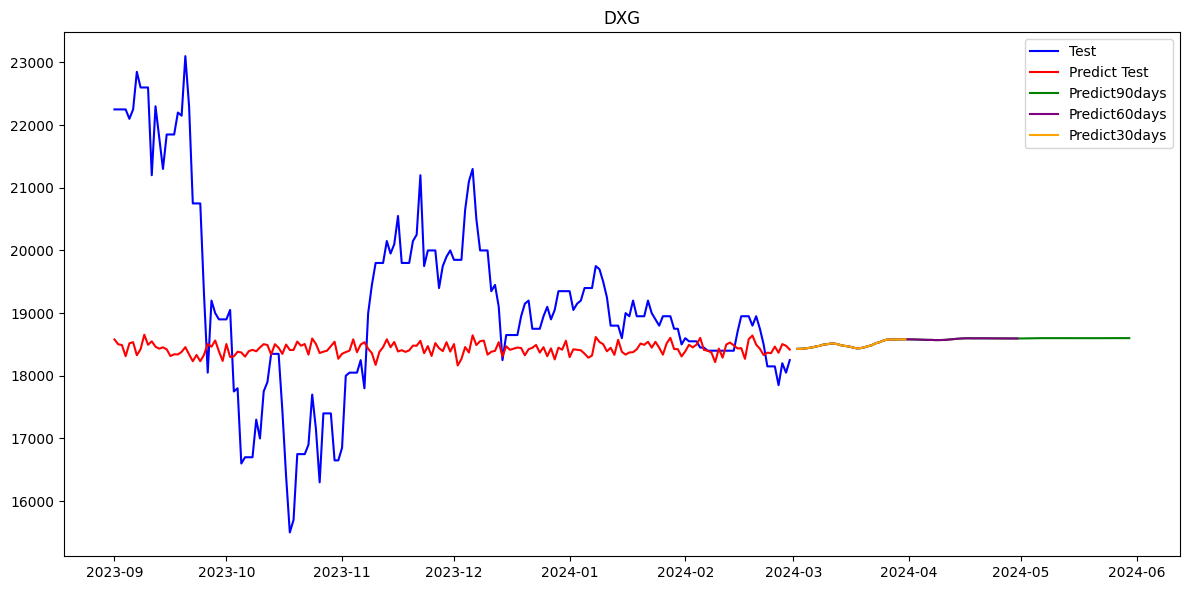

In [85]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=dxg_sorted.index[dxg_train_size], end=dxg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,dxg_test_data['y'],color='blue')

pred_test = pd.date_range(start=dxg_sorted.index[dxg_train_size], end=dxg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,dxg_pred_test['TimesNet'],color='red')

start_date = dxg_sorted.index[-1] + datetime.timedelta(1)
dxg_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
dxg_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
dxg_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(dxg_predict_data_90,dxg_predict_lst_output[:90],color='green')
plt.plot(dxg_predict_data_60,dxg_predict_lst_output[:60], color='purple')
plt.plot(dxg_predict_data_30,dxg_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('DXG')
plt.tight_layout()
plt.show()

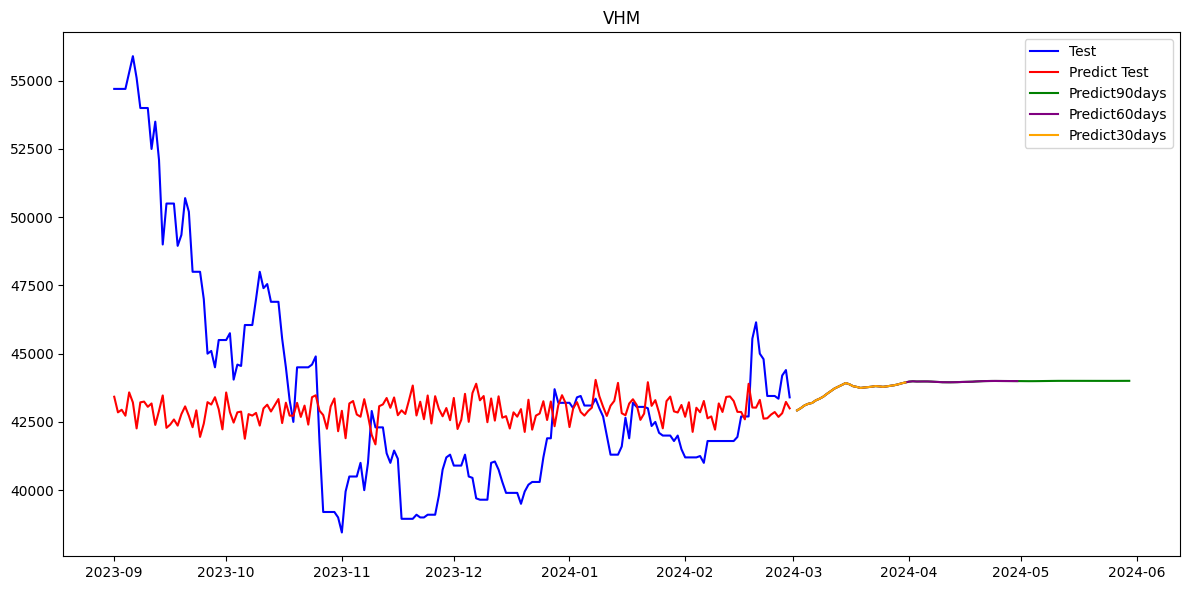

In [86]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=vhm_sorted.index[vhm_train_size], end=vhm_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,vhm_test_data['y'],color='blue')

pred_test = pd.date_range(start=vhm_sorted.index[vhm_train_size], end=vhm_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,vhm_pred_test['TimesNet'],color='red')

start_date = vhm_sorted.index[-1] + datetime.timedelta(1)
vhm_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
vhm_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
vhm_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(vhm_predict_data_90,vhm_predict_lst_output[:90],color='green')
plt.plot(vhm_predict_data_60,vhm_predict_lst_output[:60], color='purple')
plt.plot(vhm_predict_data_30,vhm_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('VHM')
plt.tight_layout()
plt.show()

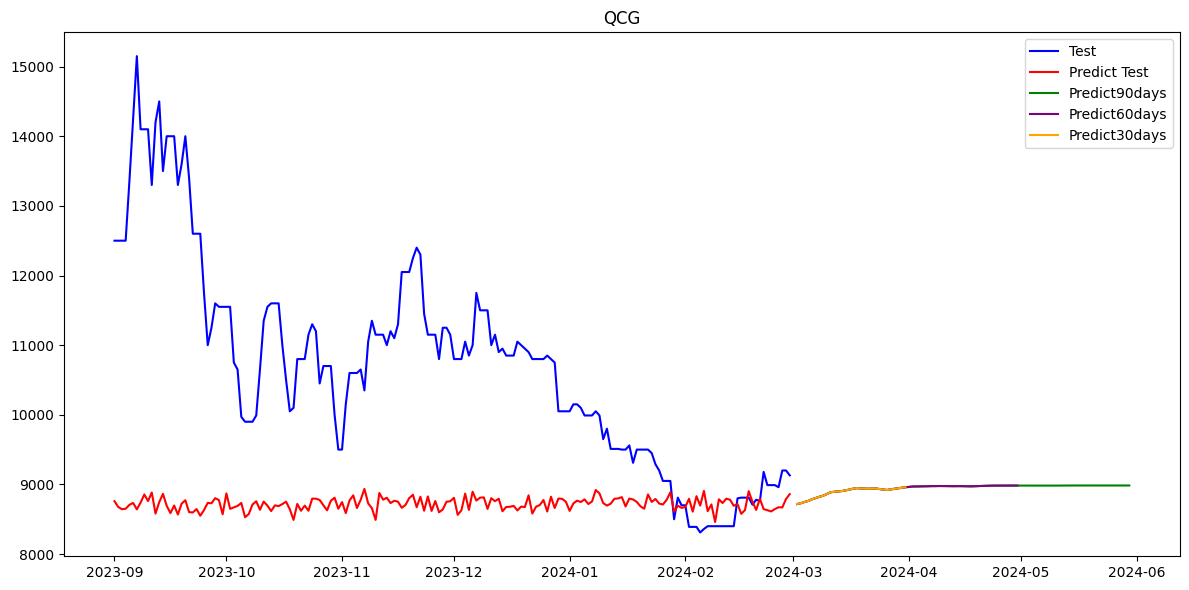

In [87]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=qcg_sorted.index[qcg_train_size], end=qcg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,qcg_test_data['y'],color='blue')

pred_test = pd.date_range(start=qcg_sorted.index[qcg_train_size], end=qcg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,qcg_pred_test['TimesNet'],color='red')

start_date = qcg_sorted.index[-1] + datetime.timedelta(1)
qcg_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
qcg_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
qcg_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(qcg_predict_data_90,qcg_predict_lst_output[:90],color='green')
plt.plot(qcg_predict_data_60,qcg_predict_lst_output[:60], color='purple')
plt.plot(qcg_predict_data_30,qcg_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('QCG')
plt.tight_layout()
plt.show()